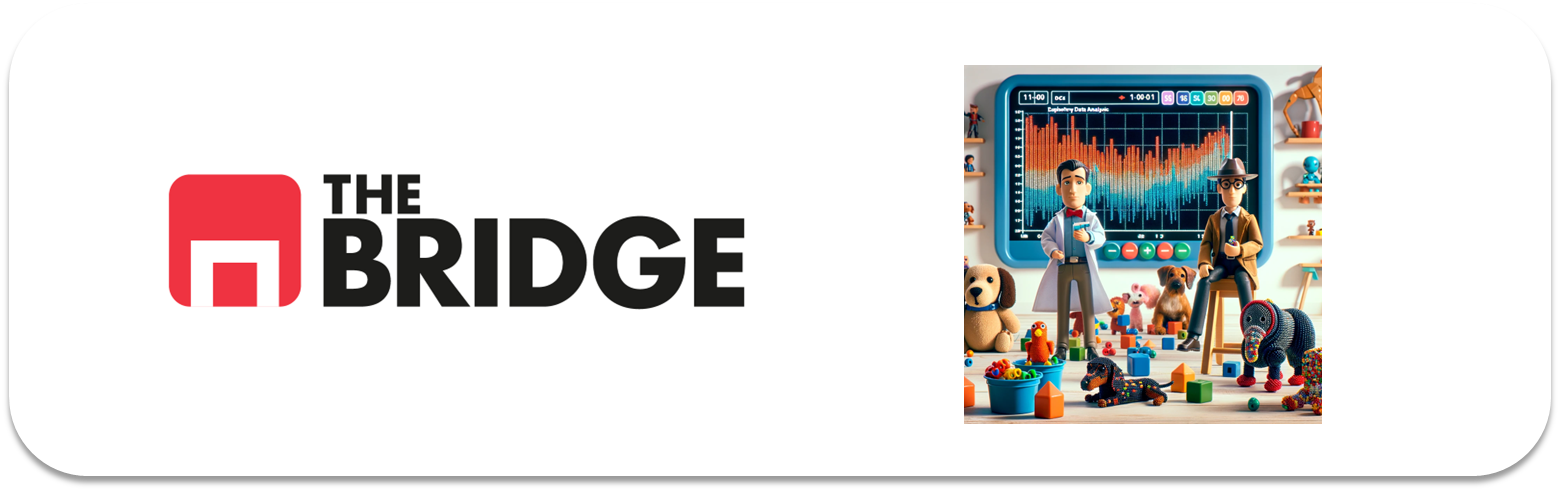

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools_copy import pinta_distribucion_categoricas, plot_categorical_relationship_fin, graficos_dispersión_combinados 
from bootcampviztools_copy import grafico_dispersion_con_correlacion, plot_grouped_histograms,plot_grouped_boxplots,plot_combined_graphs
from bootcampviztools_copy import plot_categorical_numerical_relationship, plot_categorical_relationship_fin

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df_titanic = pd.read_csv(r"./data/titanic.csv")
df_titanic.head(1)

survived  pclass   sex   age  sibsp  parch  fare embarked  class  who  \
0         0       3  male  22.0      1      0  7.25        S  Third  man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df_titanic.drop(columns=["deck","survived", "pclass", "embarked" ], axis=1, inplace=True)


In [5]:
df_titanic.head(1)

sex   age  sibsp  parch  fare  class  who  adult_male  embark_town alive  \
0  male  22.0      1      0  7.25  Third  man        True  Southampton    no   

   alone  
0  False

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [6]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.drop(columns=["parch","sibsp" ], axis=1, inplace=True)



In [7]:
df_titanic.head(10)

sex   age     fare   class    who  adult_male  embark_town alive  alone  \
0    male  22.0   7.2500   Third    man        True  Southampton    no  False   
1  female  38.0  71.2833   First  woman       False    Cherbourg   yes  False   
2  female  26.0   7.9250   Third  woman       False  Southampton   yes   True   
3  female  35.0  53.1000   First  woman       False  Southampton   yes  False   
4    male  35.0   8.0500   Third    man        True  Southampton    no   True   
5    male   NaN   8.4583   Third    man        True   Queenstown    no   True   
6    male  54.0  51.8625   First    man        True  Southampton    no   True   
7    male   2.0  21.0750   Third  child       False  Southampton    no  False   
8  female  27.0  11.1333   Third  woman       False  Southampton   yes  False   
9  female  14.0  30.0708  Second  child       False    Cherbourg   yes  False   

   family_members  
0               1  
1               1  
2               0  
3               1  
4               0  
5               0  
6               0  
7               4  
8               2  
9               1

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [8]:
df_titanic.embark_town.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: embark_town
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [9]:
moda_embark = df_titanic.embark_town.mode()
moda_embark

0    Southampton
Name: embark_town, dtype: object

In [10]:
df_titanic["embark_town"].fillna(moda_embark, inplace=True)

In [11]:
df_titanic.embark_town.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: embark_town
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [12]:
df_titanic.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [13]:
media_age=df_titanic["age"].mean()

In [14]:
df_titanic["age"].fillna(media_age, inplace=True)

In [15]:
df_titanic.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [16]:
df_titanic

sex        age     fare   class    who  adult_male  embark_town alive  \
0      male  22.000000   7.2500   Third    man        True  Southampton    no   
1    female  38.000000  71.2833   First  woman       False    Cherbourg   yes   
2    female  26.000000   7.9250   Third  woman       False  Southampton   yes   
3    female  35.000000  53.1000   First  woman       False  Southampton   yes   
4      male  35.000000   8.0500   Third    man        True  Southampton    no   
..      ...        ...      ...     ...    ...         ...          ...   ...   
886    male  27.000000  13.0000  Second    man        True  Southampton    no   
887  female  19.000000  30.0000   First  woman       False  Southampton   yes   
888  female  29.699118  23.4500   Third  woman       False  Southampton    no   
889    male  26.000000  30.0000   First    man        True    Cherbourg   yes   
890    male  32.000000   7.7500   Third    man        True   Queenstown    no   

     alone  family_members  
0    False               1  
1    False               1  
2     True               0  
3    False               1  
4     True               0  
..     ...             ...  
886   True               0  
887   True               0  
888  False               3  
889   True               0  
890   True               0  

[891 rows x 10 columns]

In [17]:


cardinalidad= pd.DataFrame([df_titanic.nunique(), (df_titanic.nunique()/len(df_titanic)*100), df_titanic.dtypes]).T.rename(columns = {0: "Card",1: "%_Card", 2: "Tipo"})
cardinalidad



Card     %_Card     Tipo
sex               2   0.224467   object
age              89   9.988777  float64
fare            248  27.833895  float64
class             3     0.3367   object
who               3     0.3367   object
adult_male        2   0.224467     bool
embark_town       3     0.3367   object
alive             2   0.224467   object
alone             2   0.224467     bool
family_members    9   1.010101    int64

In [18]:
df_titanic.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

In [19]:
columnas_1_6= [ "who", "sex", "alive"]

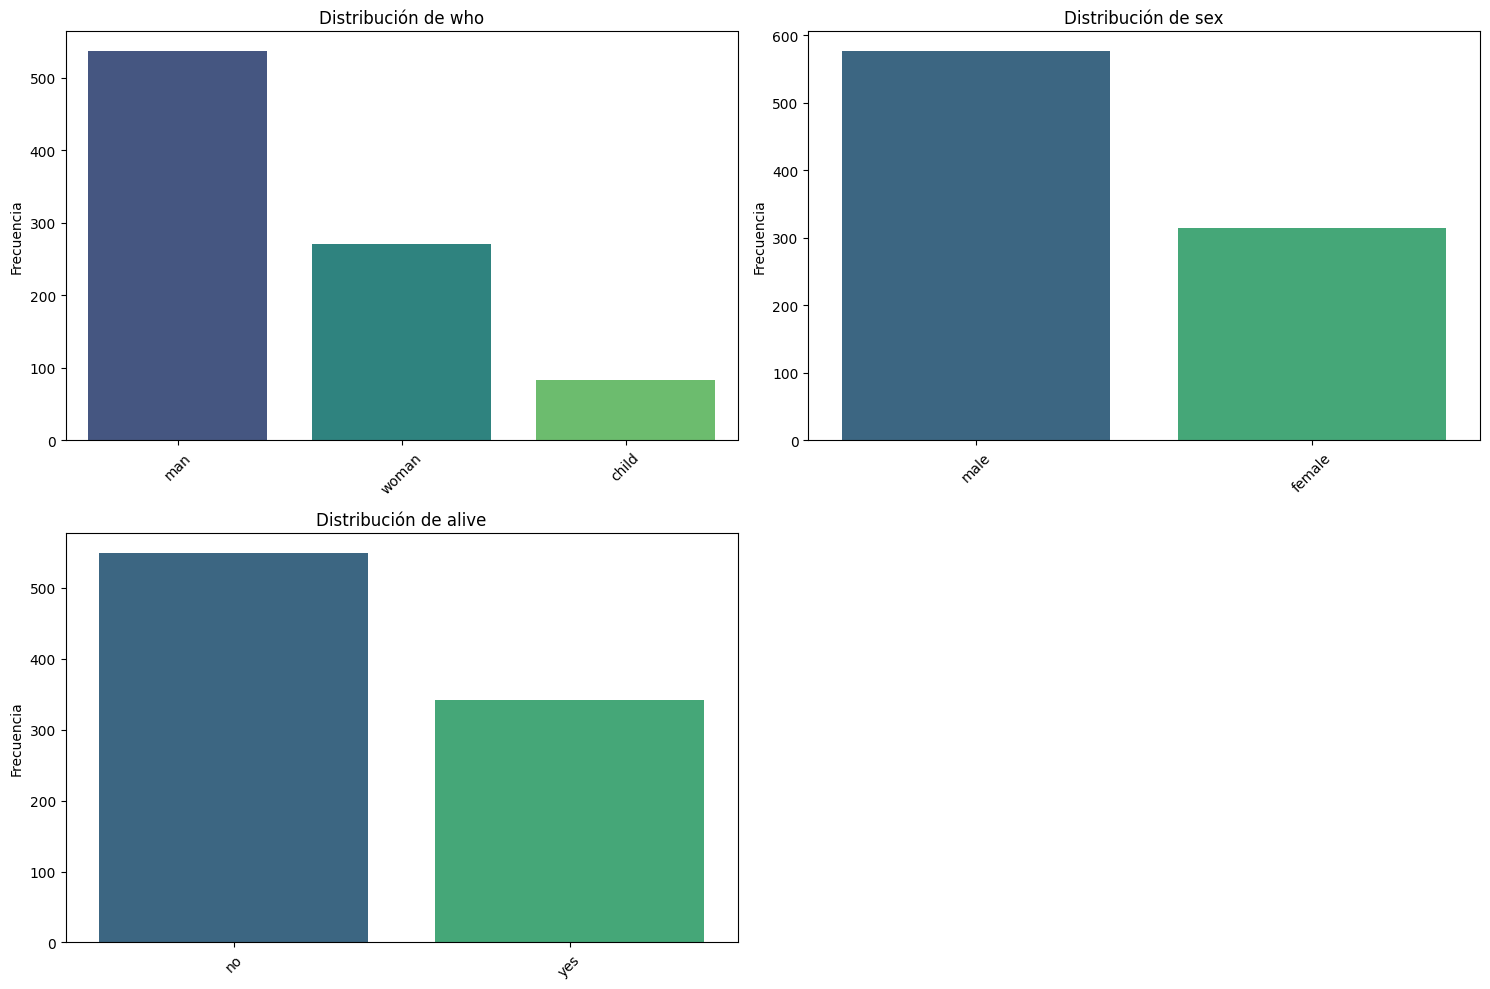

In [20]:
pinta_distribucion_categoricas(df_titanic, columnas_1_6)

In [21]:

#hallamos la frecuencia absoluta
for catego in columnas_1_6:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n"*2)

para who
who
man      537
woman    271
child     83
Name: count, dtype: int64



para sex
sex
male      577
female    314
Name: count, dtype: int64



para alive
alive
no     549
yes    342
Name: count, dtype: int64





In [22]:
#hallamos la frecuencia relativa
for catego in columnas_1_6:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n"*2)

para who
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64



para sex
sex
male      64.758698
female    35.241302
Name: count, dtype: float64



para alive
alive
no     61.616162
yes    38.383838
Name: count, dtype: float64





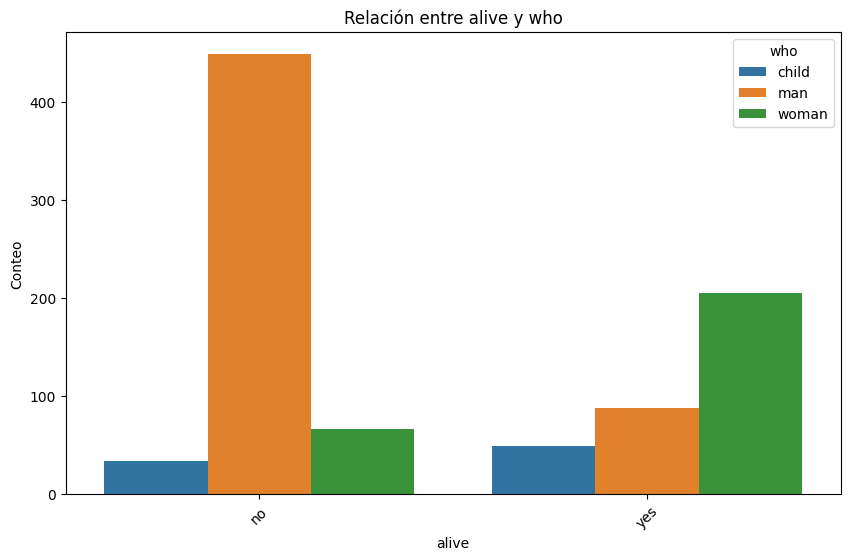

In [23]:

plot_categorical_relationship_fin(df_titanic,"alive","who",relative_freq=False, show_values=False, size_group = 5)

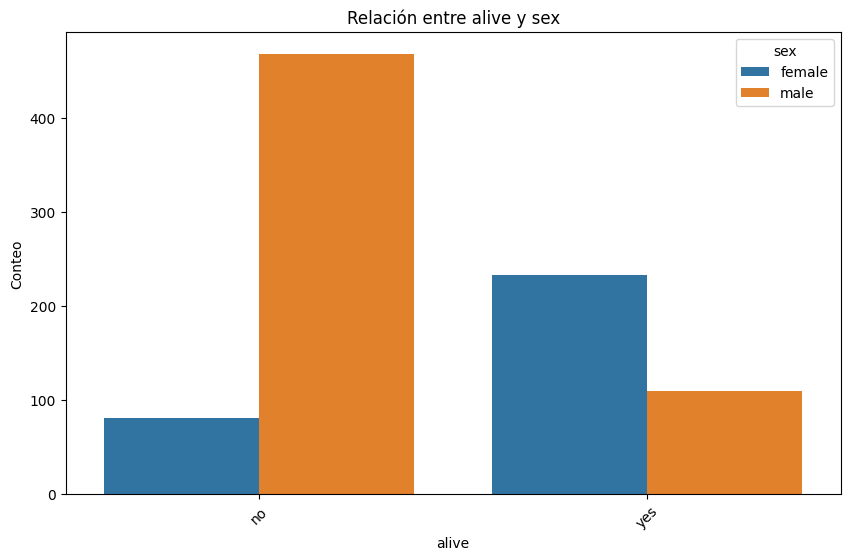

In [24]:
plot_categorical_relationship_fin(df_titanic,"alive","sex",relative_freq=False, show_values=False, size_group = 5)

En terminos absolutos como relativo, viendo las graficas de relaciones de alive con who y sex, y las frecuecias absolutas y relativas, se puede afirmar que hubo mas hombres que mujeres y niños fallecidos, ya que hay un mayor porcentaje de hombres que de mujeres y niños, y se lo comparamos en las columa "sexo", donde mujeres y niños se unen a sus respectivos generos, sigue existiendo una diferencia significativa el genero masculino y femeninos,  indicando un mayor numero de hombres que mujeres y niños fallecidos.

1A. Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

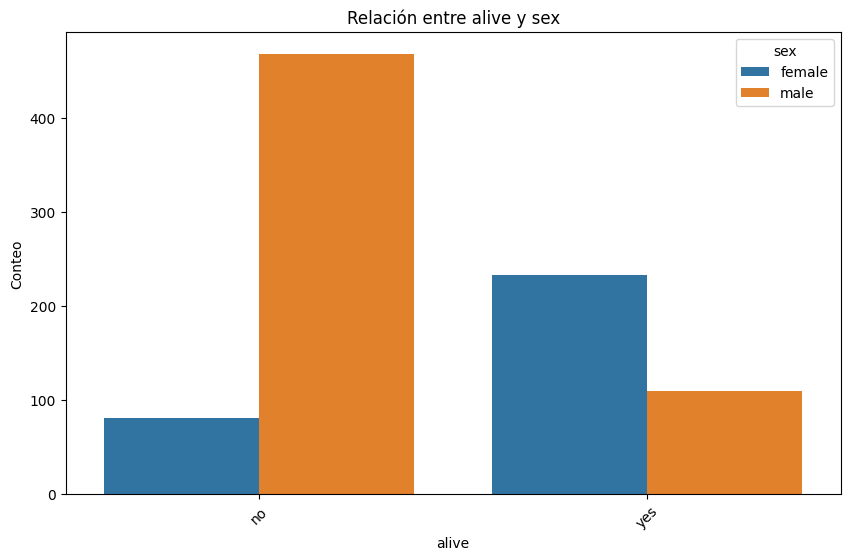

In [25]:
plot_categorical_relationship_fin(df_titanic,"alive","sex",relative_freq=False, show_values=False, size_group = 5)

Teniendo en cuenta los datos aportados y la grafica arriba expuesta, fallecieron un total de 549 personas y sobrevieron 349. En el barco iban un total de 891 personas, divididos en 537 hombres, 271 mujeres y 83 niños, concretamente 40 niños (577-537) y 43 niñas.<br>
Si tenemos en cuenta estos datos, si existe cierta importancia estadistica significativa ,tanto entre el sexo y el indice de supervivencia o entre ser adulto o niño, habida cuenta que fallecieron 549 personas y el total de hombres fue 537, sin embargo sobreviveron 342 personas, cifra muy cercana a los 354 mujeres y niños que iban en el barco, maxime que en esos tiempos era normal salvar a mujeres y niños primero.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

In [26]:
df_titanic.head(1)

sex   age  fare  class  who  adult_male  embark_town alive  alone  \
0  male  22.0  7.25  Third  man        True  Southampton    no  False   

   family_members  
0               1

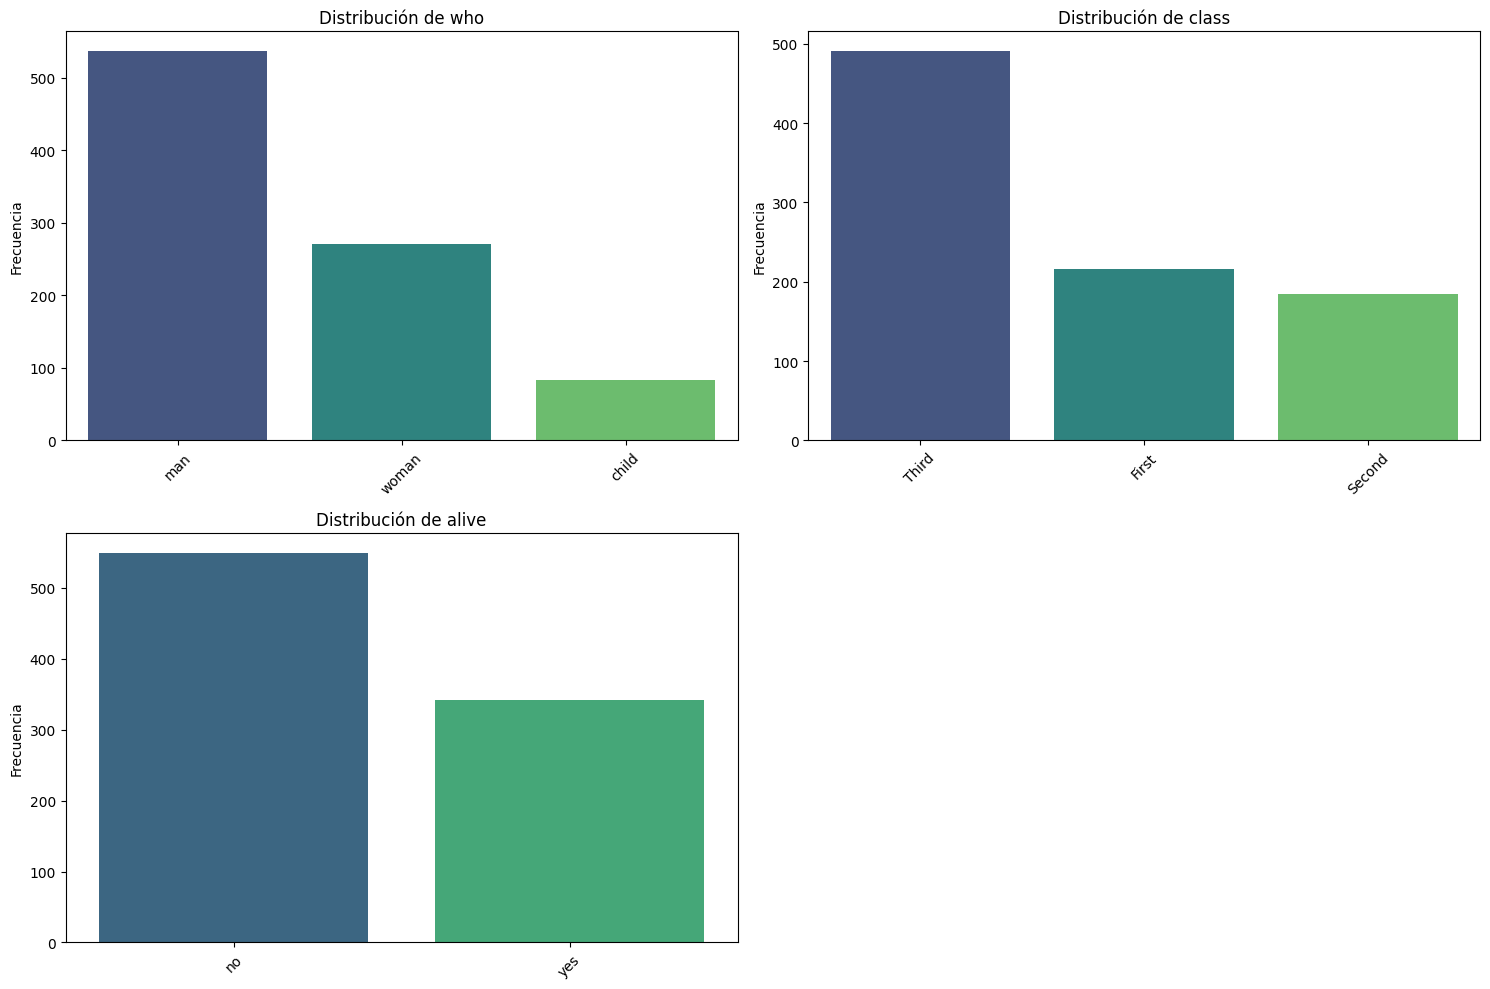

In [27]:
columnas_clase= [ "who", "class", "alive"]
pinta_distribucion_categoricas(df_titanic, columnas_clase)

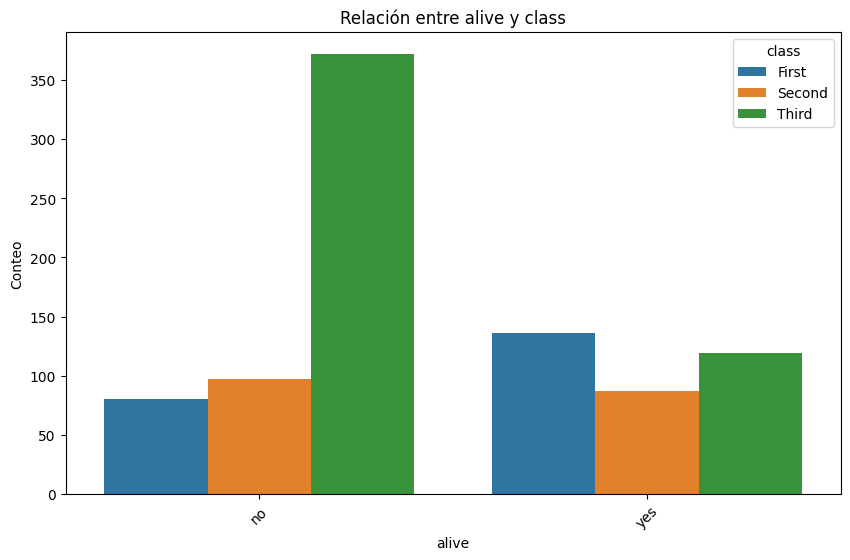

In [28]:
plot_categorical_relationship_fin(df_titanic,"alive","class",relative_freq=False, show_values=False, size_group = 5)

En terminos absolutos, hay un total de 491 personas que viajaban en 3 clase, lo que equivale a un 55,10 % del total de pasajeros, en 1 clase viajaban 214 y en 2 clase un total de 184, y viendo la grafica de arriba donde se compara alive con class queda demostrado con los datos que tenemos que  hubo un mayor numero de fallecidos de 3 clase, pudiendo estar esta situacion relacionada a dos factores: su mayor nùmero y el hecho que en todos los barcos las clases van en relacion a la cercania a la cubierta, por lo que se reduce significavamente la posibilidad de superviviencia.<br> En relacion a los supervientes,  el mayor numero de ellos fue  de primera y tercera clase, aqunue las diferencias entre las clases de los supervivientes no son muy significativas

In [29]:
#hallamos la frecuencia absoluta
for catego in columnas_clase:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n"*2)

para who
who
man      537
woman    271
child     83
Name: count, dtype: int64



para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



para alive
alive
no     549
yes    342
Name: count, dtype: int64





In [30]:
#hallamos la frecuencia  relativa
for catego in columnas_clase:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n"*2)

para who
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64



para class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64



para alive
alive
no     61.616162
yes    38.383838
Name: count, dtype: float64






3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

In [31]:
df_titanic.head(1)

sex   age  fare  class  who  adult_male  embark_town alive  alone  \
0  male  22.0  7.25  Third  man        True  Southampton    no  False   

   family_members  
0               1

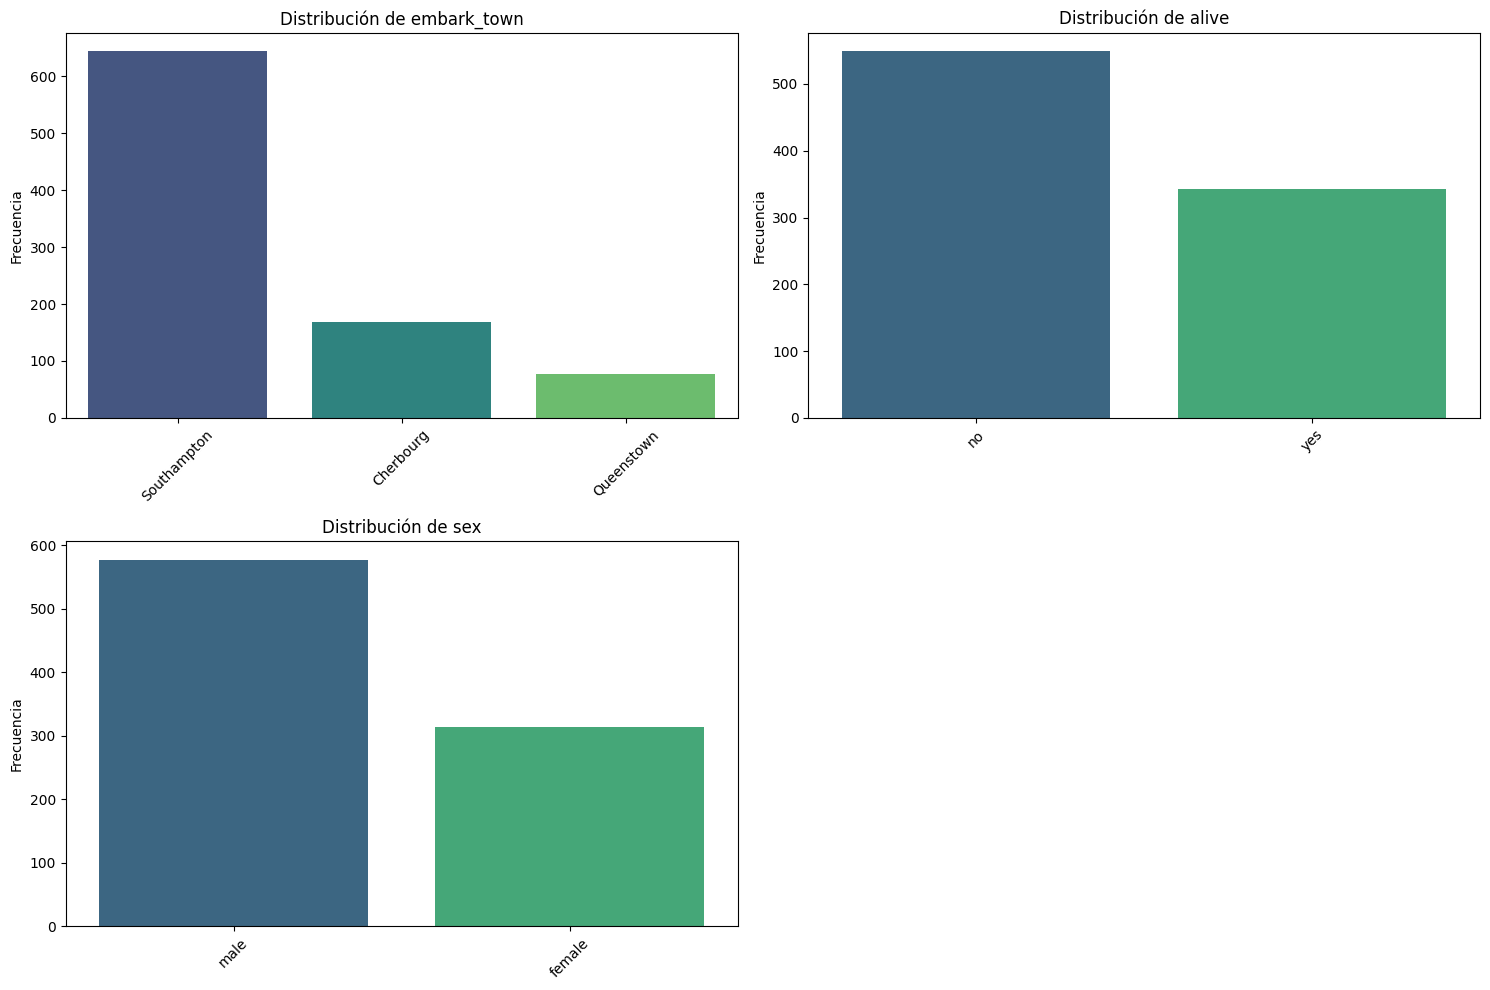

In [32]:
columnas_ciudad= ["embark_town","alive","sex"]
pinta_distribucion_categoricas(df_titanic, columnas_ciudad)

In [33]:
#hallamos la frecuencia  relativa
for catego in columnas_ciudad:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n"*2)

para embark_town
embark_town
Southampton    72.278339
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64



para alive
alive
no     61.616162
yes    38.383838
Name: count, dtype: float64



para sex
sex
male      64.758698
female    35.241302
Name: count, dtype: float64





In [34]:
#hallamos la frecuencia absoluta
for catego in columnas_ciudad:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n"*2)

para embark_town
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64



para alive
alive
no     549
yes    342
Name: count, dtype: int64



para sex
sex
male      577
female    314
Name: count, dtype: int64





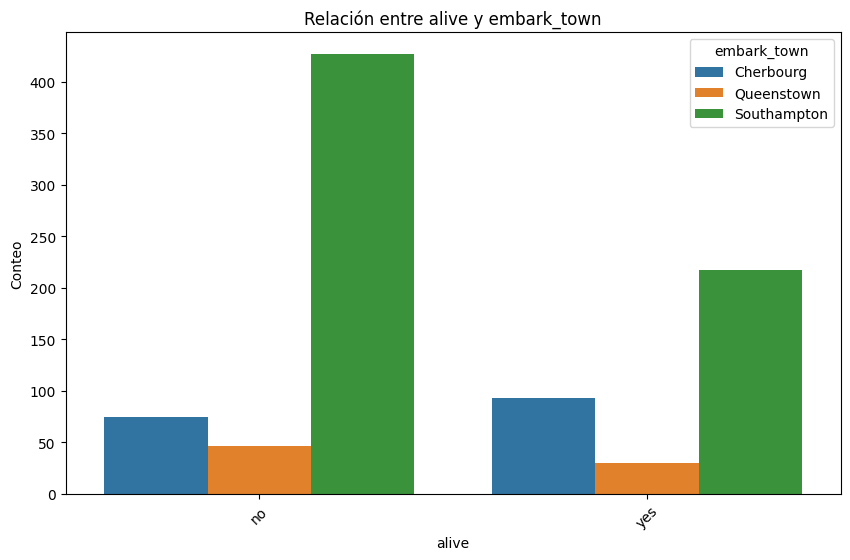

In [35]:
plot_categorical_relationship_fin(df_titanic,"alive","embark_town",relative_freq=False, show_values=False, size_group = 5)

La ciudad donde embarcaron el mayor numero de fallecidos coincide con la ciudad de partida del viaje del Titanic: Southampton, siendo tambien de esa ciudad donde hubo mayor numero de supervivientes,  exisiendo claramente una cierta relacion estadistica significativa, debido a que en ese puerto embarcaron el 72.27 % del total de pasajeros (644), por lo que las posibilidades de ocurrirle algun hecho era mucho mayor en estas pèrsonas que en al 27,49% restante.

In [36]:
df_titanic.head(1)

sex   age  fare  class  who  adult_male  embark_town alive  alone  \
0  male  22.0  7.25  Third  man        True  Southampton    no  False   

   family_members  
0               1

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

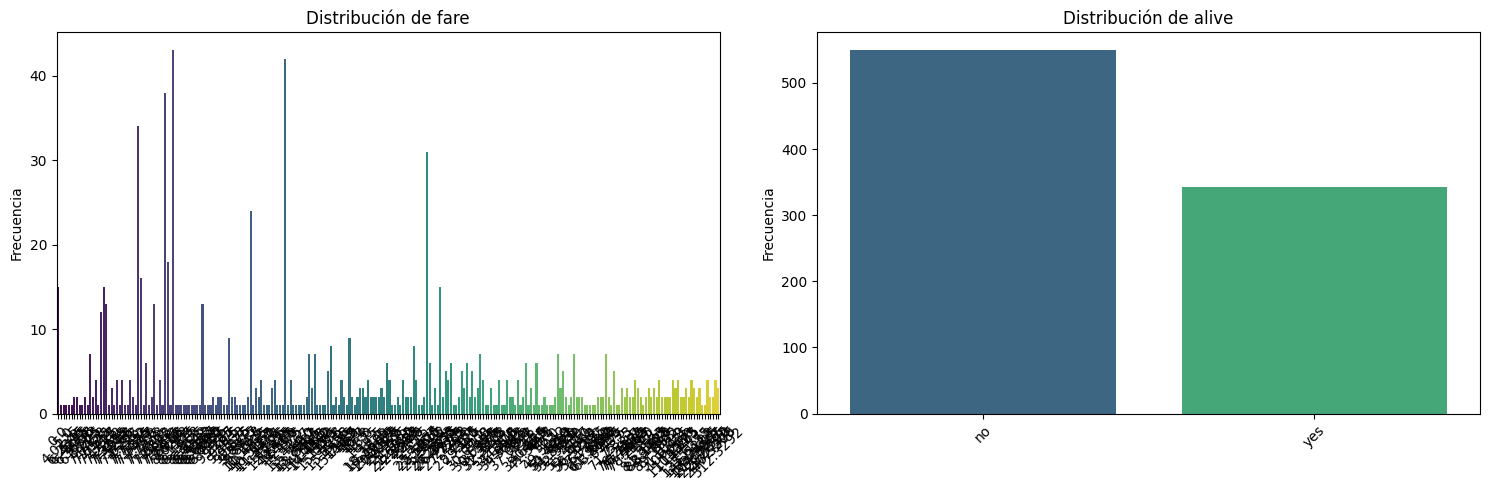

In [37]:
columnas_precio =["fare", "alive" ]
pinta_distribucion_categoricas(df_titanic, columnas_precio)

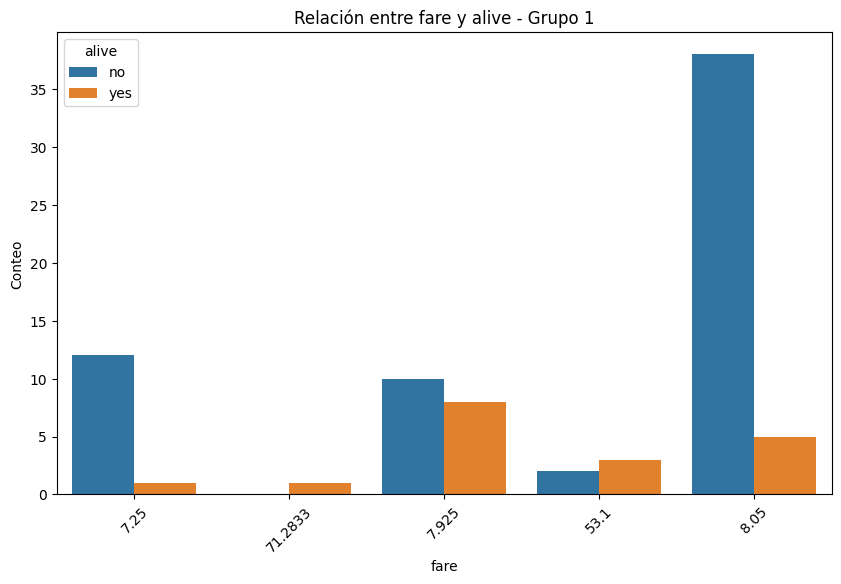

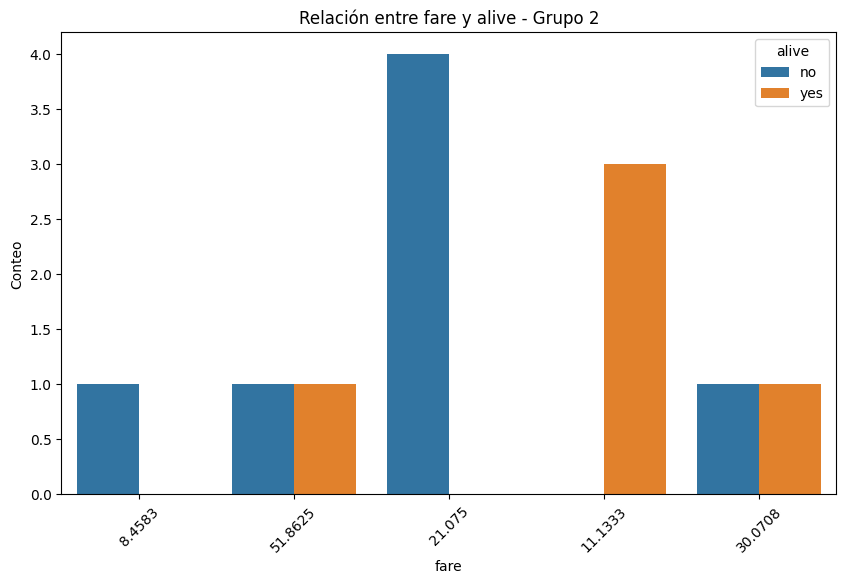

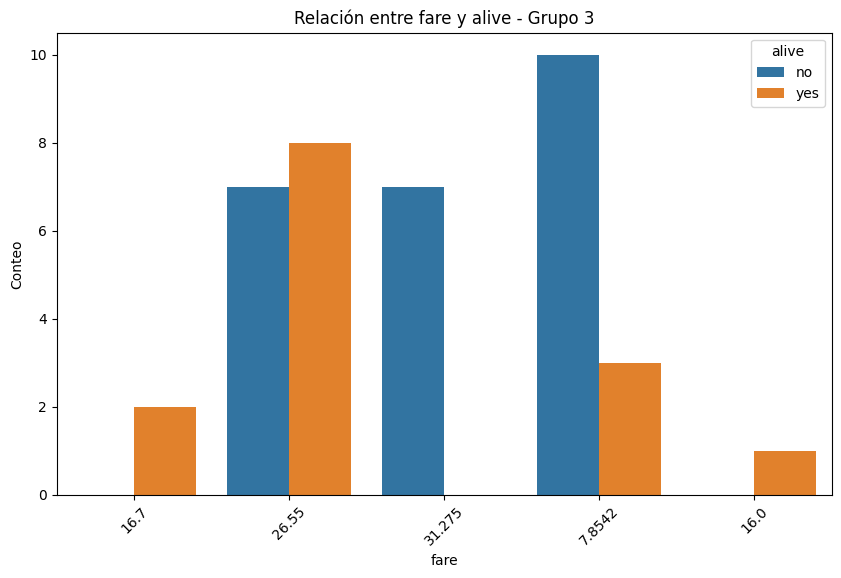

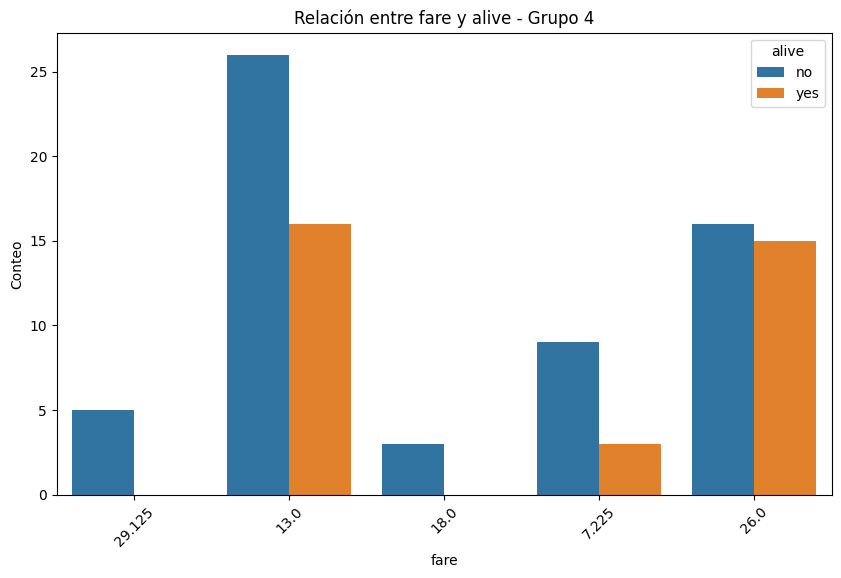

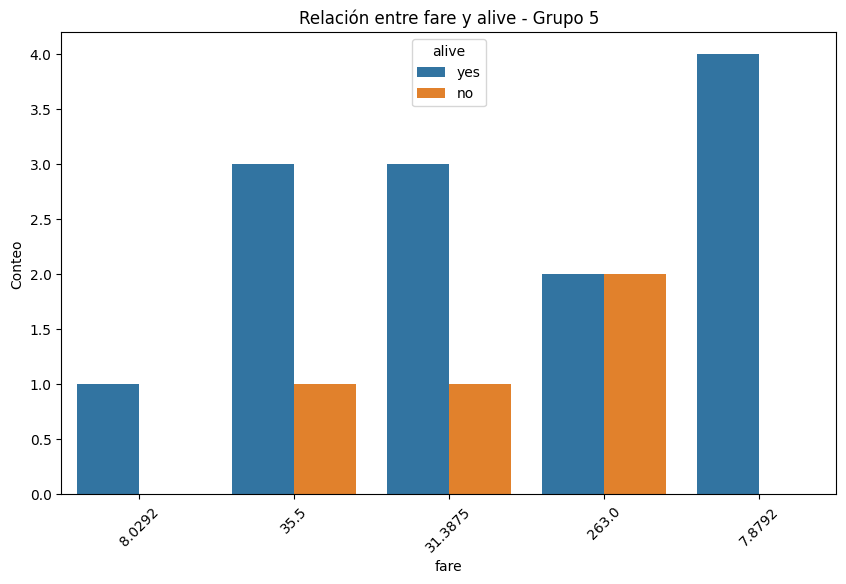

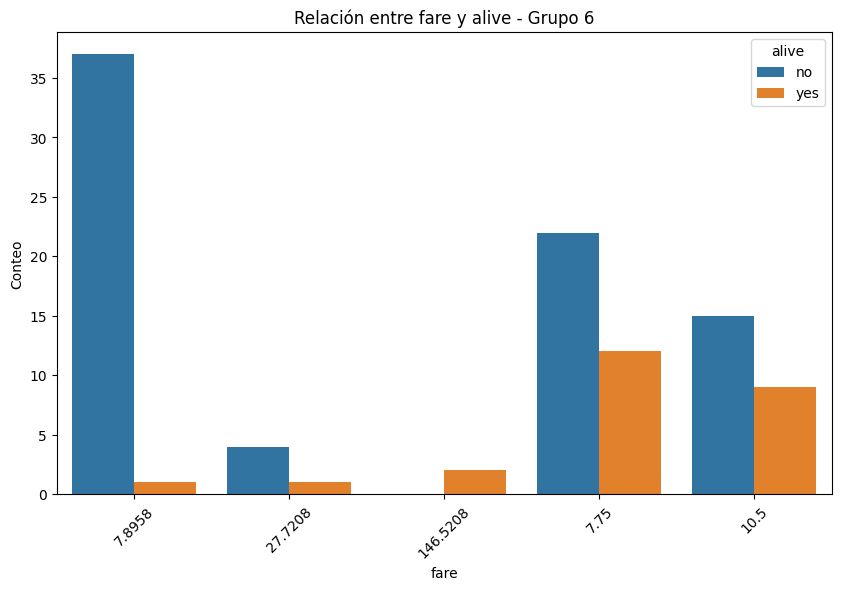

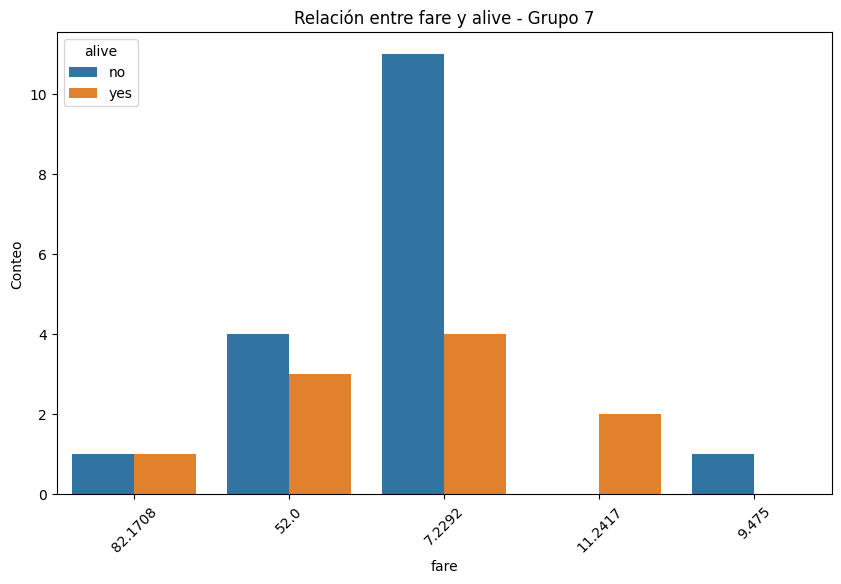

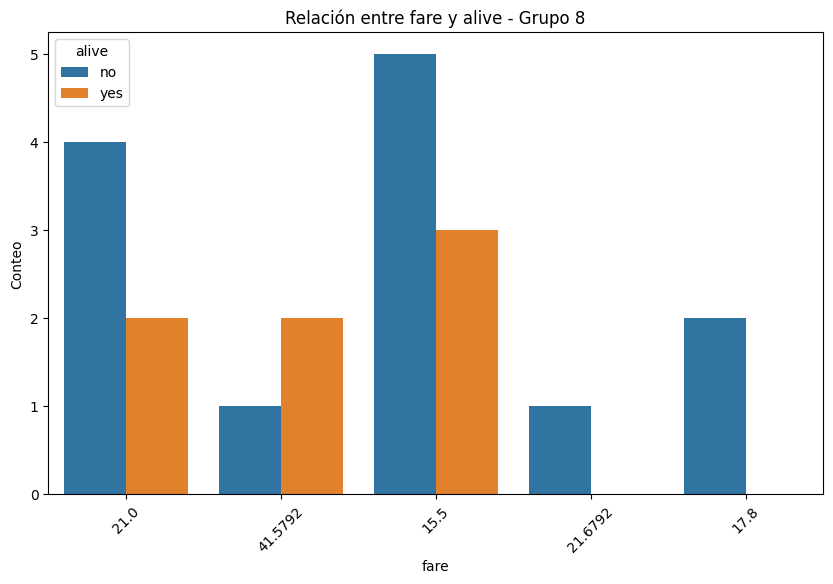

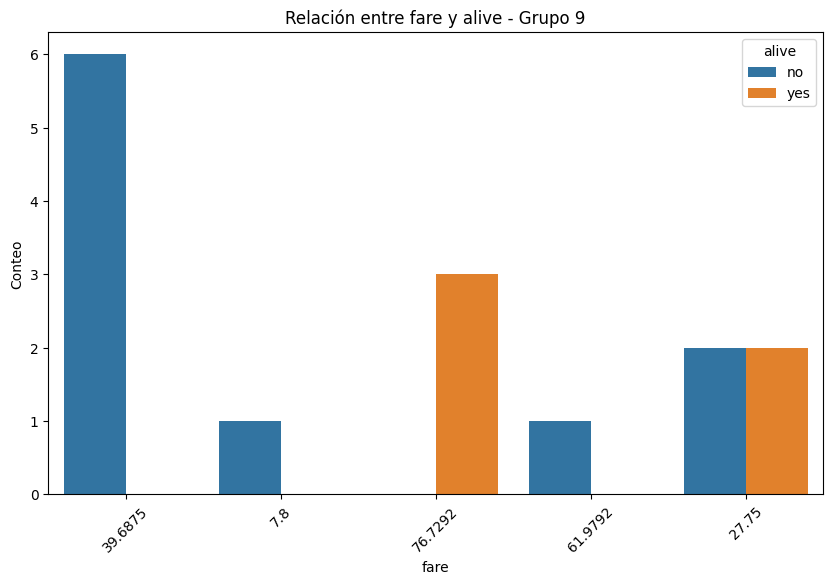

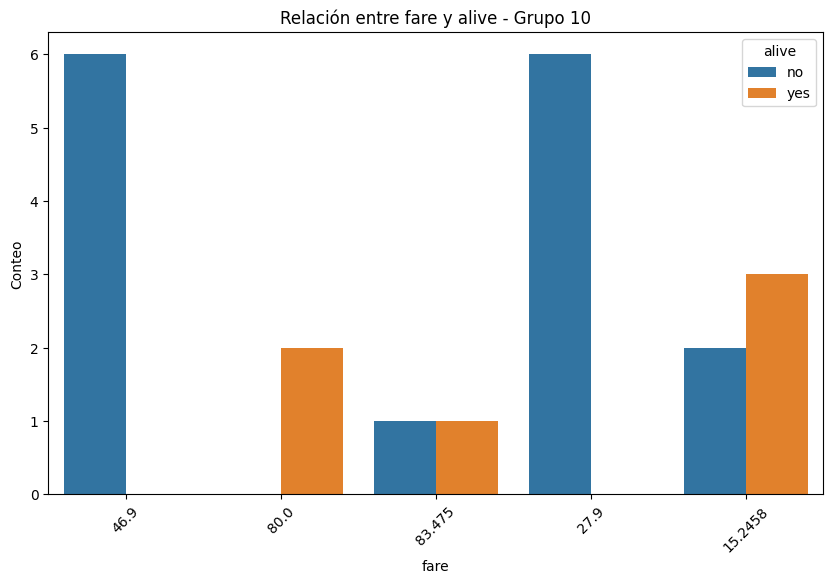

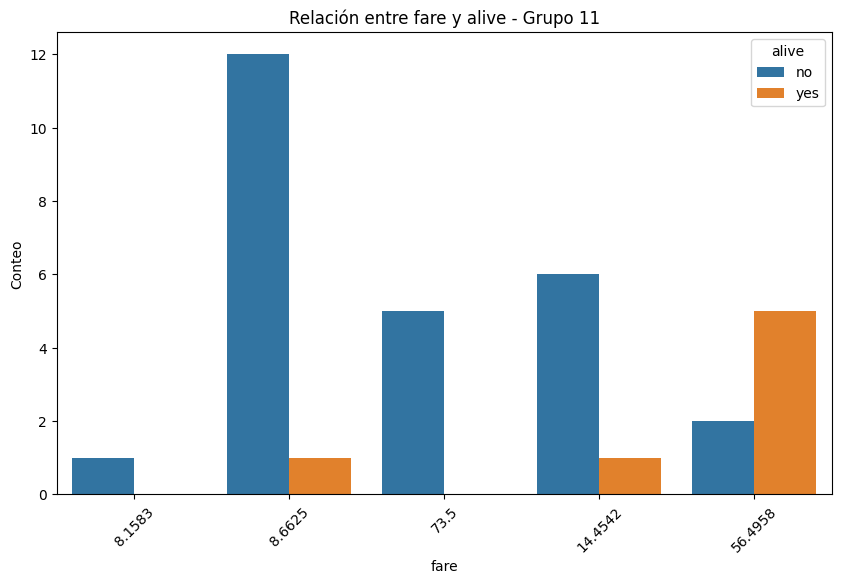

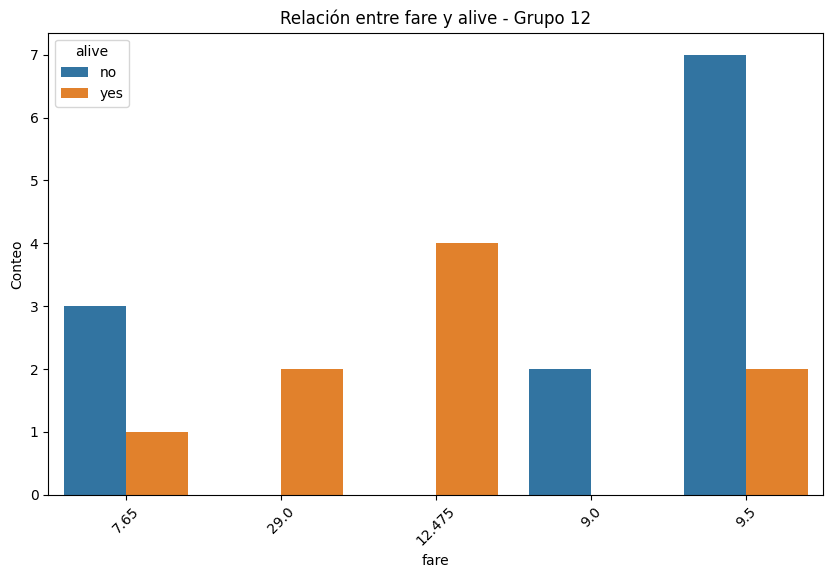

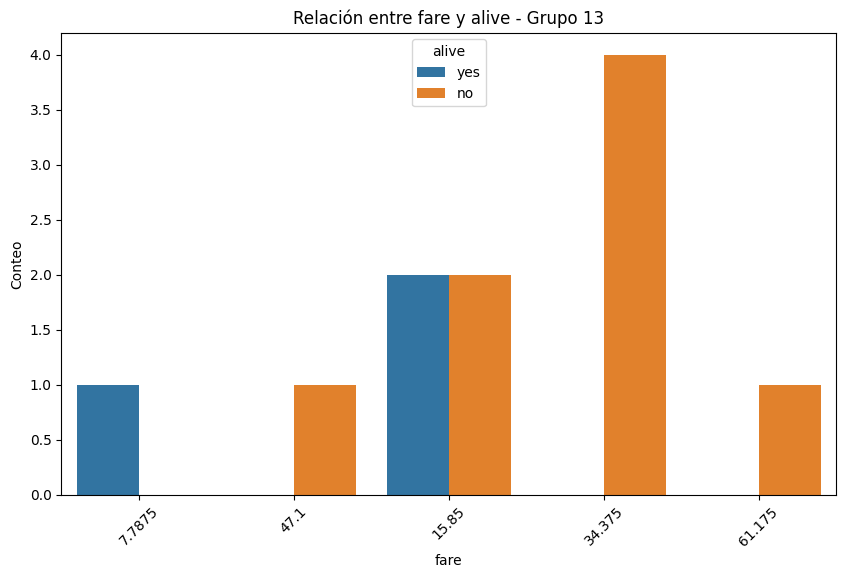

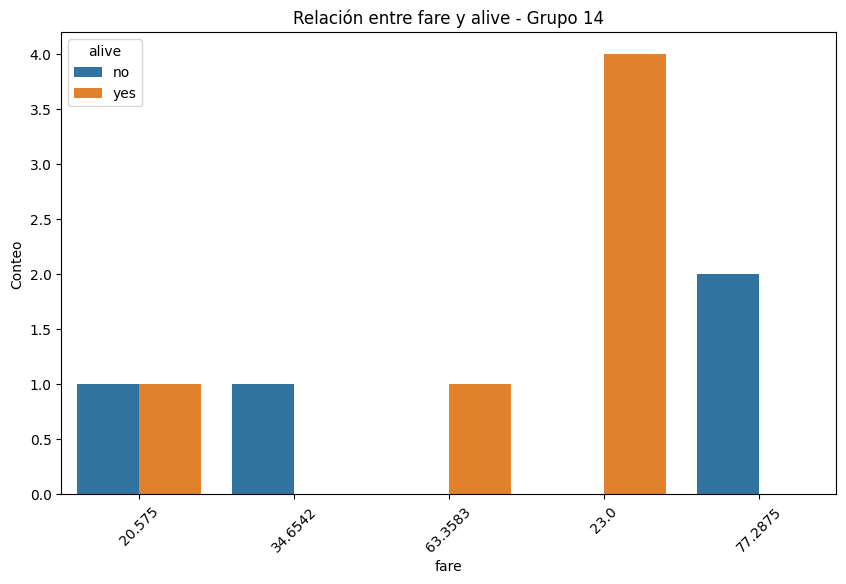

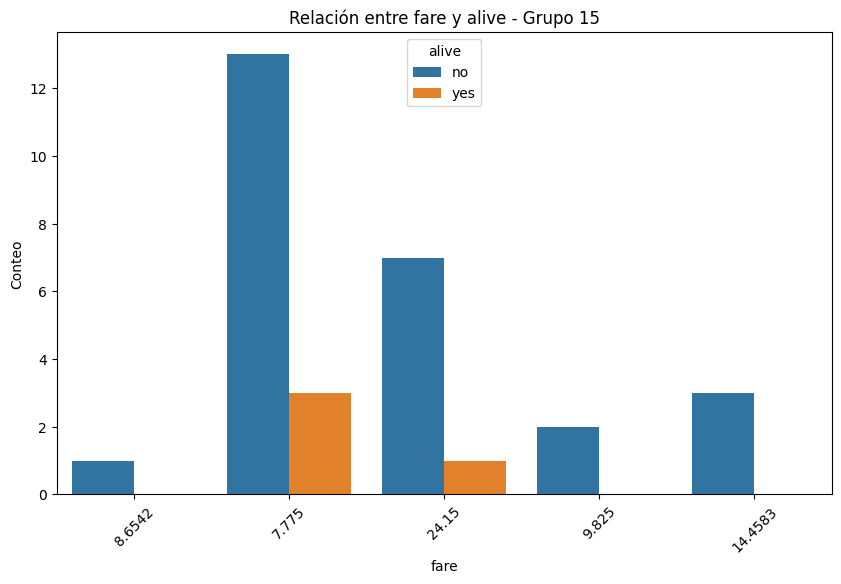

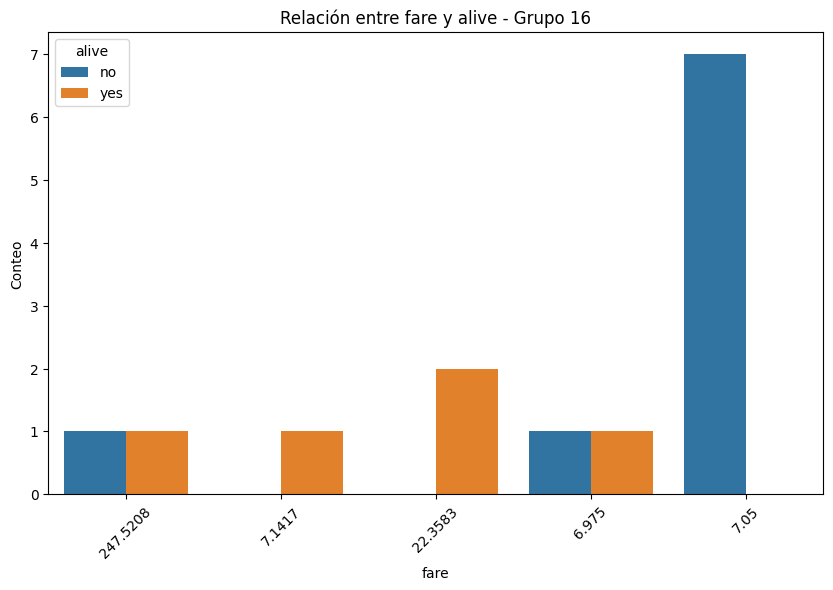

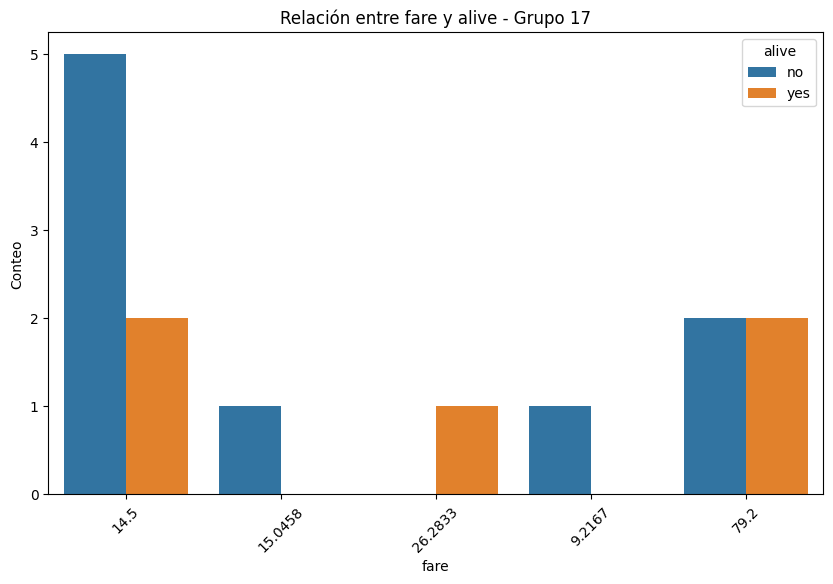

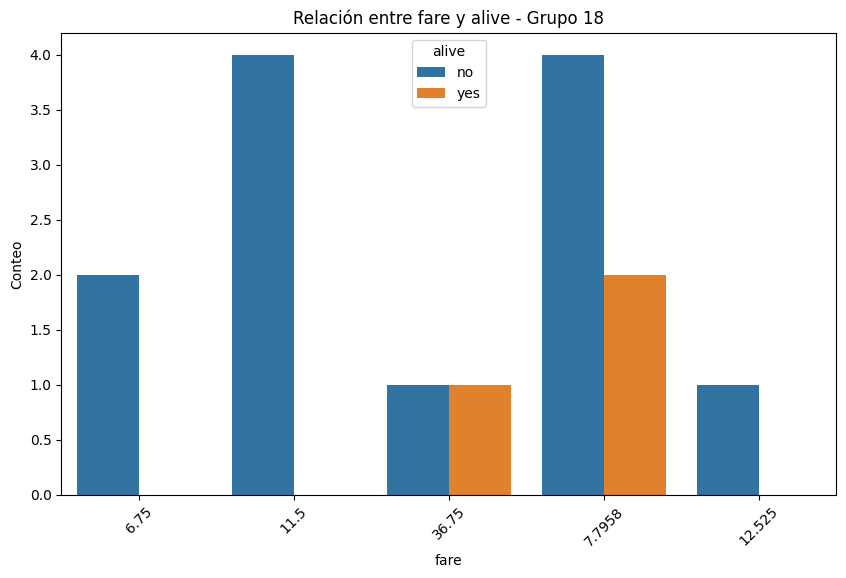

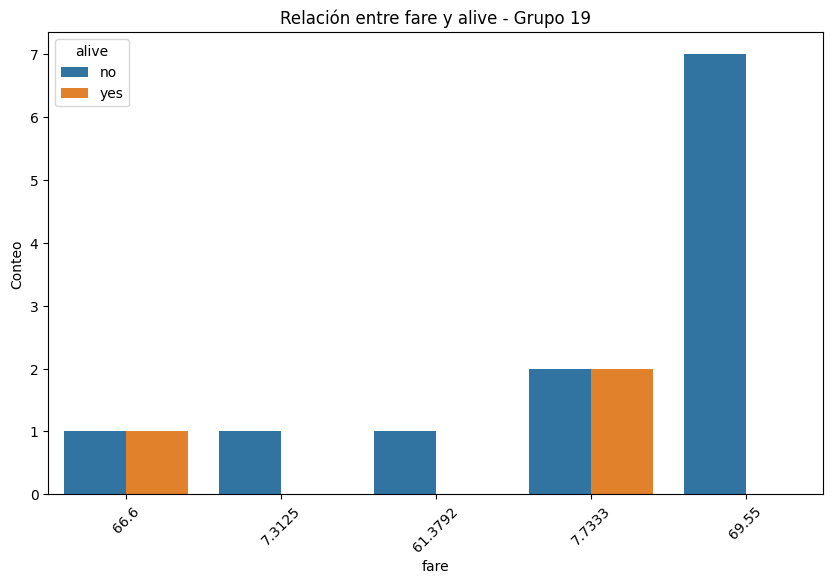

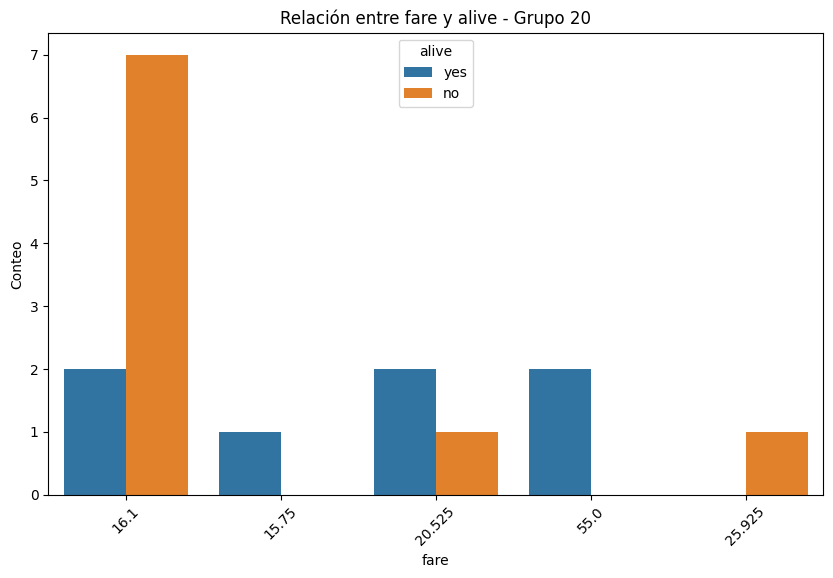

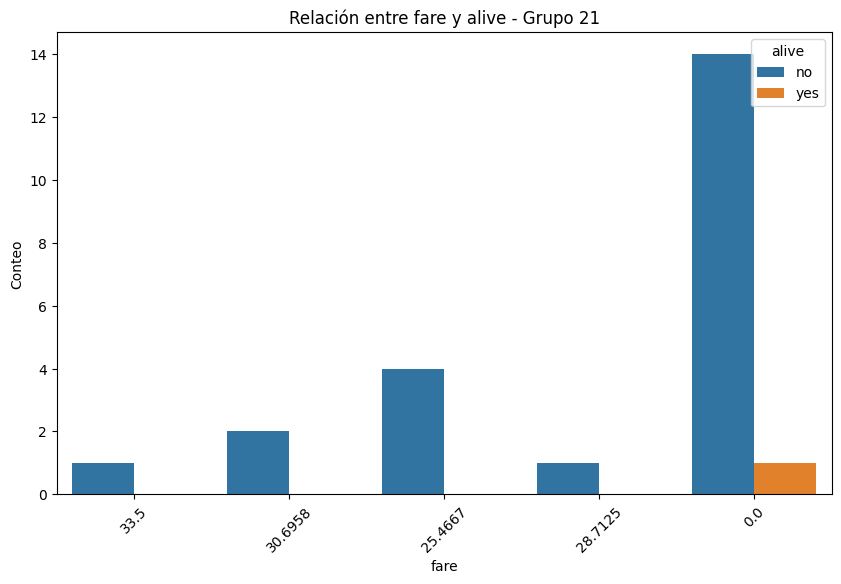

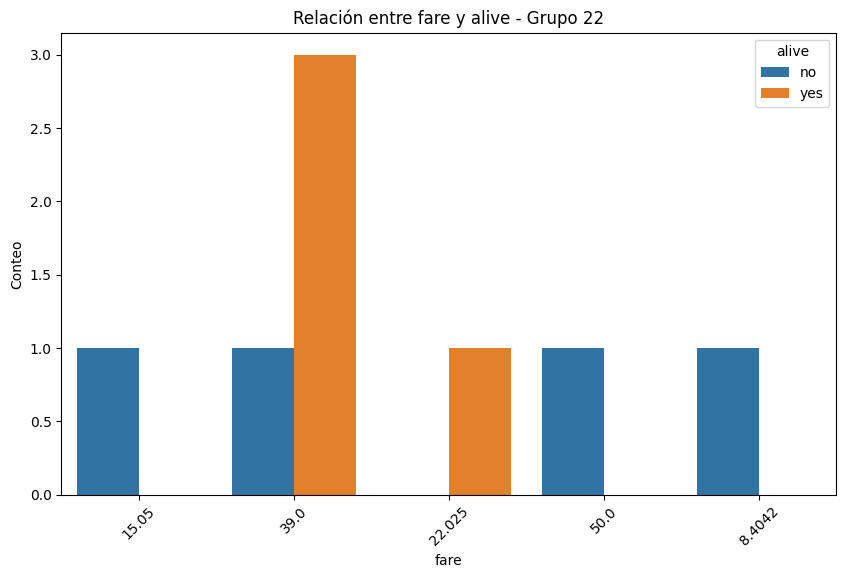

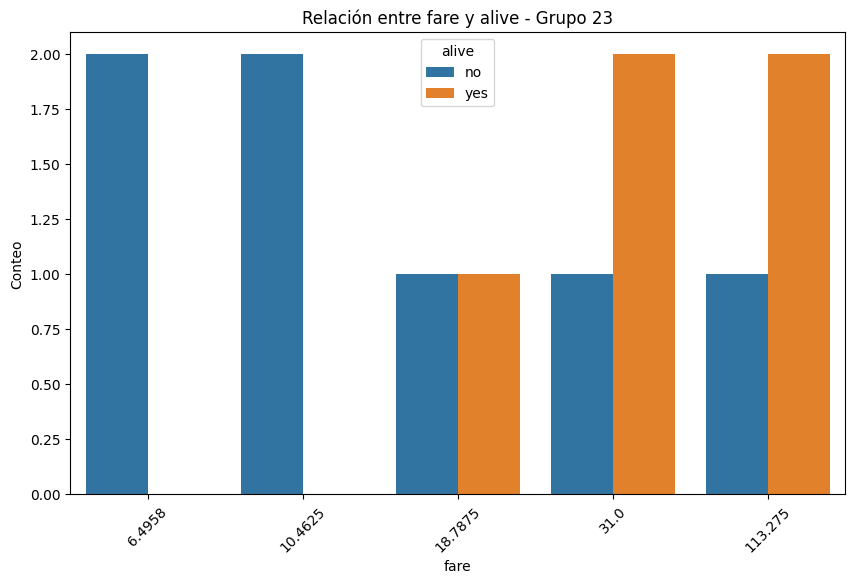

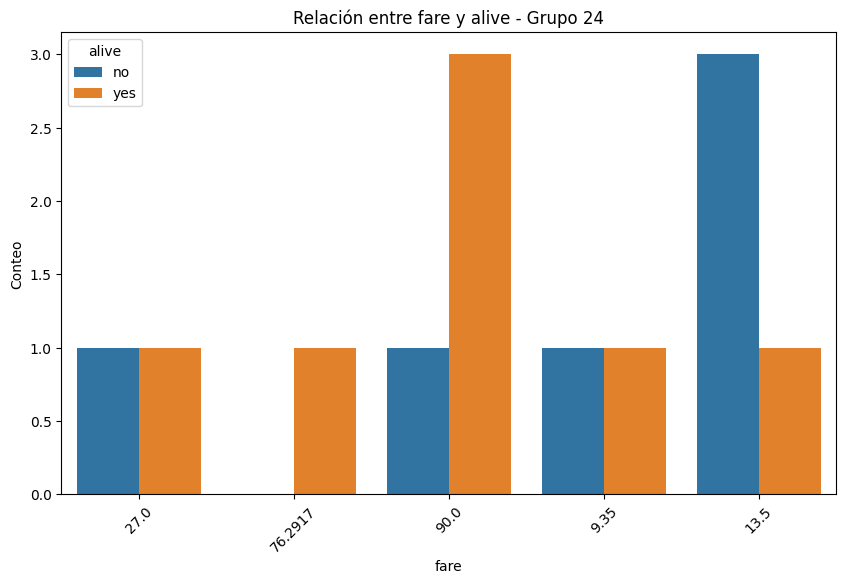

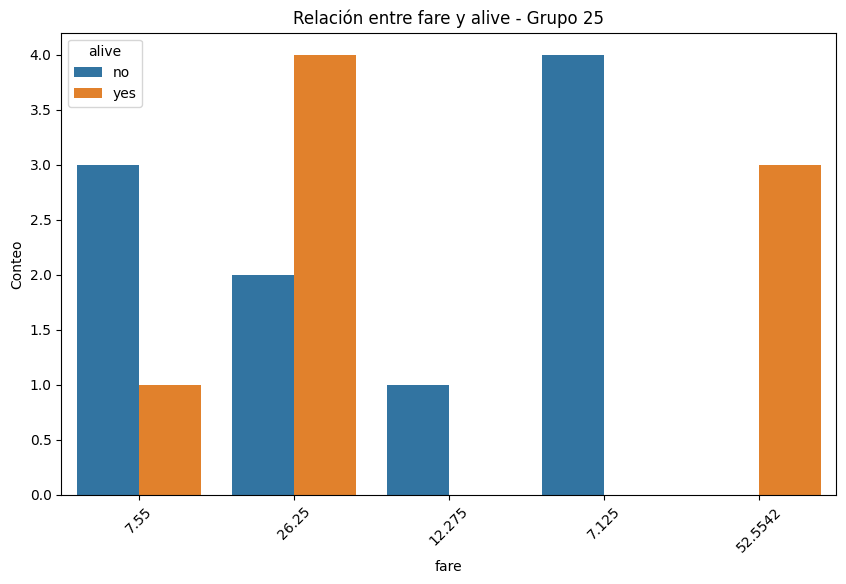

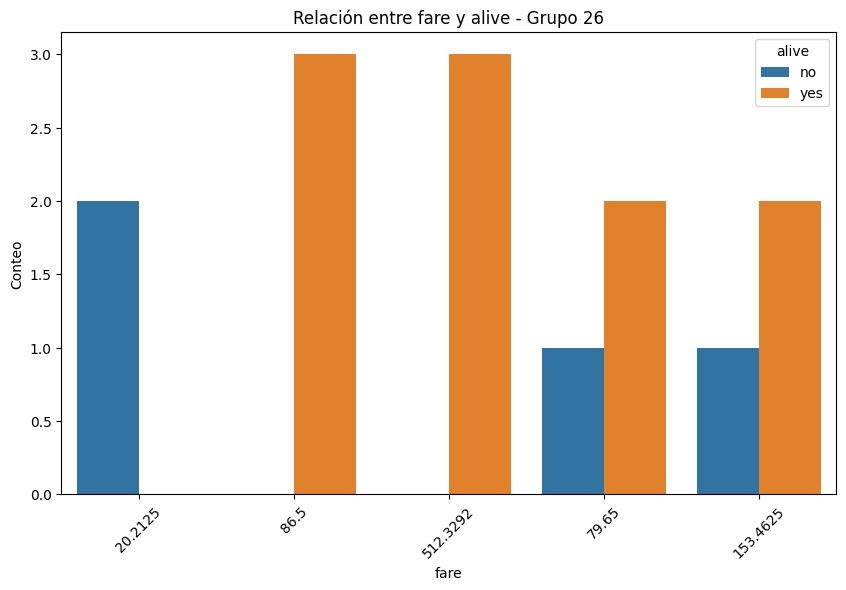

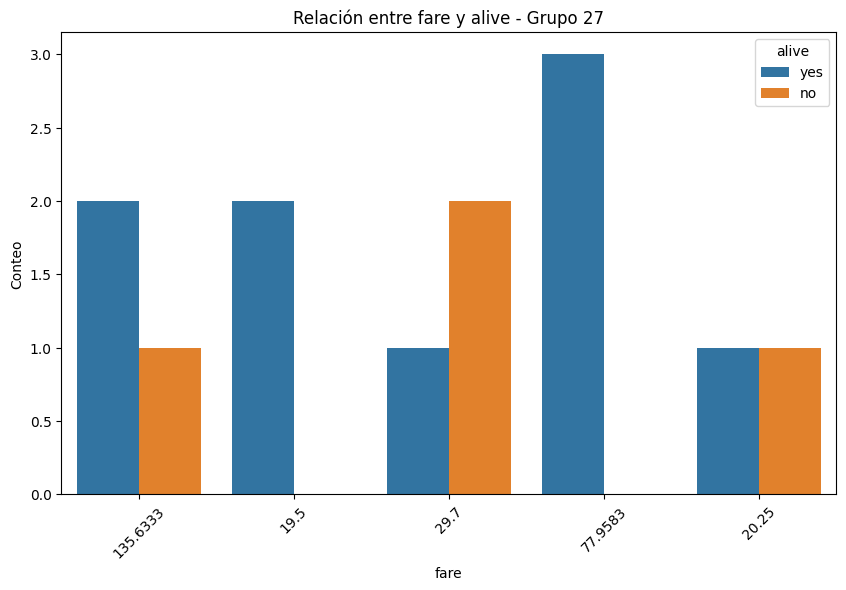

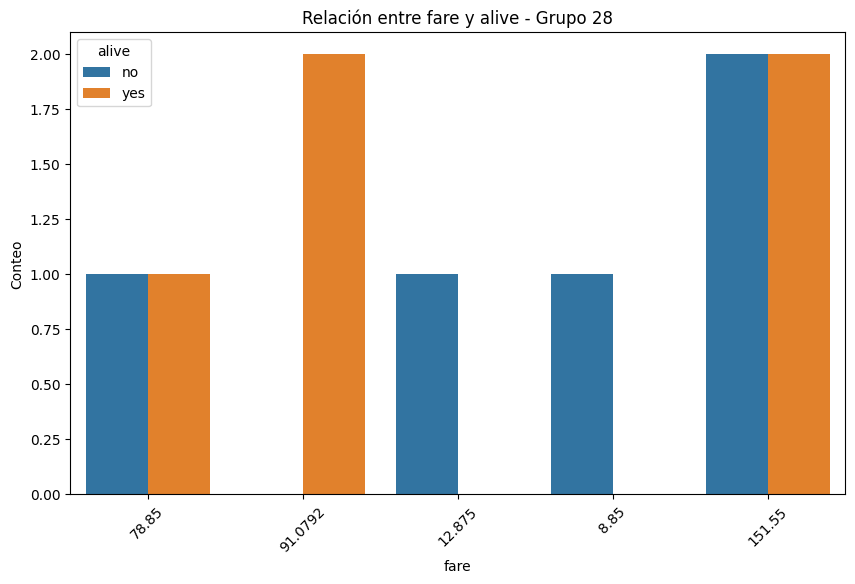

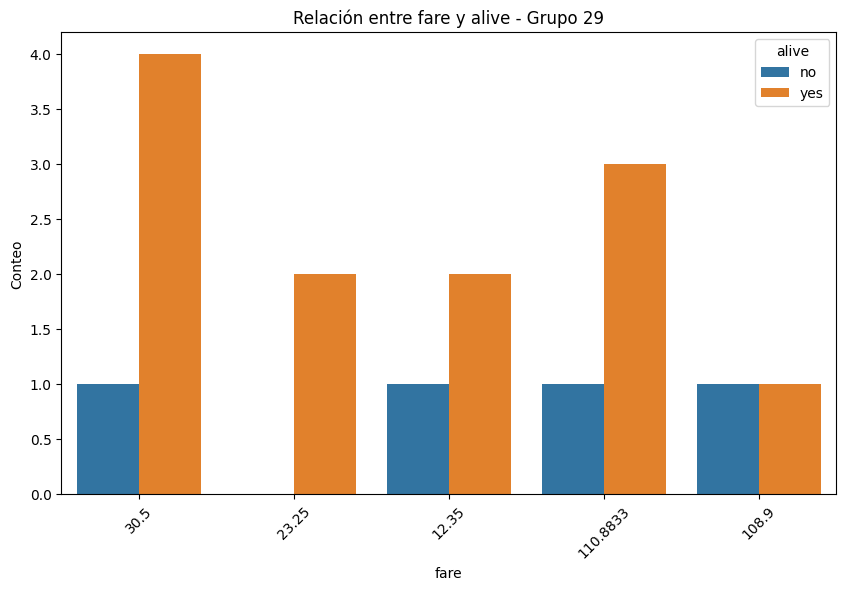

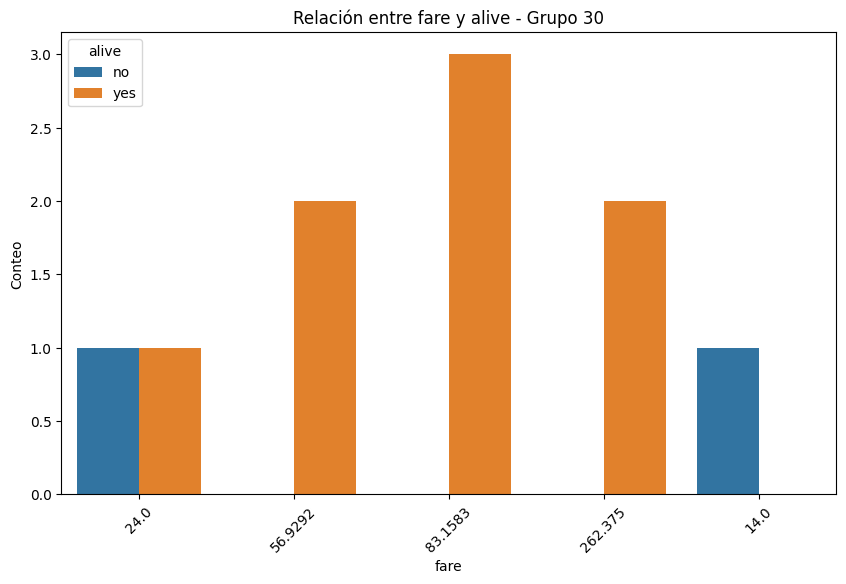

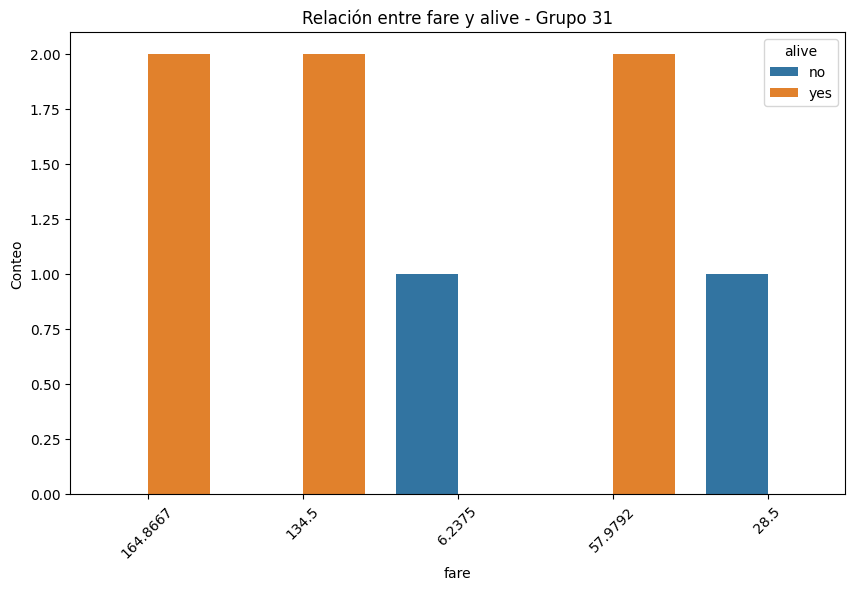

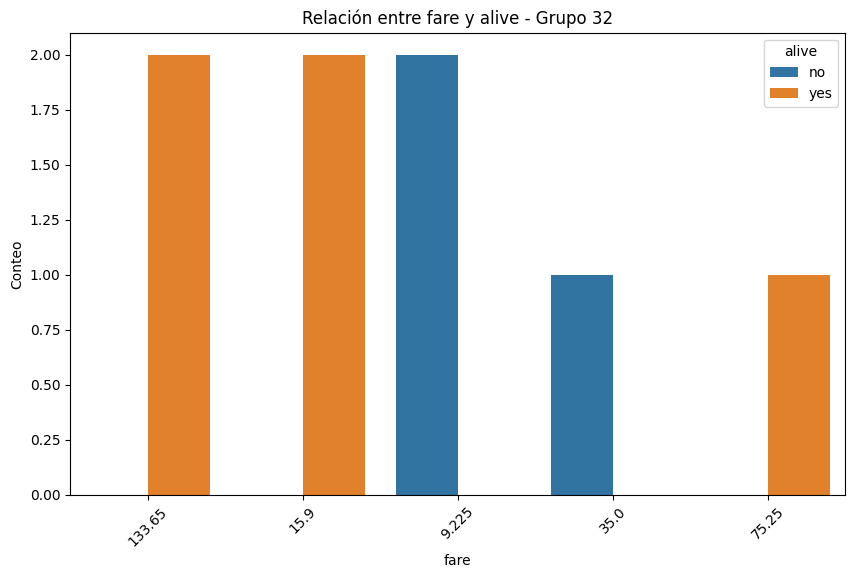

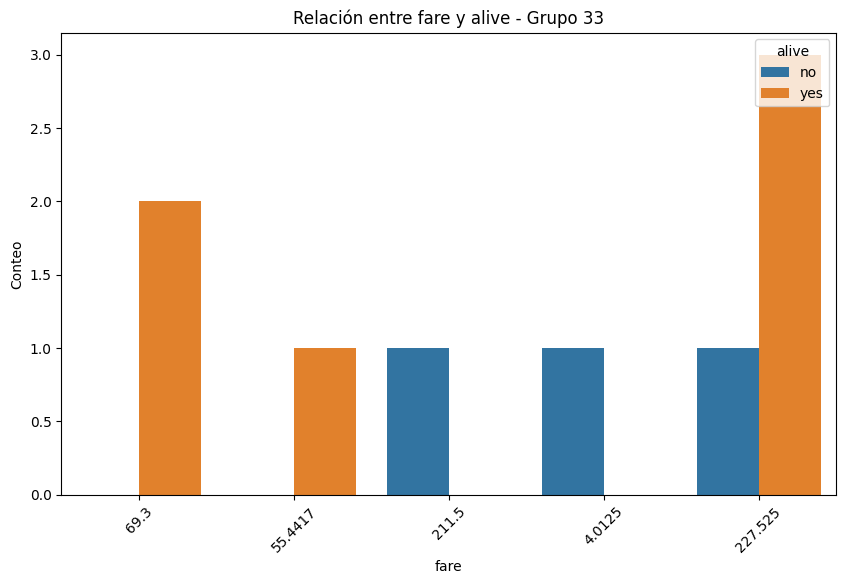

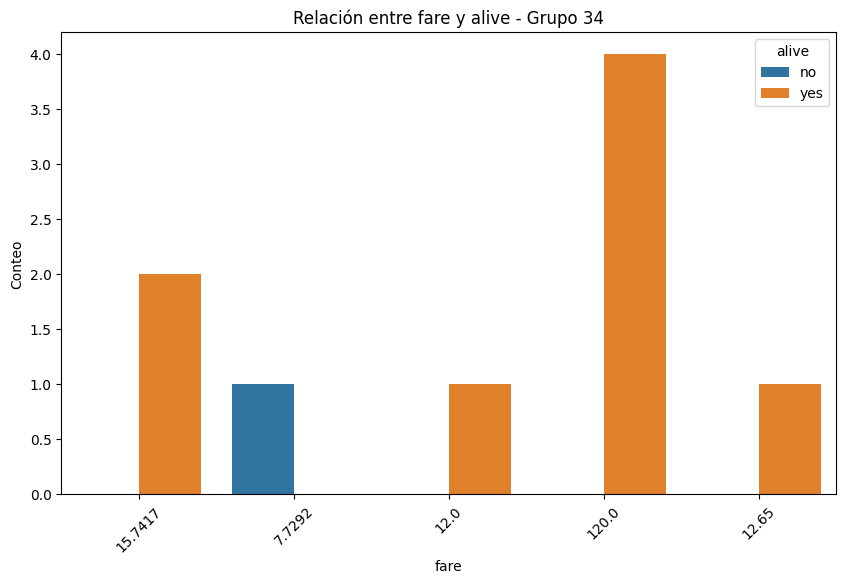

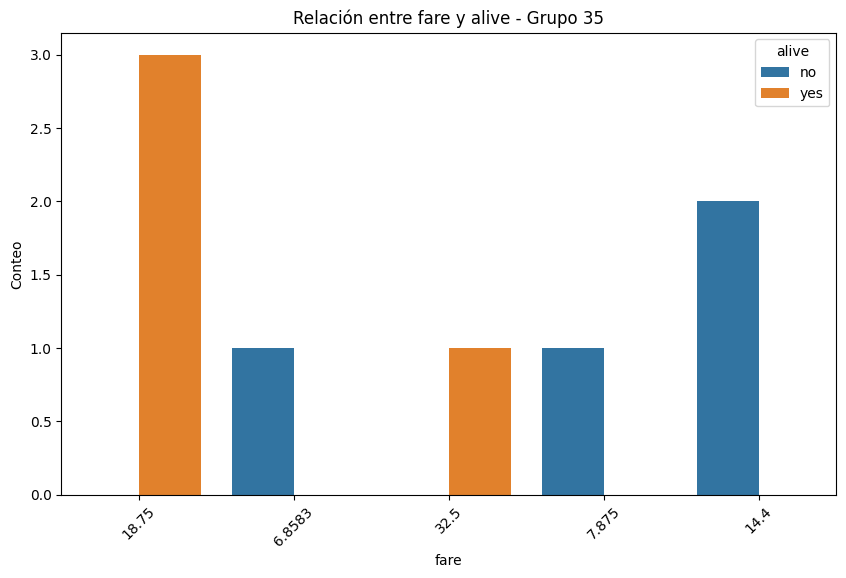

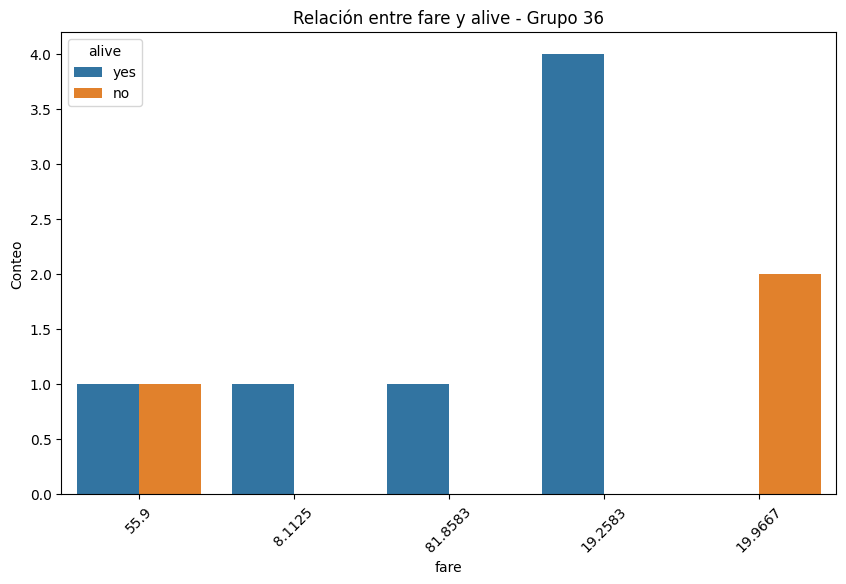

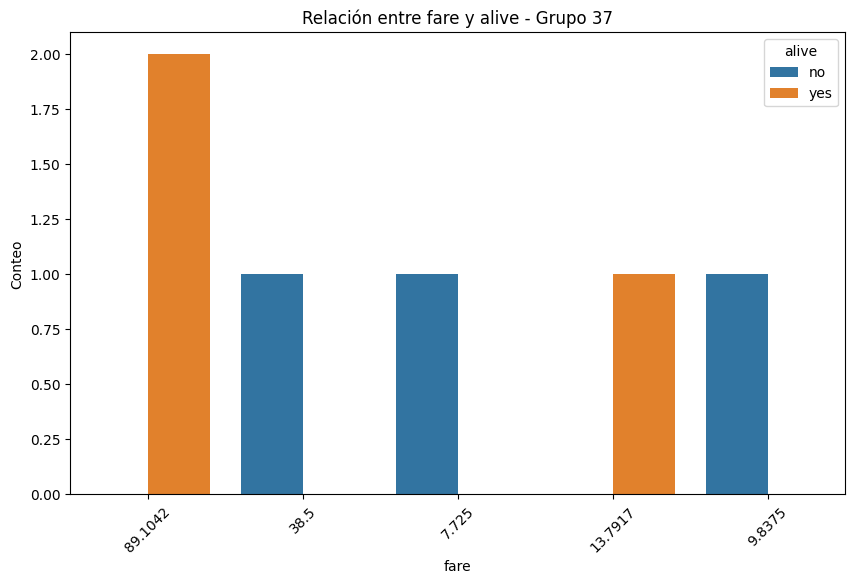

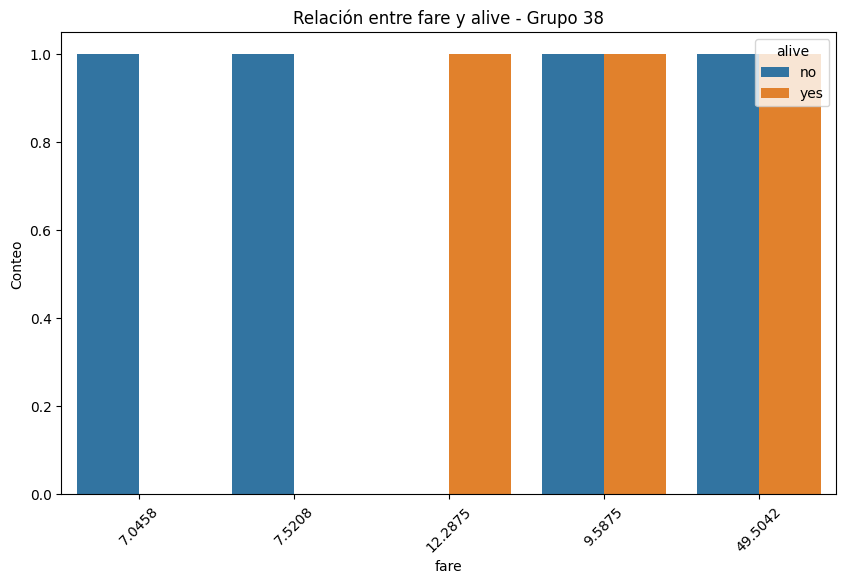

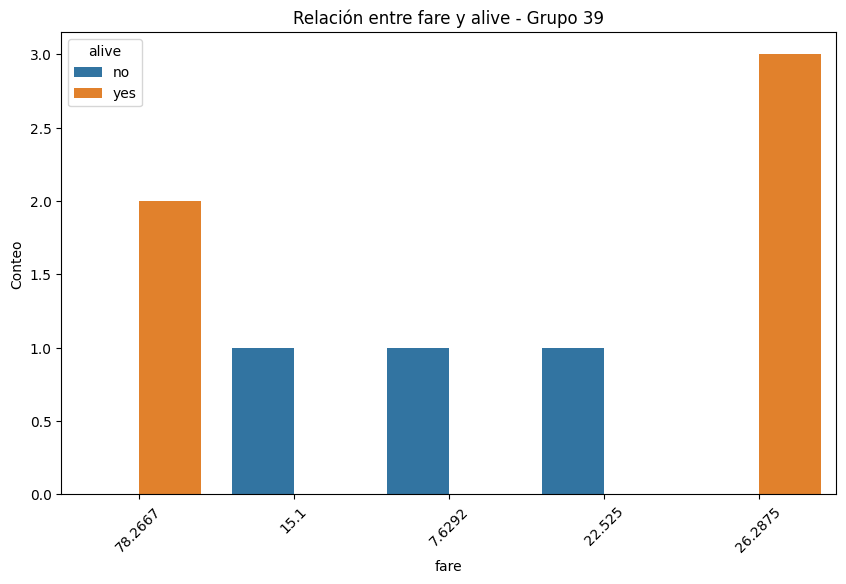

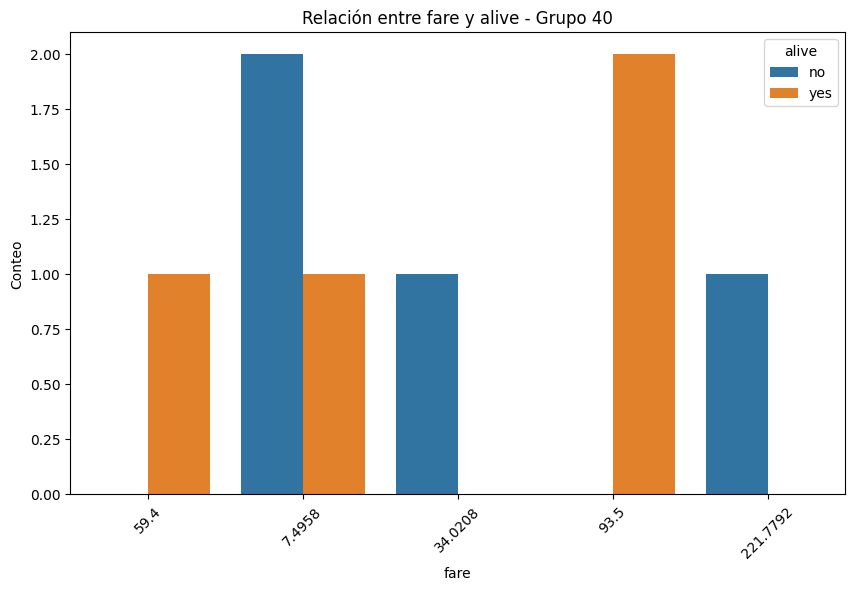

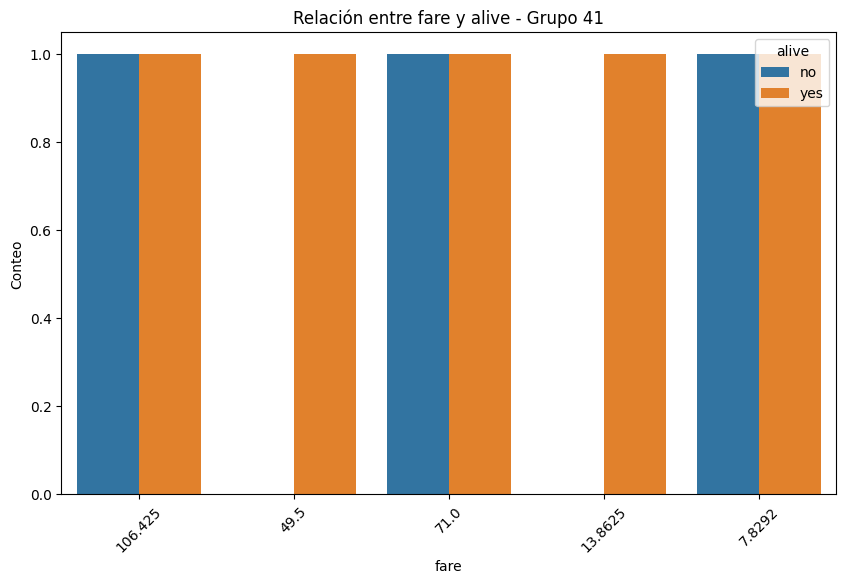

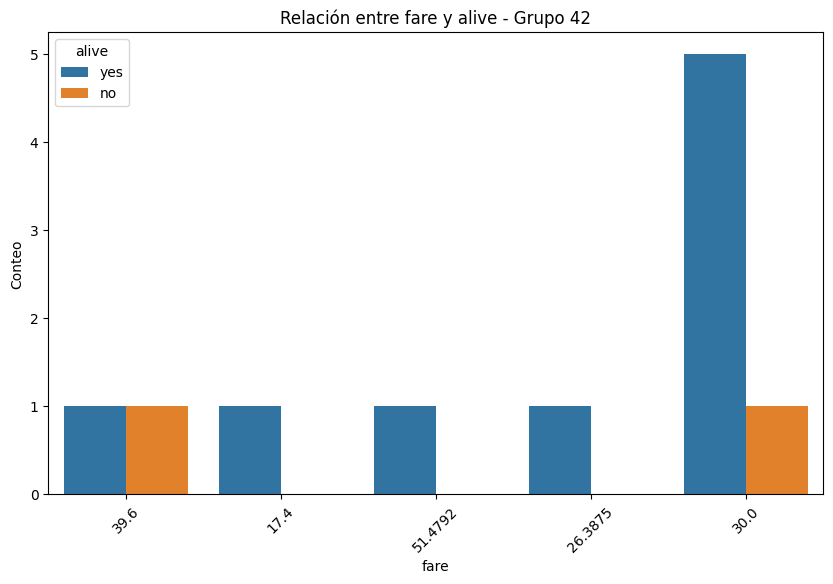

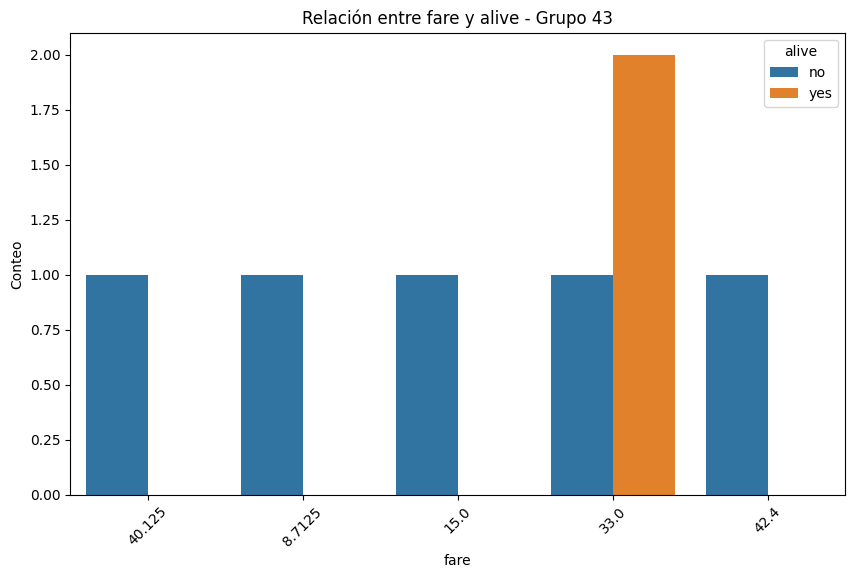

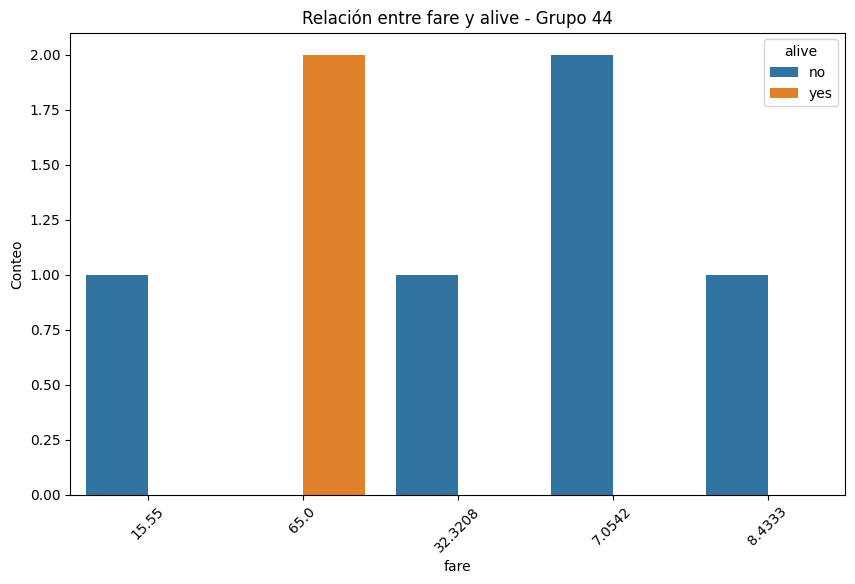

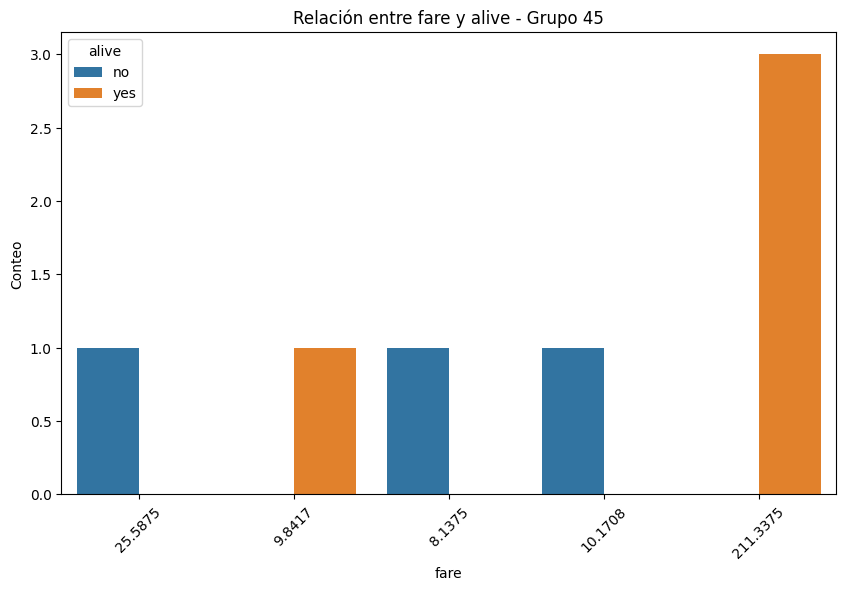

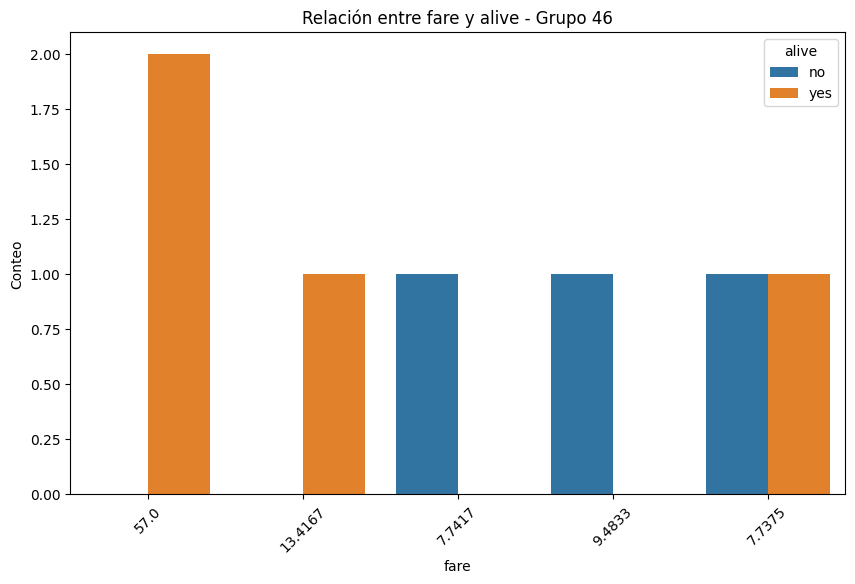

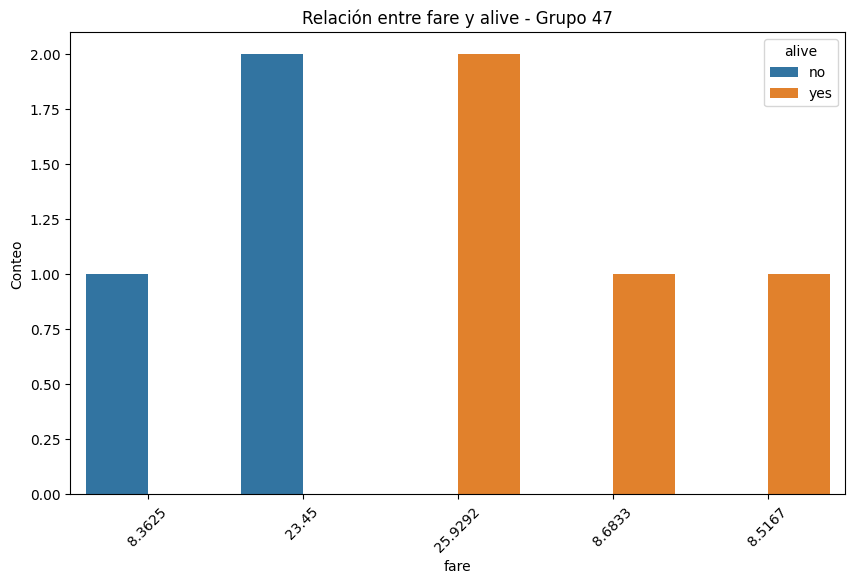

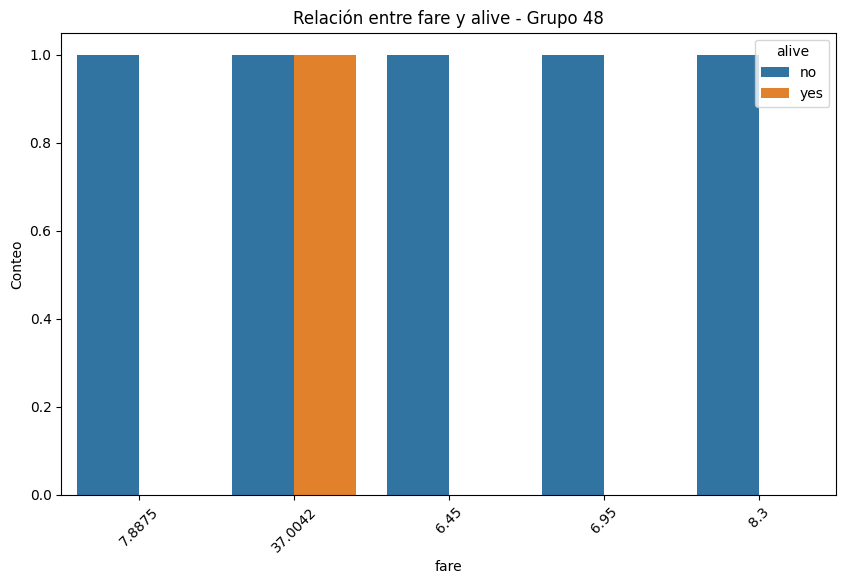

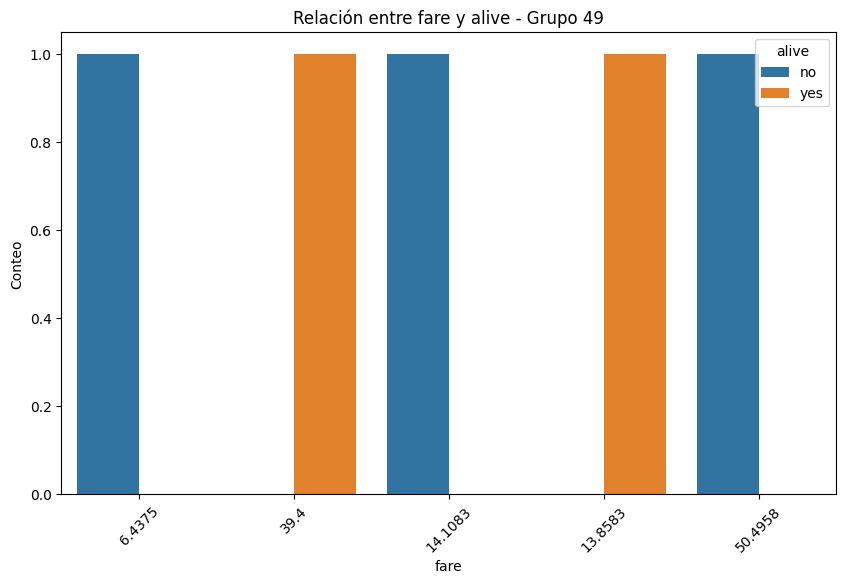

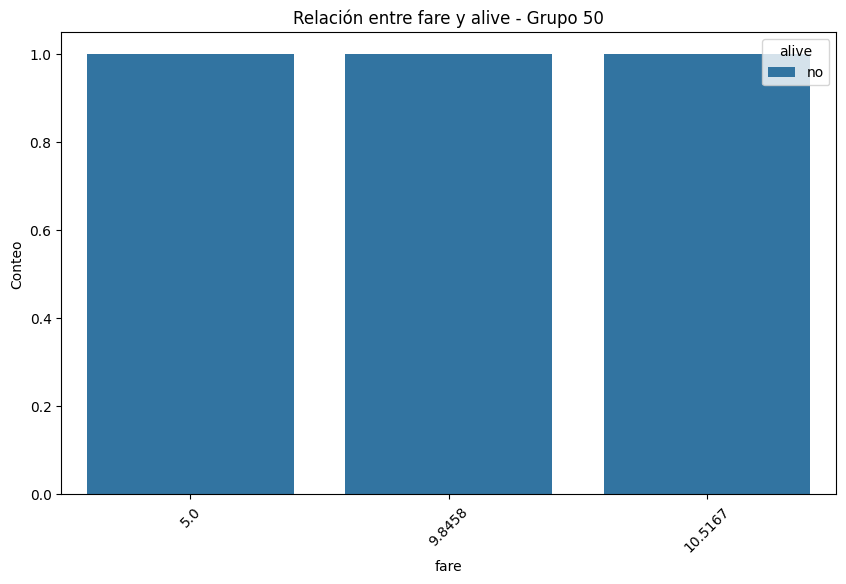

In [38]:
plot_categorical_relationship_fin(df_titanic,"fare","alive",relative_freq=False, show_values=False, size_group = 5)

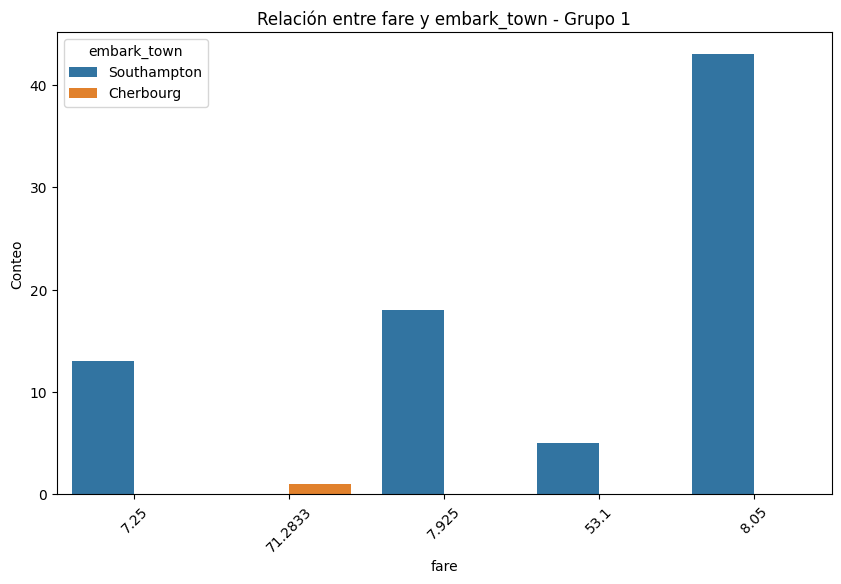

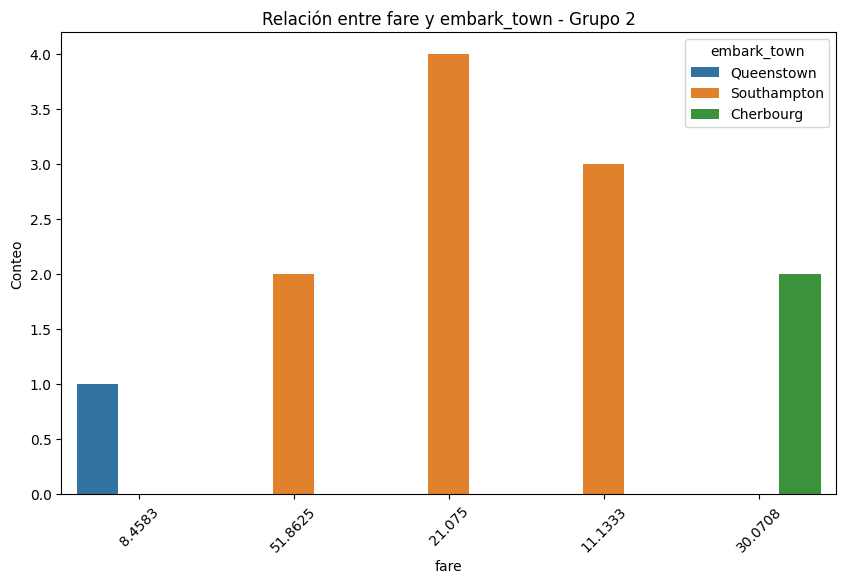

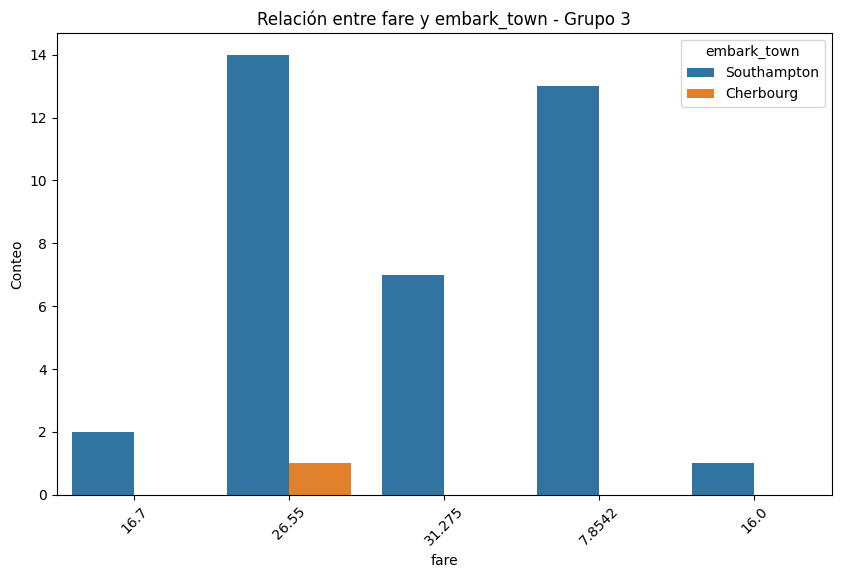

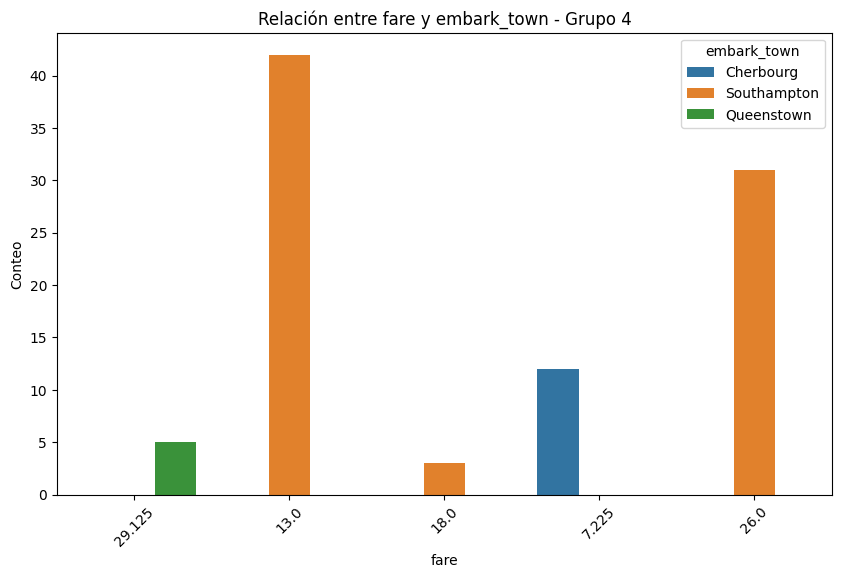

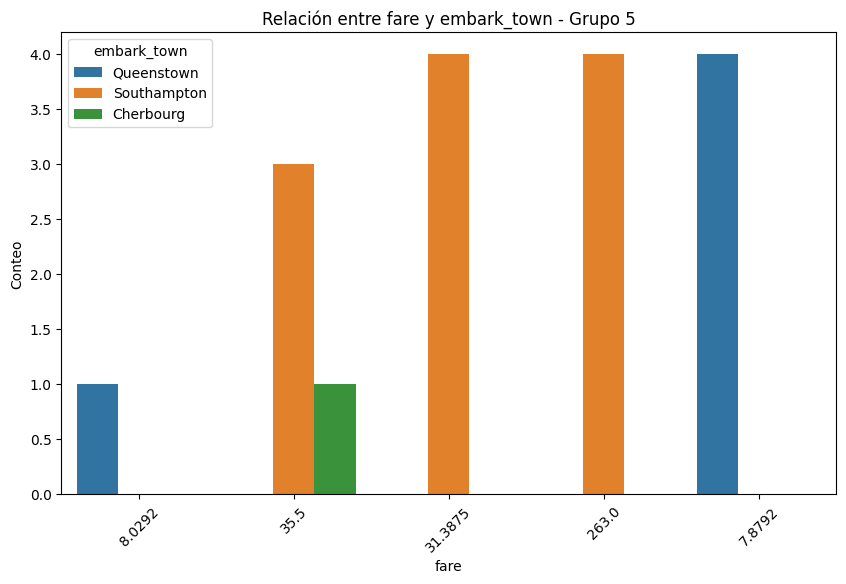

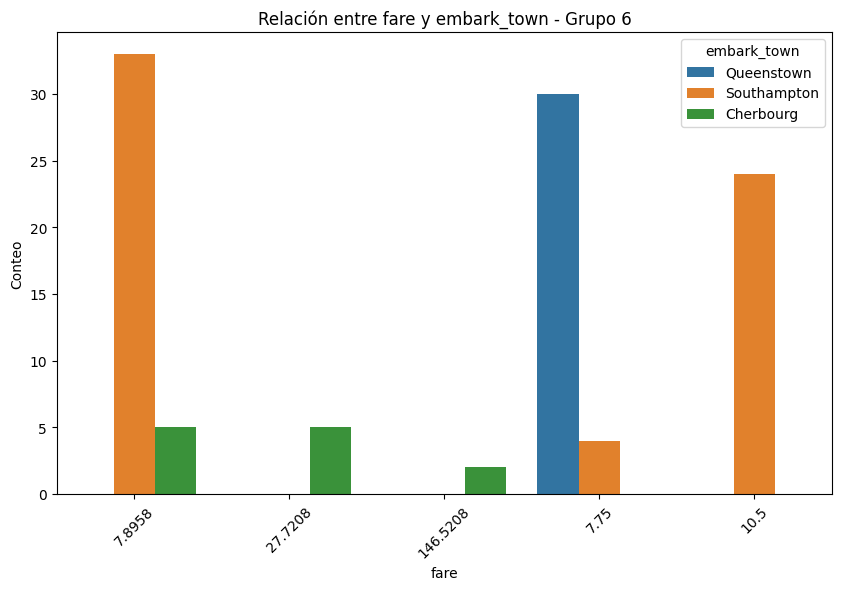

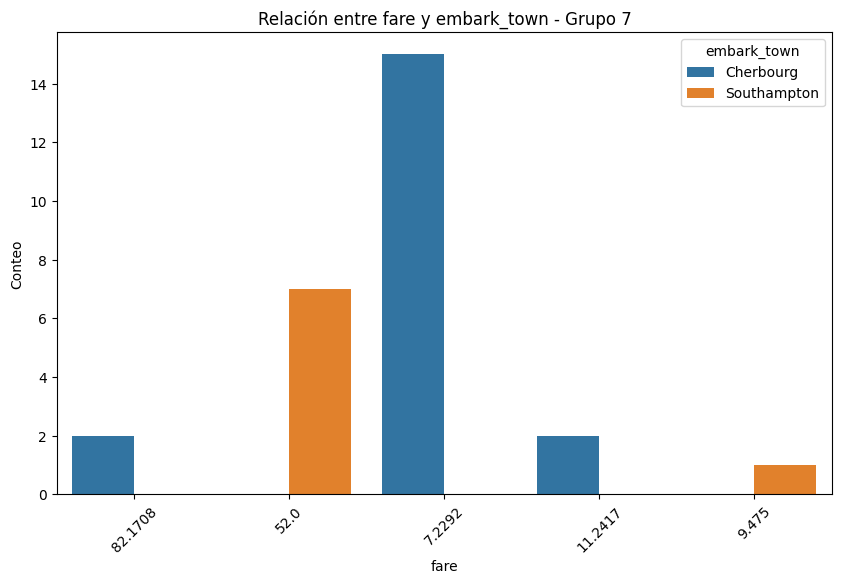

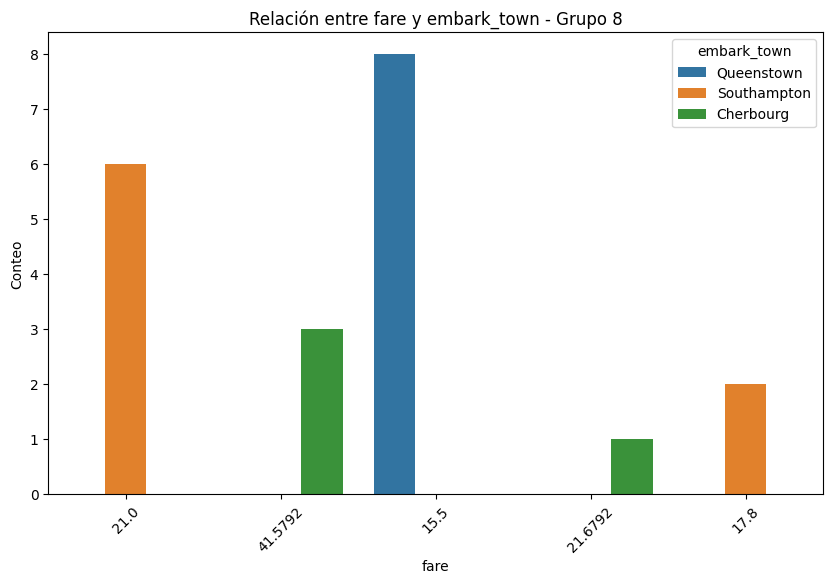

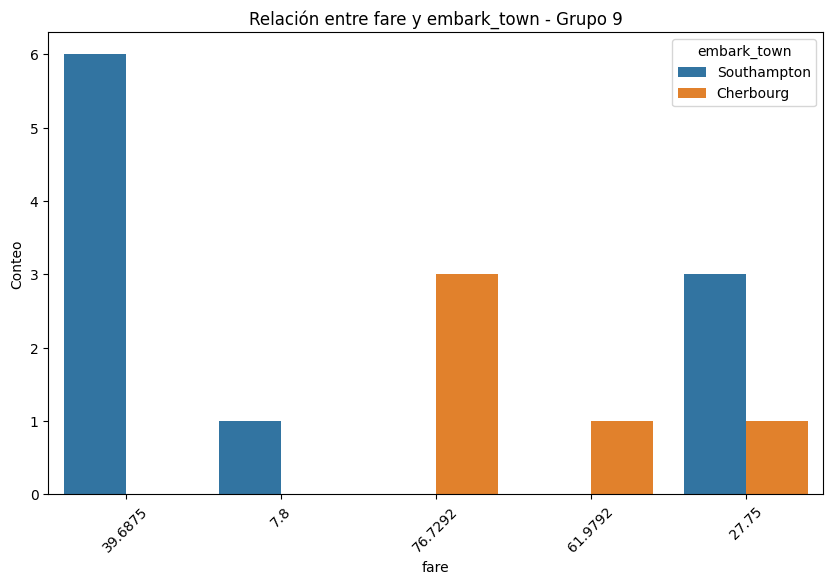

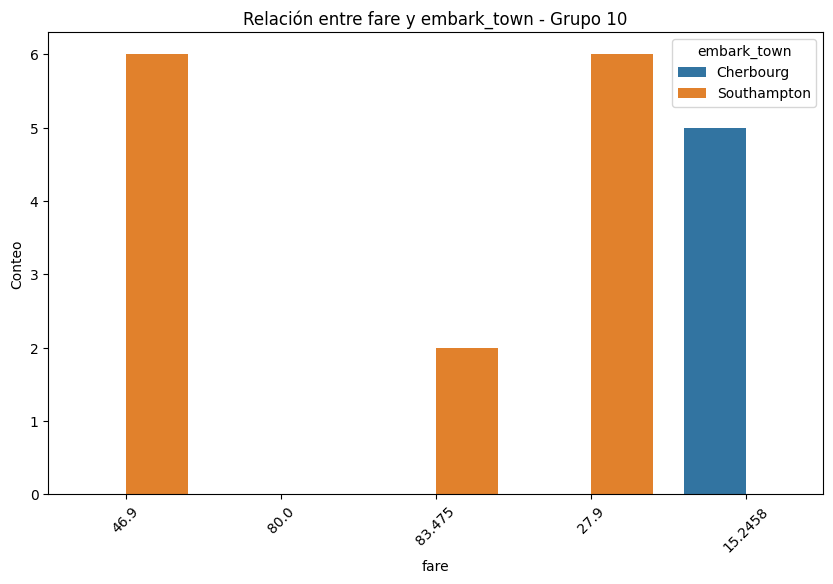

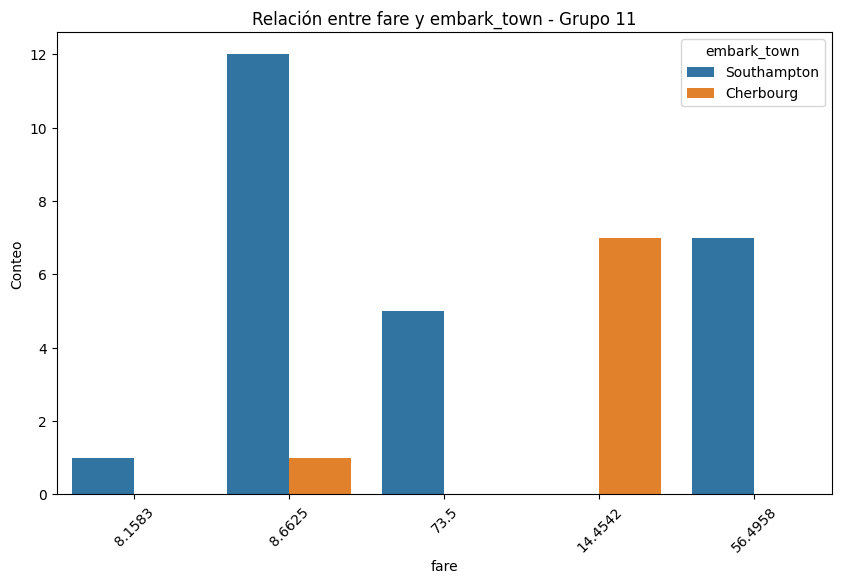

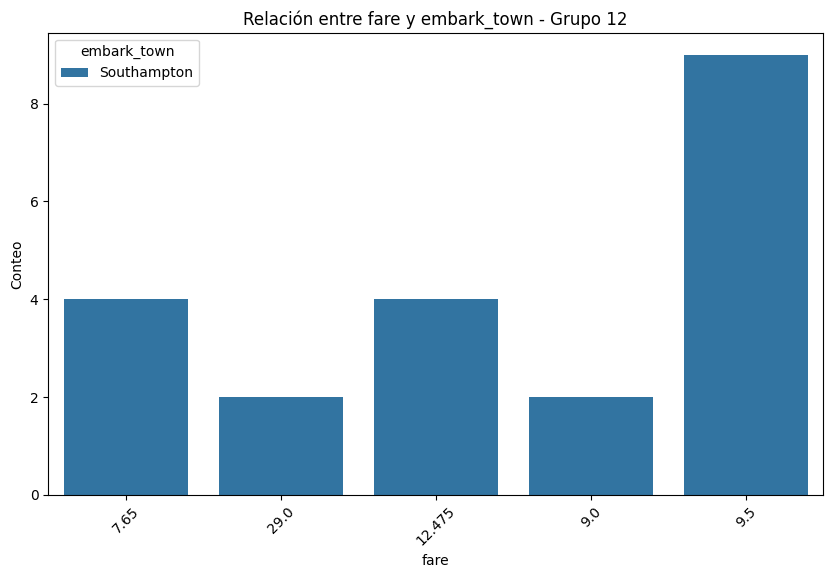

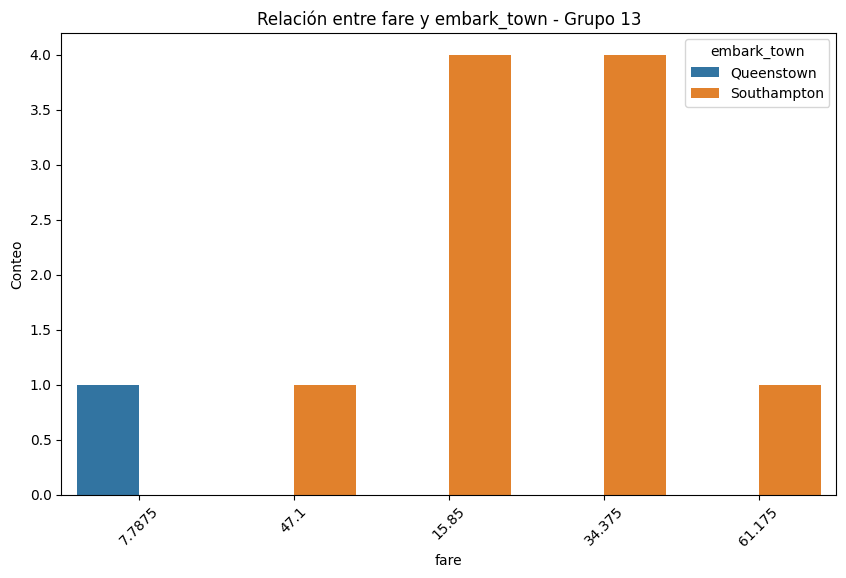

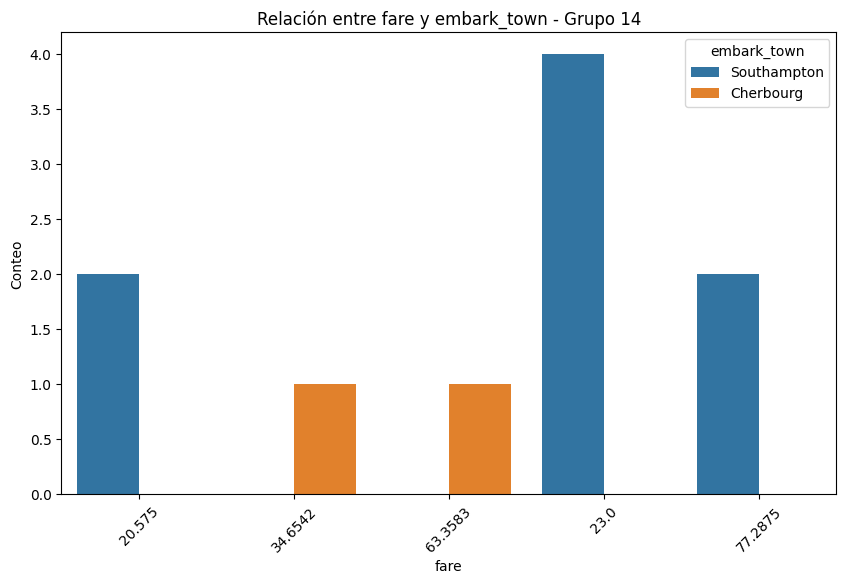

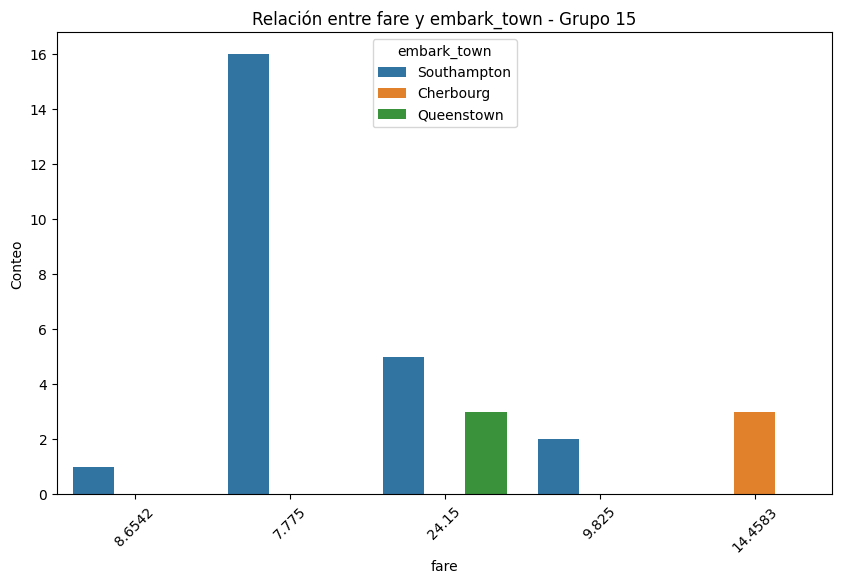

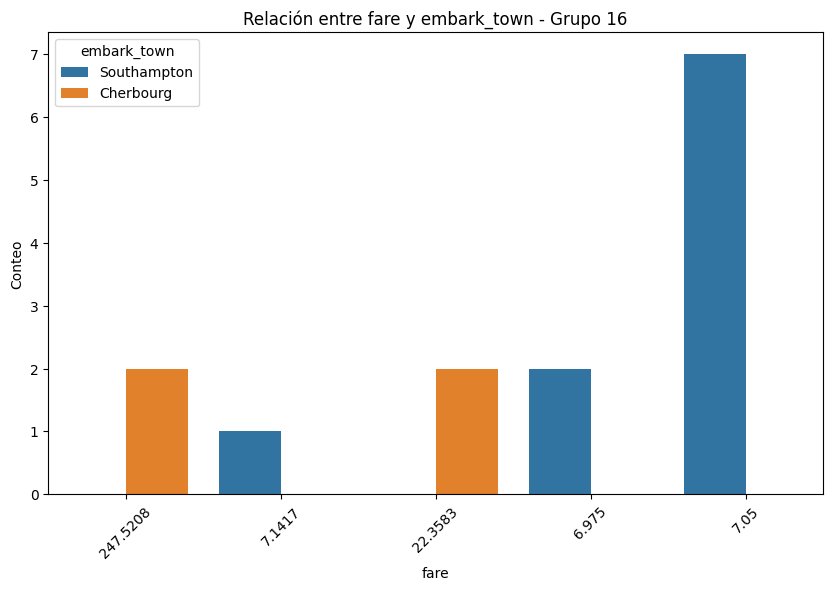

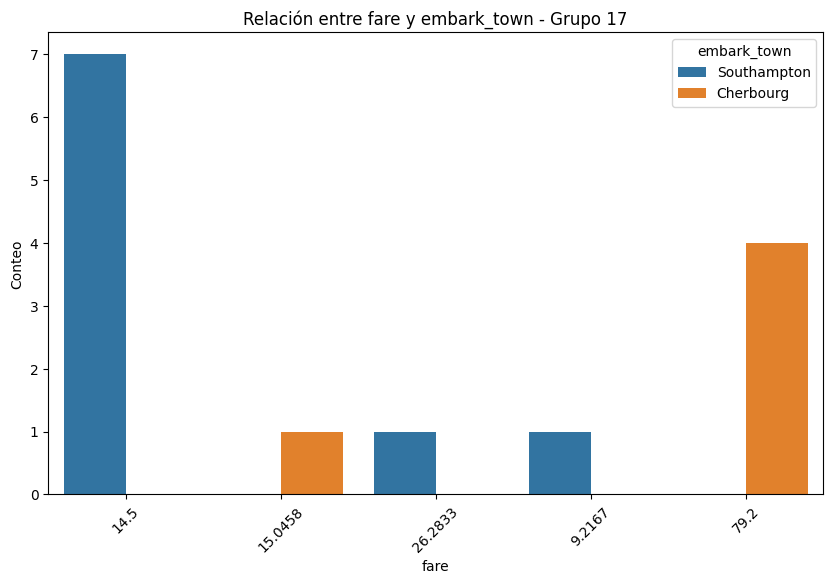

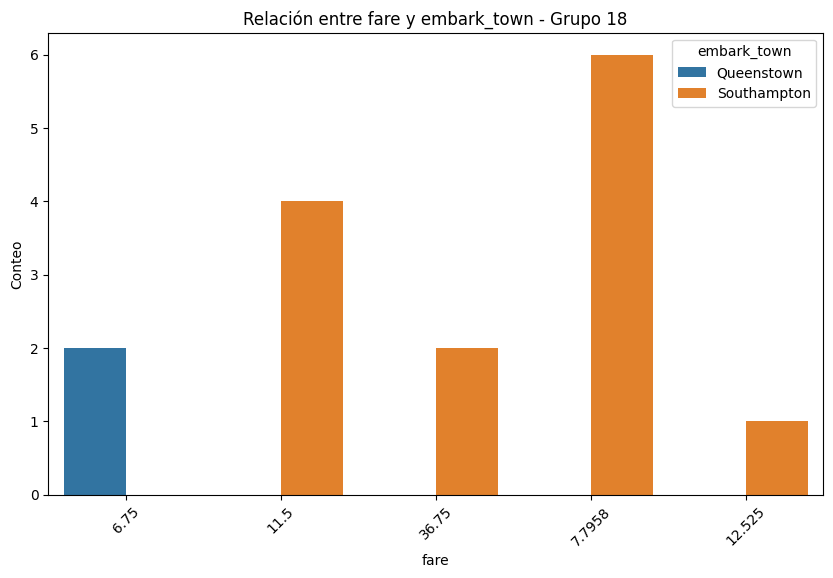

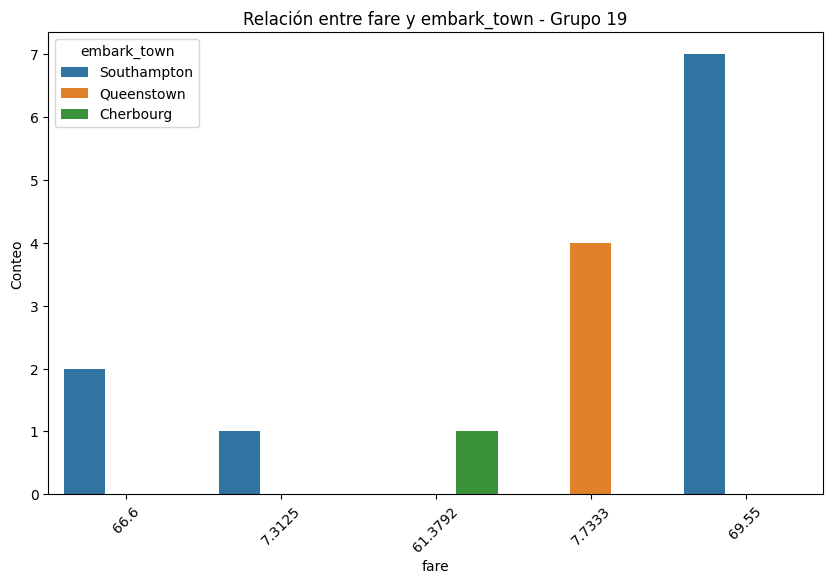

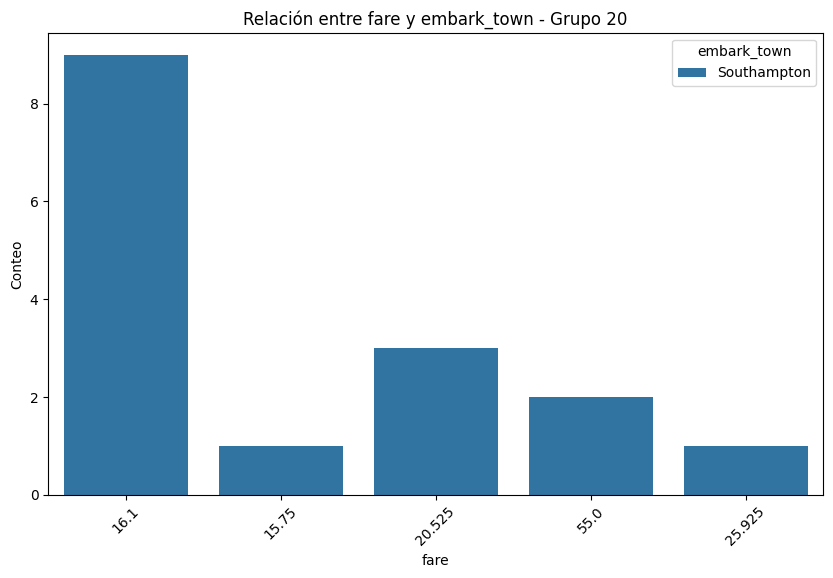

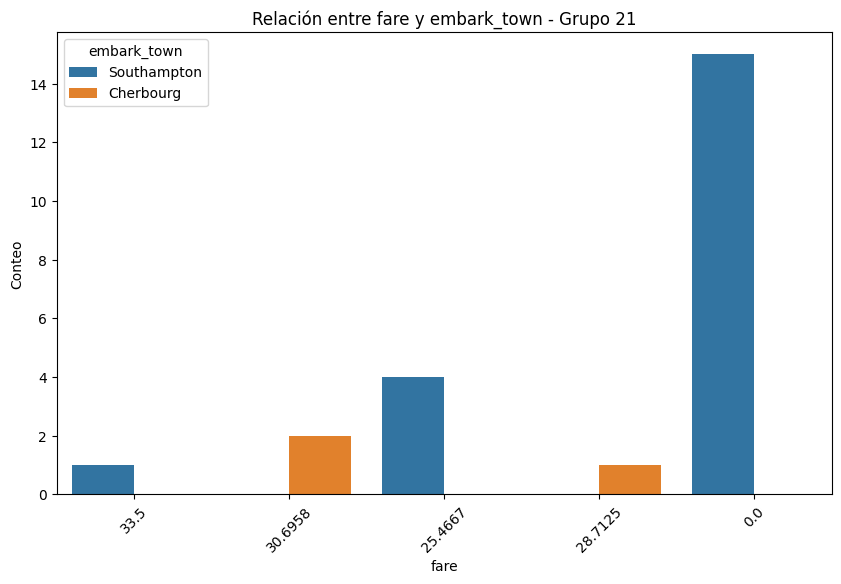

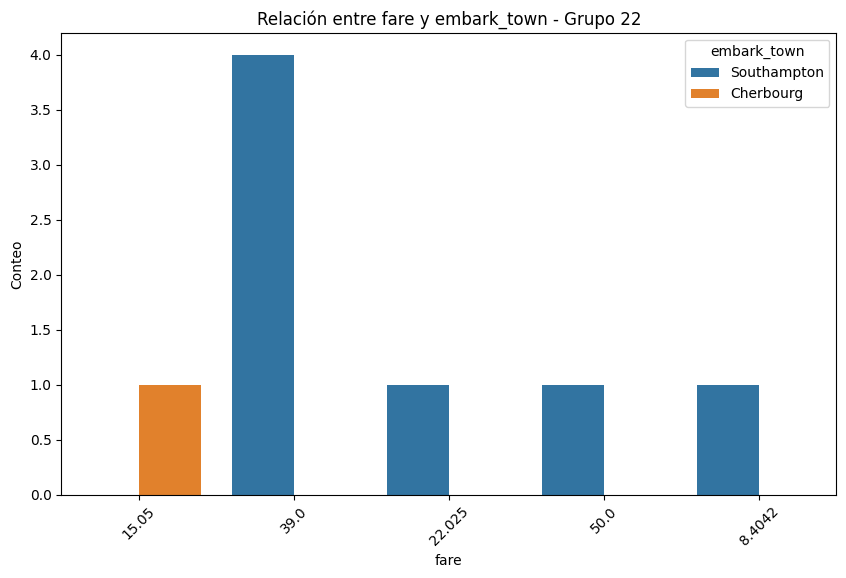

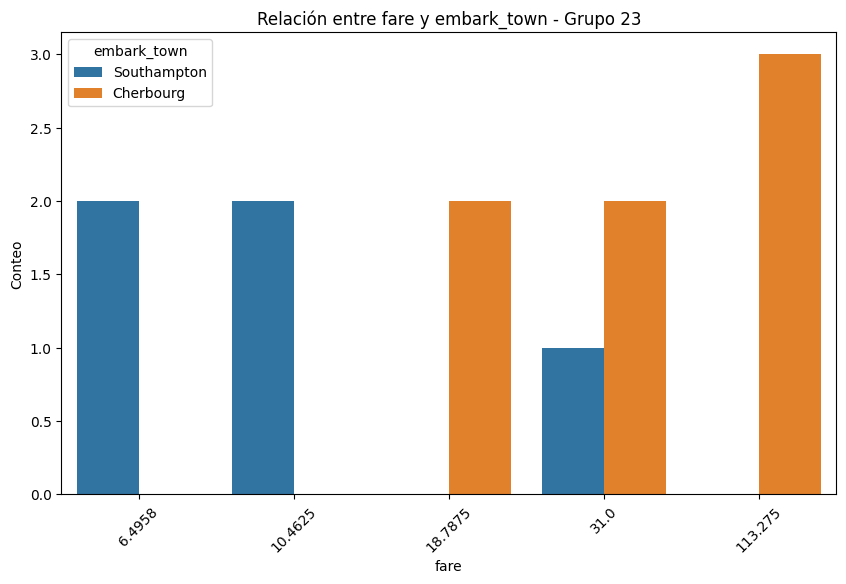

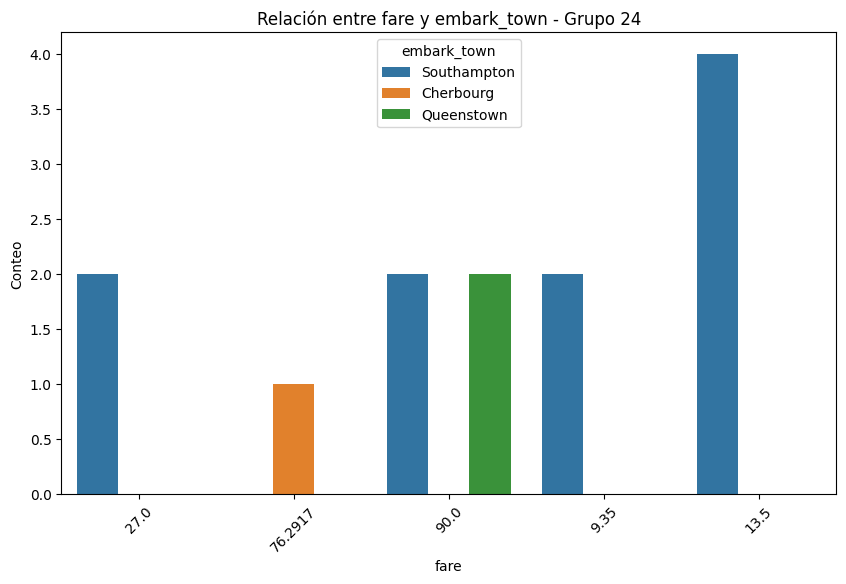

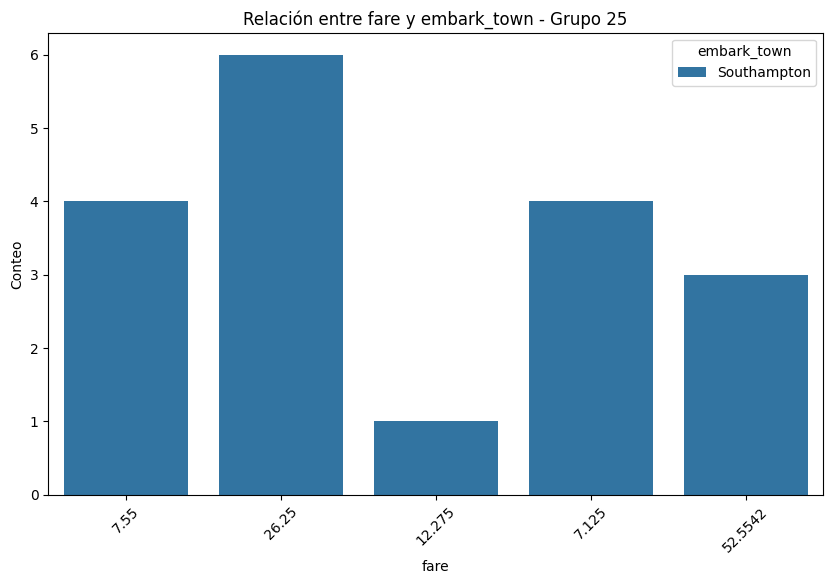

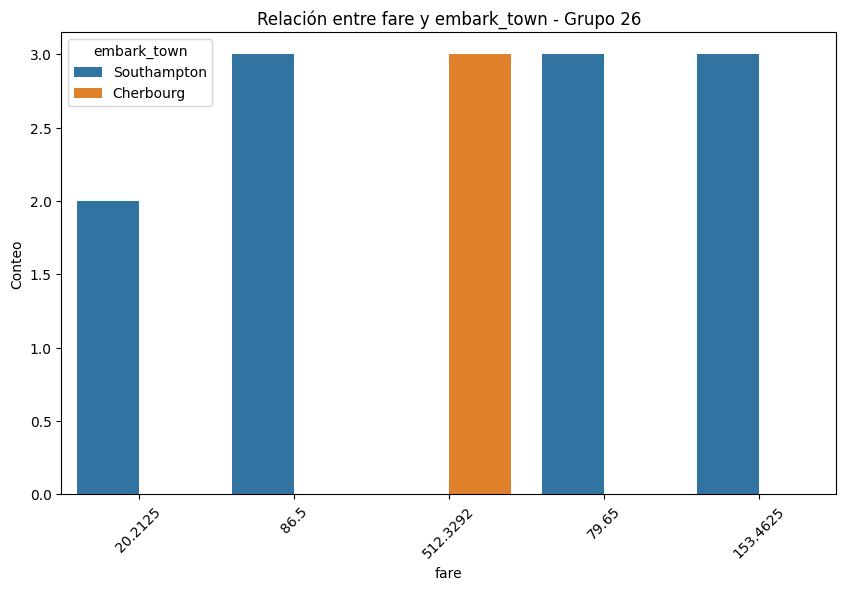

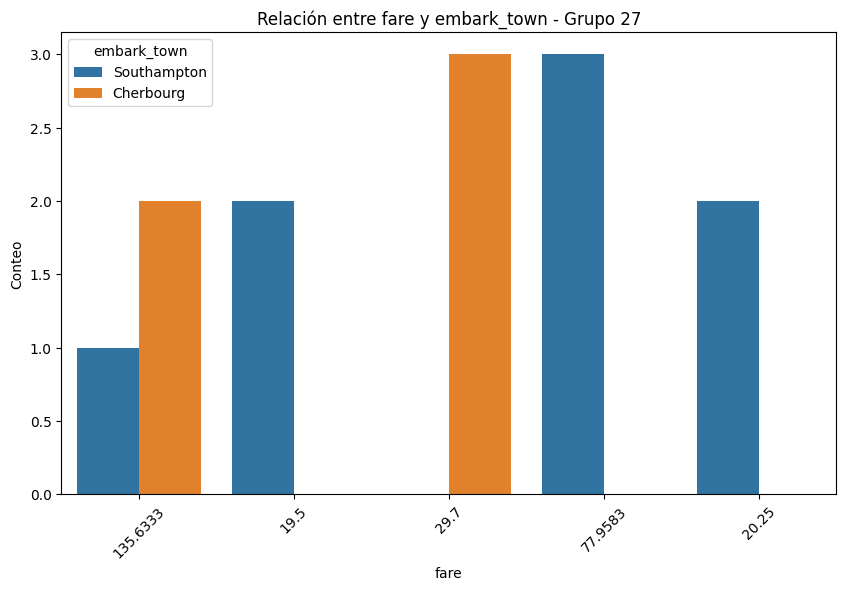

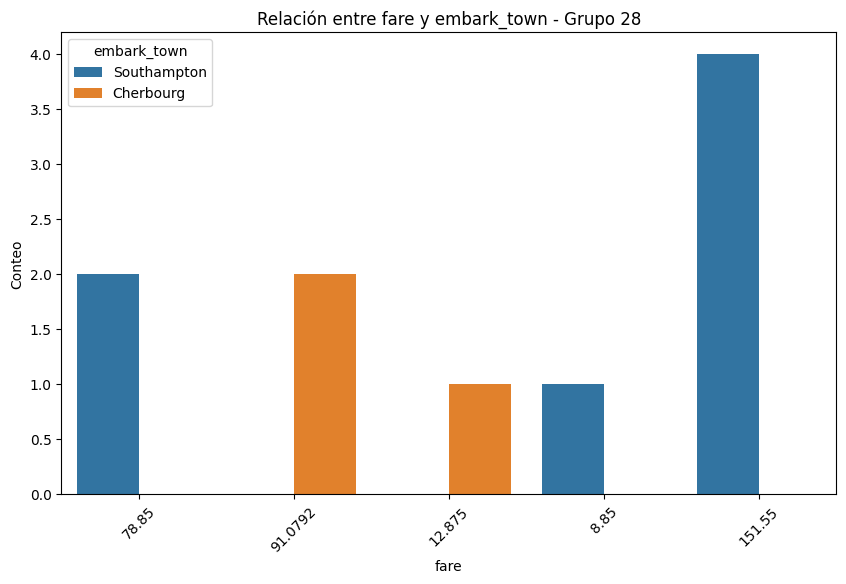

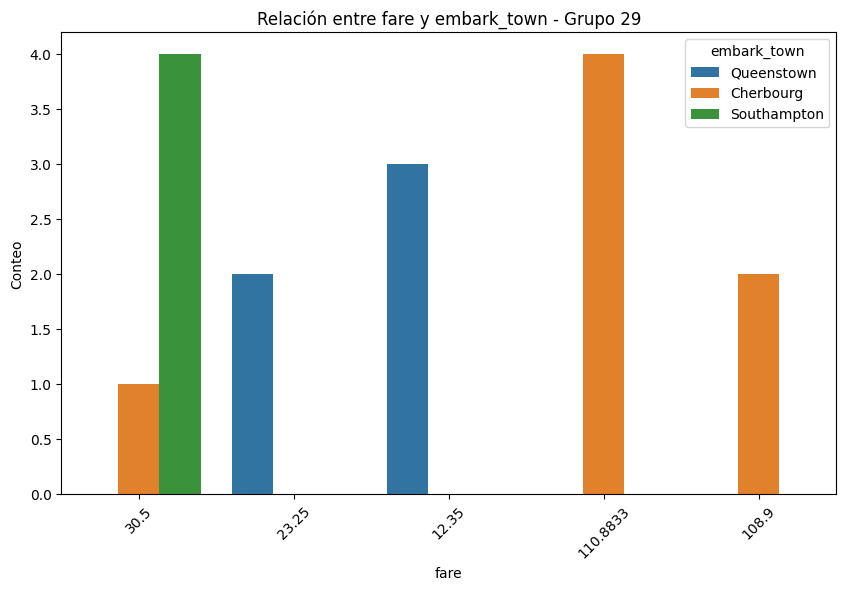

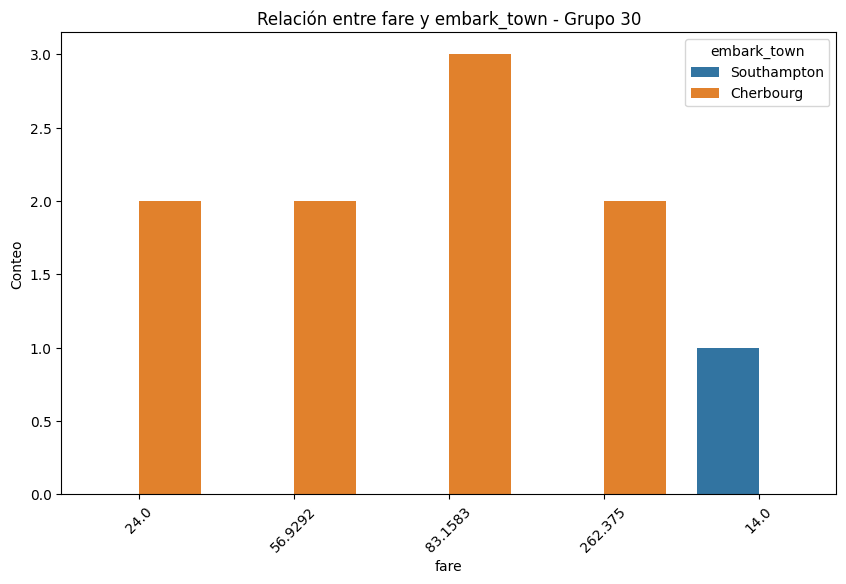

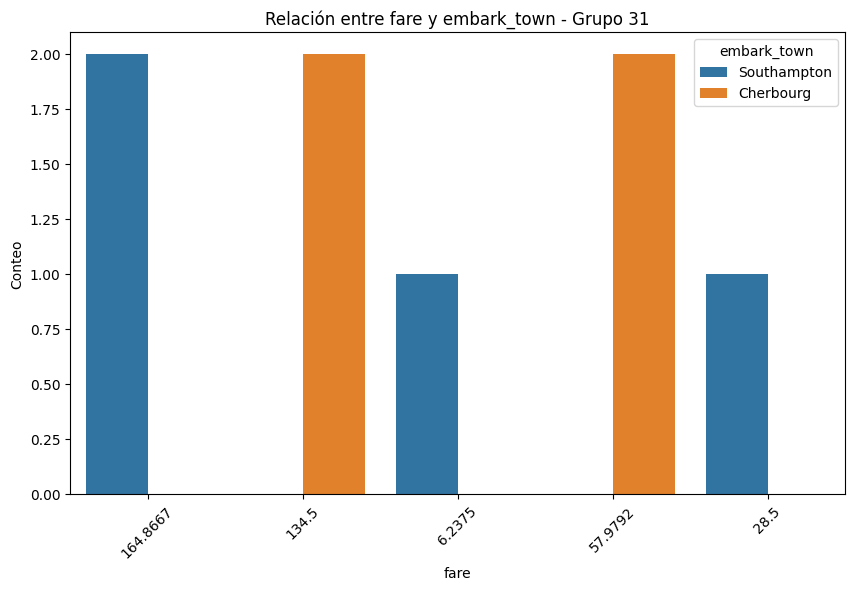

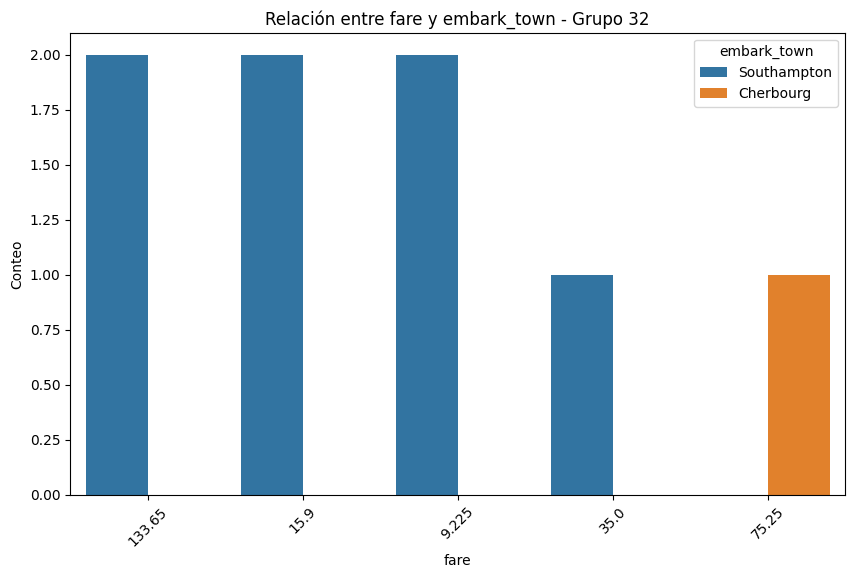

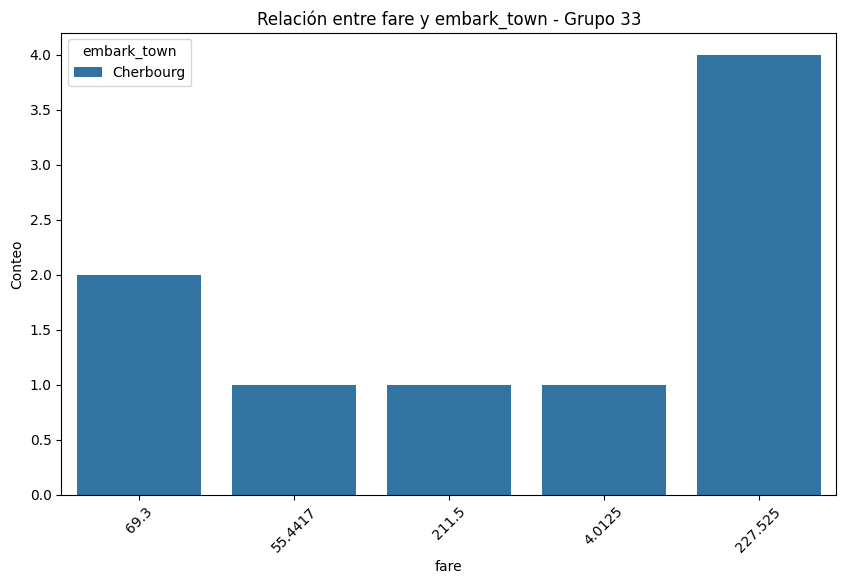

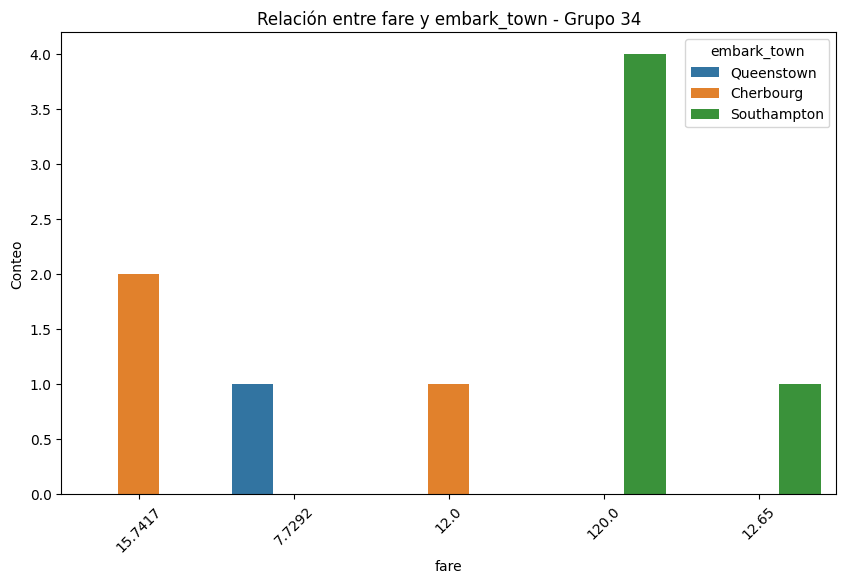

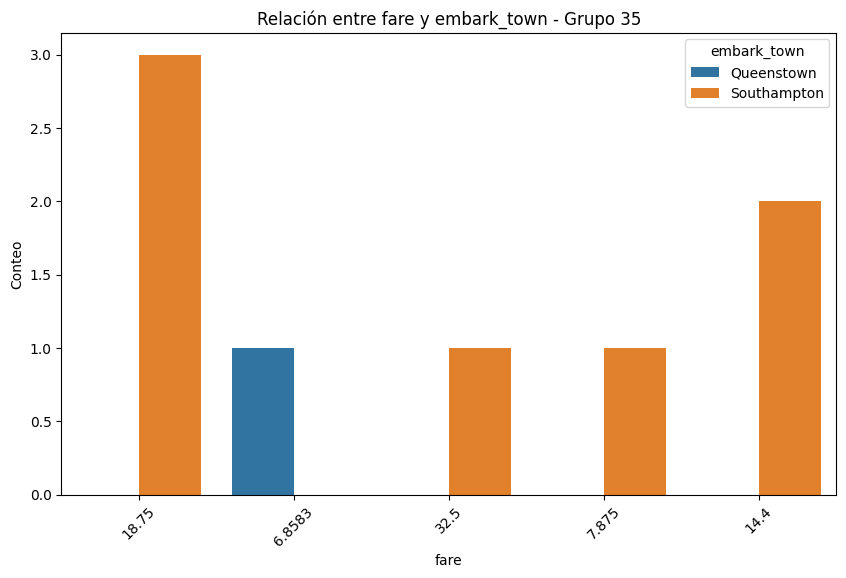

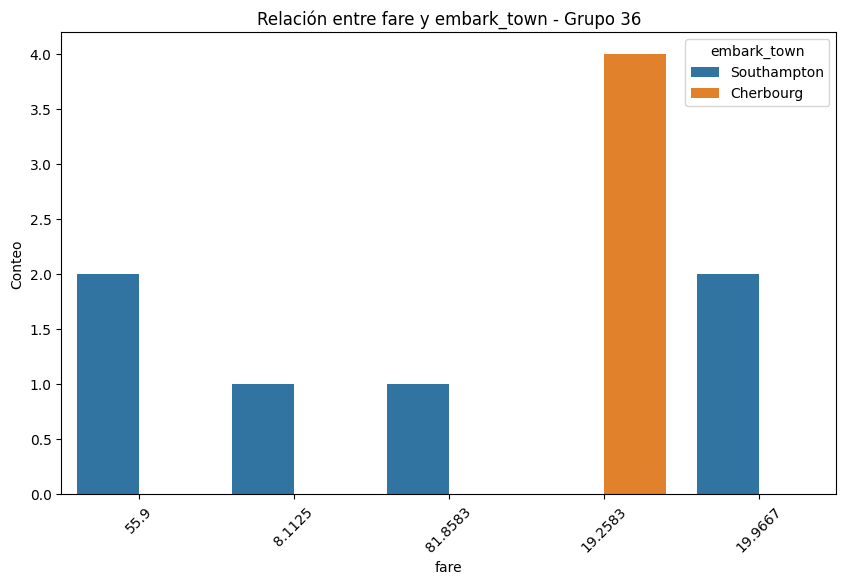

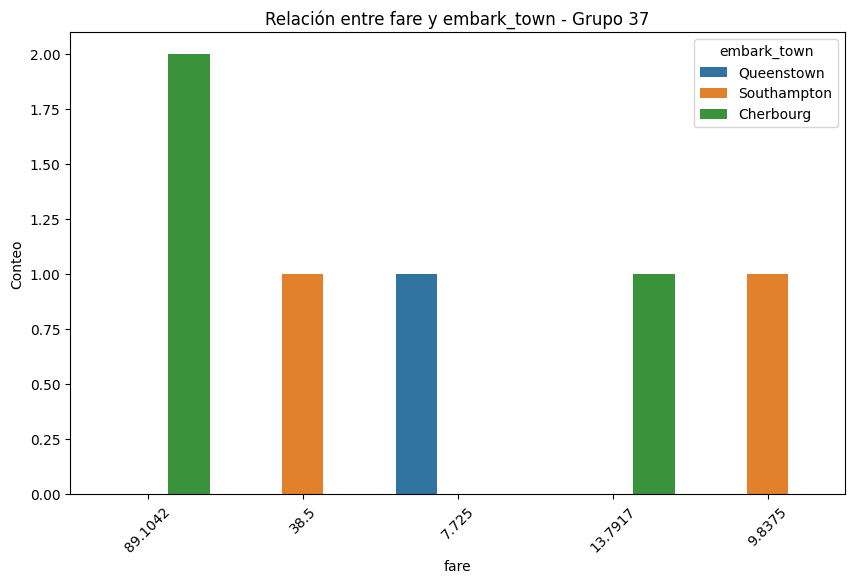

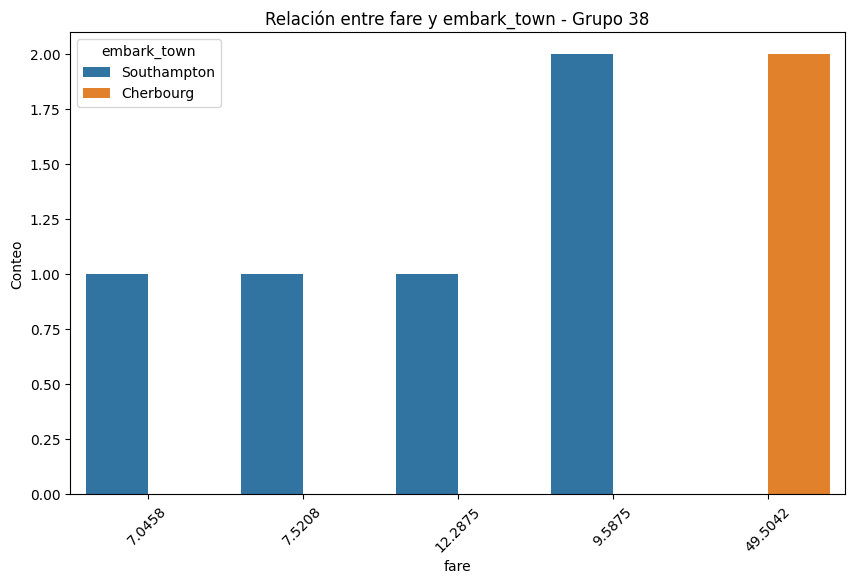

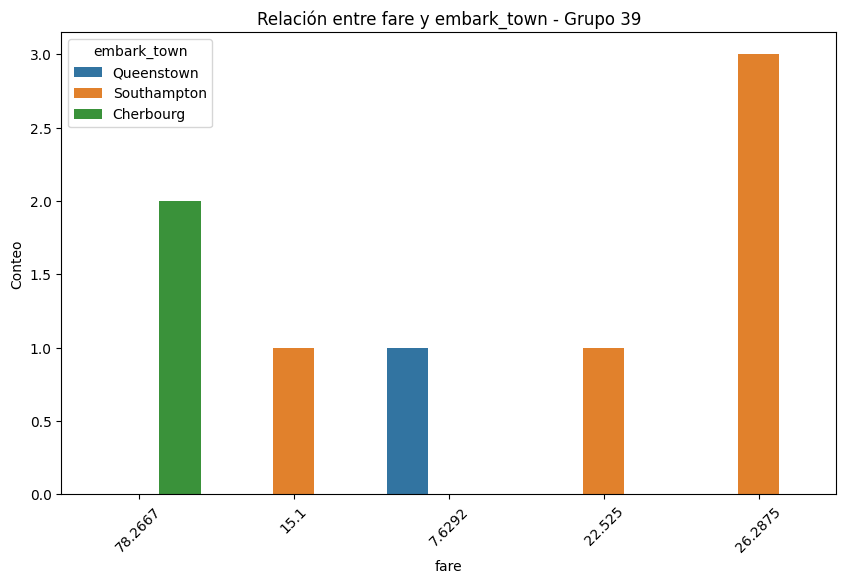

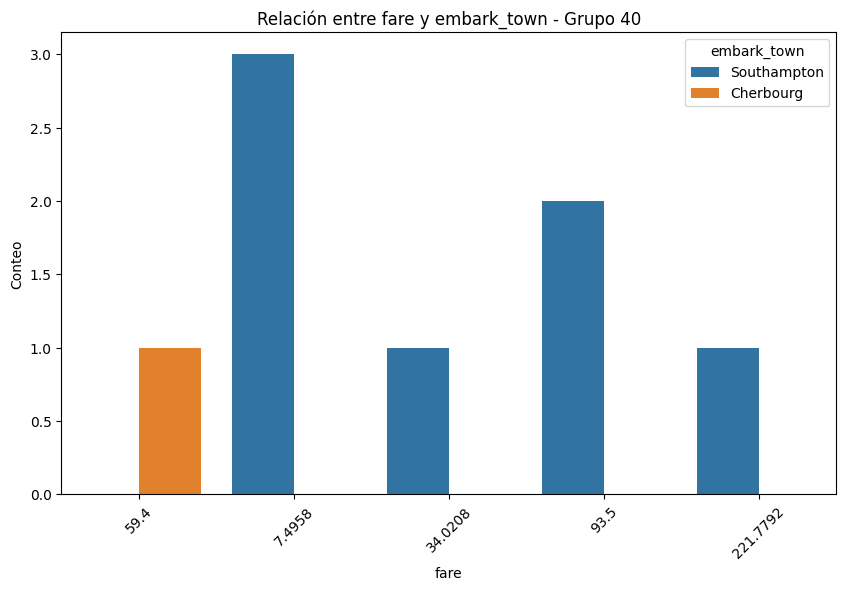

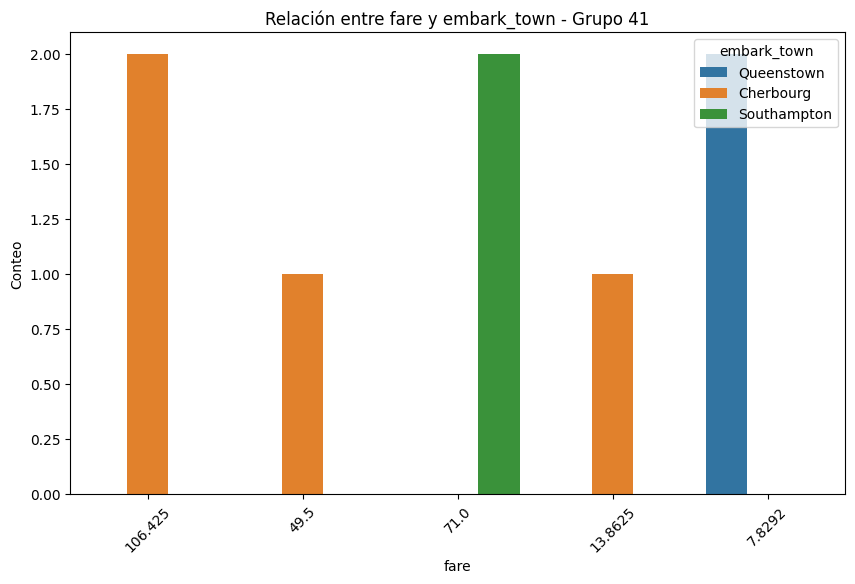

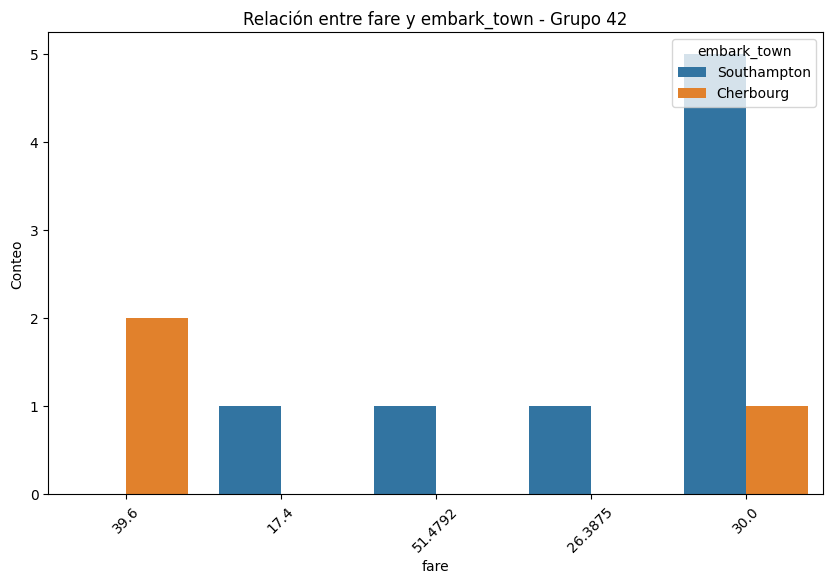

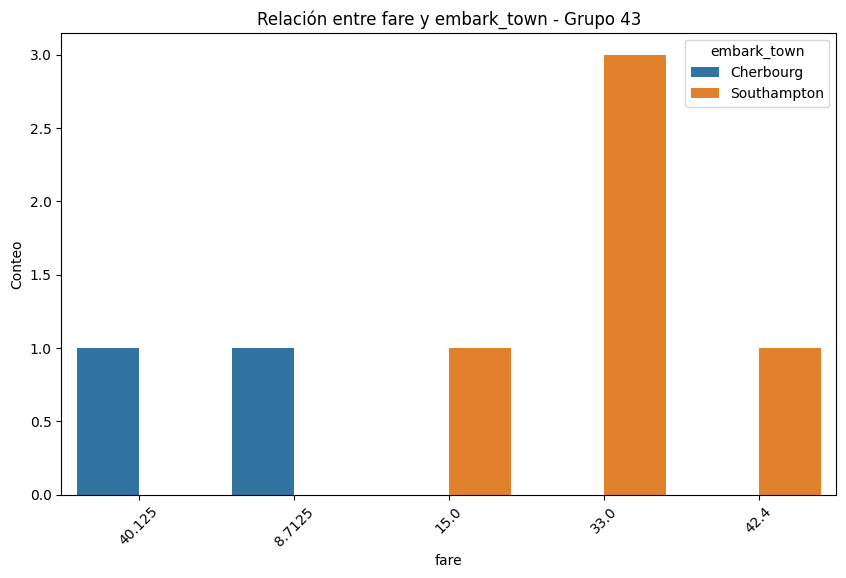

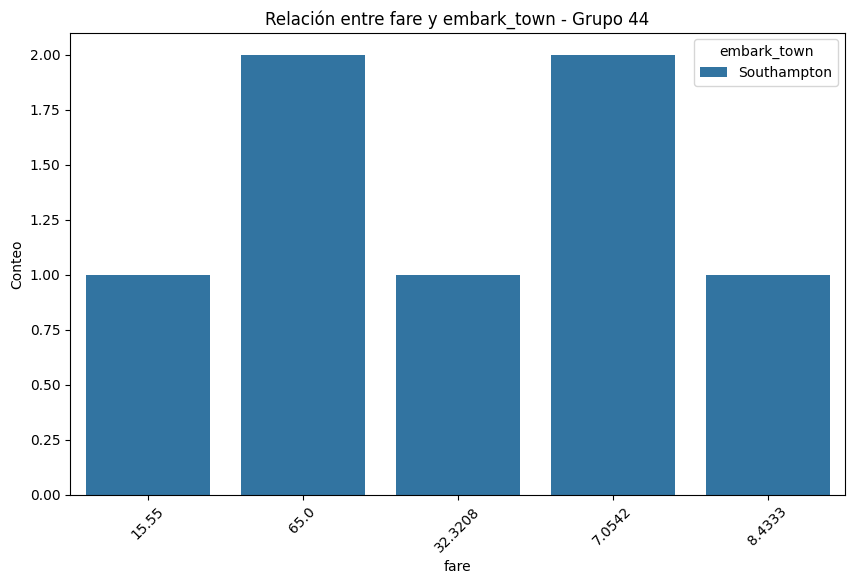

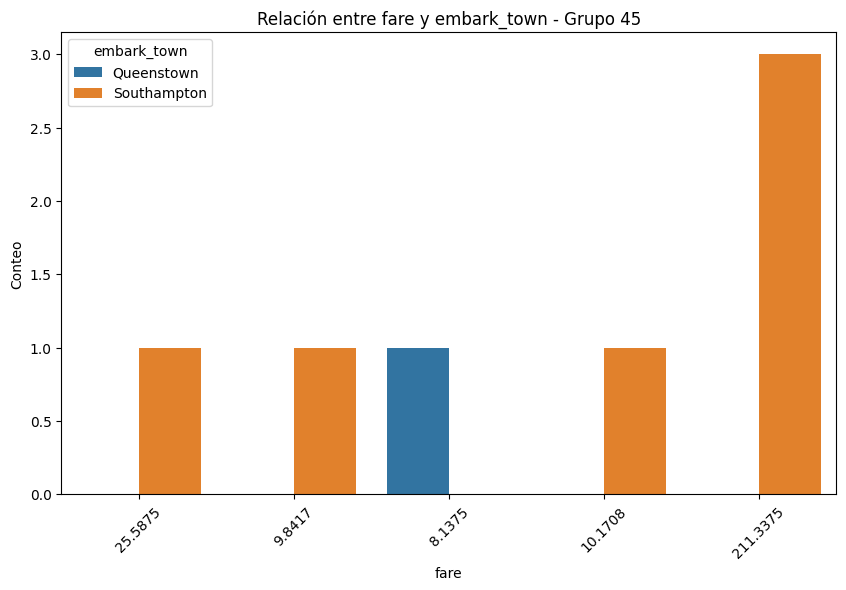

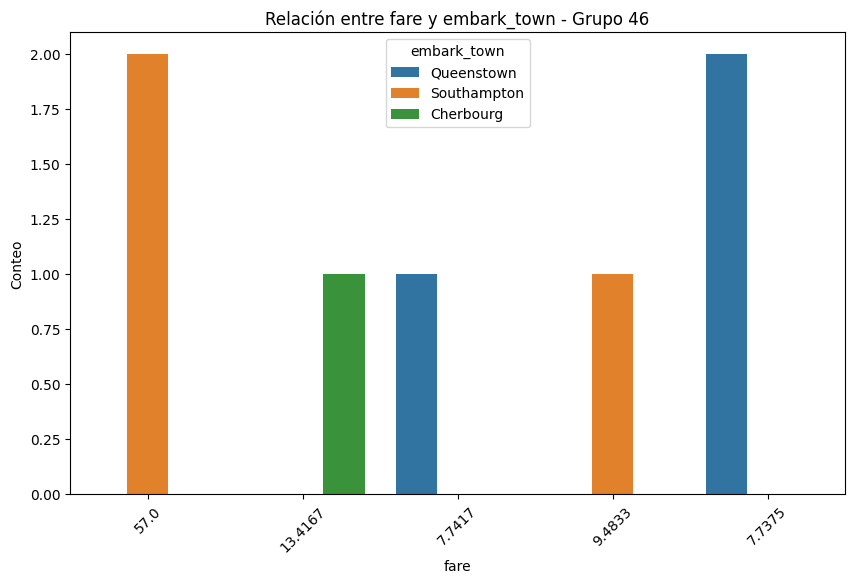

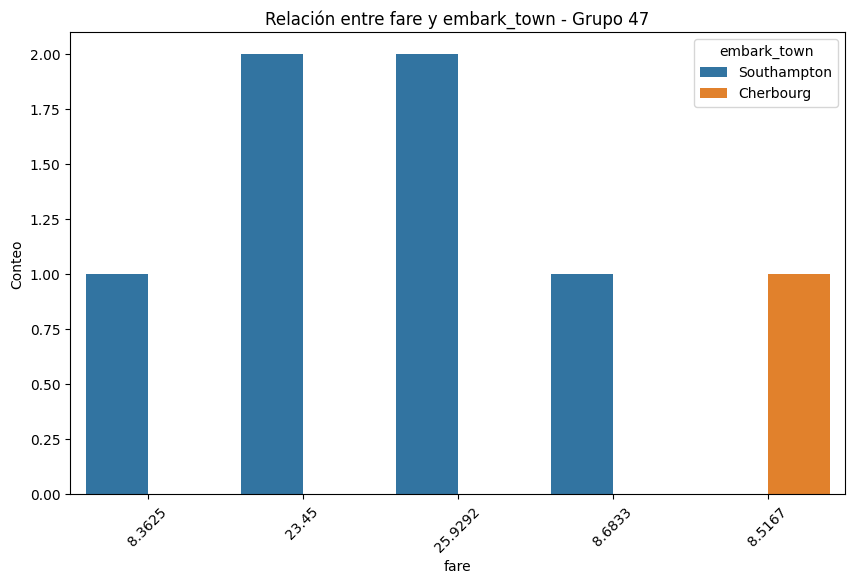

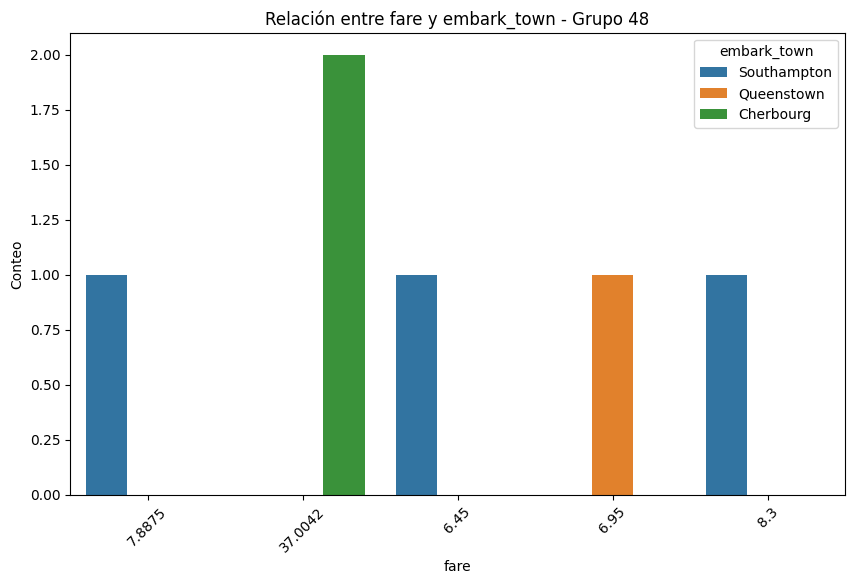

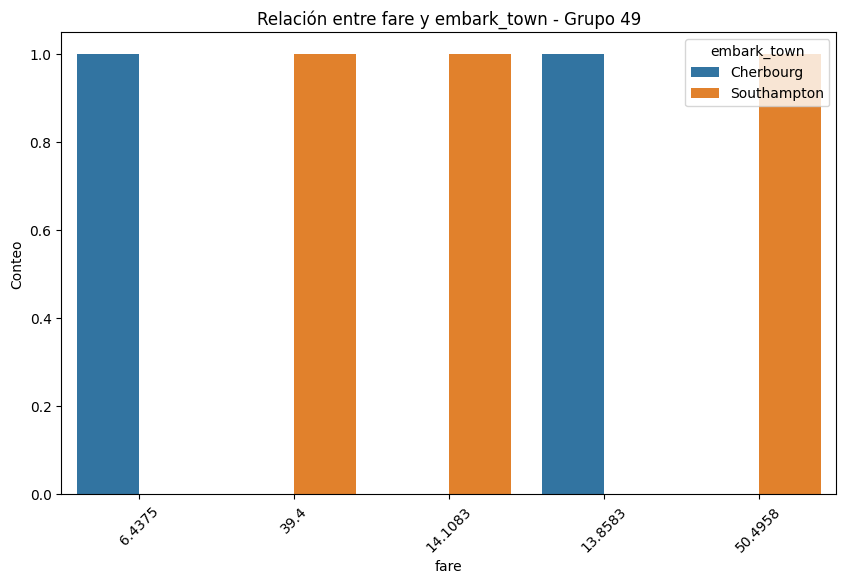

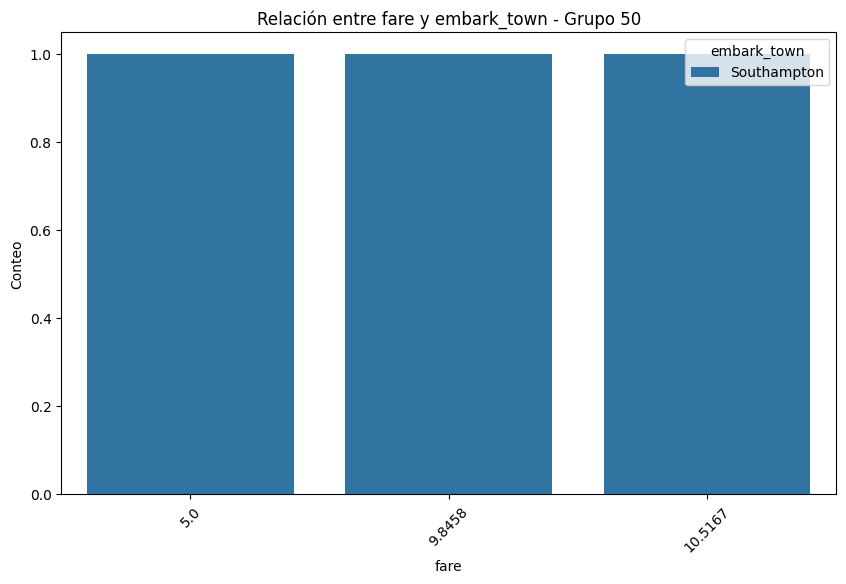

In [39]:
plot_categorical_relationship_fin(df_titanic,"fare","embark_town",relative_freq=False, show_values=False, size_group = 5)

In [40]:
df_titanic.groupby('alive')['fare'].value_counts()

alive  fare   
no     8.0500     38
       7.8958     37
       13.0000    26
       7.7500     22
       26.0000    16
                  ..
yes    7.4958      1
       0.0000      1
       6.9750      1
       7.1417      1
       7.2500      1
Name: count, Length: 330, dtype: int64

In [41]:
df_titanic.groupby('alive')['fare'].sum().reset_index()

alive        fare
0    no  12142.7199
1   yes  16551.2294

In [42]:
df_titanic.groupby('class')['fare'].sum().reset_index()

class        fare
0   First  18177.4125
1  Second   3801.8417
2   Third   6714.6951

In [43]:
df_titanic.fare.sum()

28693.9493

En total se vendieron entradas por un valor total de 28693.95 $, observandose en las graficas como en la ciudad de partida del titanic, es donde se vendieron los billetes mas caros respecto a las otras dos ciudades, que coincide con la que mayor numero de fallecidos  hubo, sin embargo el 42,31% de las ventas fueron realziadas por los fallecidos y el 57,68% por los supervivientes. No obstante, recordemos que la clase mas afectada, con mucha diferencia, por fallecimientos fue la tercera clase, la cual compró solamente un total del 23,4% de los billetes, frente al 76,63% restante que fe comprado por las clases primera(63,38%) y segunda(13.25%). Por lo tanto y teniendo todo los datos en conjunto, no existe una diferencia significatica entre el precio del billete y el grado de supervivencia o fallecimiento.


5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [44]:
df_titanic.head(1)

sex   age  fare  class  who  adult_male  embark_town alive  alone  \
0  male  22.0  7.25  Third  man        True  Southampton    no  False   

   family_members  
0               1

In [45]:
df_titanic["fare"].nsmallest(16)

179    0.0000
263    0.0000
271    0.0000
277    0.0000
302    0.0000
413    0.0000
466    0.0000
481    0.0000
597    0.0000
633    0.0000
674    0.0000
732    0.0000
806    0.0000
815    0.0000
822    0.0000
378    4.0125
Name: fare, dtype: float64

In [46]:
df_titanic["fare"].nlargest(15)

258    512.3292
679    512.3292
737    512.3292
27     263.0000
88     263.0000
341    263.0000
438    263.0000
311    262.3750
742    262.3750
118    247.5208
299    247.5208
380    227.5250
557    227.5250
700    227.5250
716    227.5250
Name: fare, dtype: float64

In [47]:
df_titanic.groupby('family_members')['fare'].sum().reset_index()

family_members        fare
0               0  11407.3238
1               1   8032.9547
2               2   4048.6332
3               3   1591.0708
4               4    871.4168
5               5   1621.9000
6               6    352.4000
7               7    281.4000
8              10    486.8500

In [48]:
df_titanic.groupby('age')['fare'].sum().reset_index()

age      fare
0    0.42    8.5167
1    0.67   14.5000
2    0.75   38.5166
3    0.83   47.7500
4    0.92  151.5500
..    ...       ...
84  70.00   81.5000
85  70.50    7.7500
86  71.00   84.1584
87  74.00    7.7750
88  80.00   30.0000

[89 rows x 2 columns]

In [49]:
# Encontrar los 15 valores más bajos 
pago_0= df_titanic.nsmallest(15, 'fare')# devuelve un DF con los valores mas bajos respecto a la columna fare

pago_0

sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  29.699118   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  29.699118   0.0  Second  man        True  Southampton    no   True   
466  male  29.699118   0.0  Second  man        True  Southampton    no   True   
481  male  29.699118   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  29.699118   0.0   First  man        True  Southampton    no   True   
674  male  29.699118   0.0  Second  man        True  Southampton    no   True   
732  male  29.699118   0.0  Second  man        True  Southampton    no   True   
806  male  39.000000   0.0   First  man        True  Southampton    no   True   
815  male  29.699118   0.0   First  man        True  Southampton    no   True   
822  male  38.000000   0.0   First  man        True  Southampton    no   True   

     family_members  
179               0  
263               0  
271               0  
277               0  
302               0  
413               0  
466               0  
481               0  
597               0  
633               0  
674               0  
732               0  
806               0  
815               0  
822               0

In [50]:
# el que mas pago
mas_pago= df_titanic.nlargest(15, 'fare')# devuelve un DF con los valores mas altos respecto a la columna fare

mas_pago

sex        age      fare  class    who  adult_male  embark_town alive  \
258  female  35.000000  512.3292  First  woman       False    Cherbourg   yes   
679    male  36.000000  512.3292  First    man        True    Cherbourg   yes   
737    male  35.000000  512.3292  First    man        True    Cherbourg   yes   
27     male  19.000000  263.0000  First    man        True  Southampton    no   
88   female  23.000000  263.0000  First  woman       False  Southampton   yes   
341  female  24.000000  263.0000  First  woman       False  Southampton   yes   
438    male  64.000000  263.0000  First    man        True  Southampton    no   
311  female  18.000000  262.3750  First  woman       False    Cherbourg   yes   
742  female  21.000000  262.3750  First  woman       False    Cherbourg   yes   
118    male  24.000000  247.5208  First    man        True    Cherbourg    no   
299  female  50.000000  247.5208  First  woman       False    Cherbourg   yes   
380  female  42.000000  227.5250  First  woman       False    Cherbourg   yes   
557    male  29.699118  227.5250  First    man        True    Cherbourg    no   
700  female  18.000000  227.5250  First  woman       False    Cherbourg   yes   
716  female  38.000000  227.5250  First  woman       False    Cherbourg   yes   

     alone  family_members  
258   True               0  
679  False               1  
737   True               0  
27   False               5  
88   False               5  
341  False               5  
438  False               5  
311  False               4  
742  False               4  
118  False               1  
299  False               1  
380   True               0  
557   True               0  
700  False               1  
716   True               0

En definitiva, exsitieron 15 perosnas que no pagaron, siendo 5 de primera clase, 4 de tercera clase y 6 de segunda clase,  falleciendo todos menos uno que si sobrevivio de tercera clase, con edads comnprendidas entre 18 y 64 años, iban solos y sin familia, embarcando en la ciudad de partida del Titanic, teniendo todos los indicios de haber sido polizones que se colaron en el barco. <br>
Hubo 3 personas que pagaron el maximo pasaje: 512.3292, embarcaron en Cherbourg, viajaban en primera clase, un hombre y una mujer sin compañia, y 1 hombre con 1 miembro familiar, los cuales finalmente sobreviveron al desastre.



6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [51]:
df_titanic["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [52]:
# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


df_titanic.groupby('alive')[['fare','embark_town']].sum().reset_index()

alive        fare  \
0    no  12142.7199   
1   yes  16551.2294   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [53]:
texto_fallecidos="SouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonQueenstownCherbourgSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonQueenstownSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonQueenstownSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgCherbourgQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonQueenstownSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonQueenstownQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonCherbourgQueenstownSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownQueenstownSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonCherbourgCherbourgQueenstownSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonQueenstownSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonQueenstownSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgQueenstownQueenstownSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonQueenstownQueenstownSouthamptonSouthamptonSouthamptonSouthamptonQueenstownCherbourgQueenstownSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonQueenstown"

# sin distinción entre mayúsculas y minúsculas
texto_plano = texto_fallecidos.lower()
# Contar la cantidad de veces que aprece Southampton
repeticiones1 = texto_plano.count("southampton")
repeticiones2 = texto_plano.count("cherbourg")
repeticiones3 = texto_plano.count("queenstown")

print(f"El numero de fallecidos que embarcaron en la ciudad de southampton es {repeticiones1}")
print(f"El numero de fallecidos que embarcaron en la ciudad de cherbourg es {repeticiones2}")
print(f"El numero de fallecidos que embarcaron en la ciudad de queenstown es {repeticiones3}")




El numero de fallecidos que embarcaron en la ciudad de southampton es 427
El numero de fallecidos que embarcaron en la ciudad de cherbourg es 75
El numero de fallecidos que embarcaron en la ciudad de queenstown es 47


In [54]:
texto_vivos="CherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonQueenstownSouthamptonSouthamptonQueenstownCherbourgQueenstownCherbourgCherbourgCherbourgQueenstownQueenstownCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgQueenstownSouthamptonCherbourgQueenstownCherbourgSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonCherbourgCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgSouthamptonCherbourgQueenstownQueenstownQueenstownSouthamptonCherbourgCherbourgCherbourgCherbourgCherbourgSouthamptonSouthamptonSouthamptonCherbourgQueenstownSouthamptonCherbourgSouthamptonSouthamptonCherbourgQueenstownSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownQueenstownCherbourgCherbourgQueenstownCherbourgCherbourgCherbourgSouthamptonCherbourgCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonCherbourgSouthamptonCherbourgSouthamptonCherbourgSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonCherbourgCherbourgCherbourgSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonCherbourgSouthamptonQueenstownCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgQueenstownCherbourgSouthamptonCherbourgSouthamptonCherbourgCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgCherbourgCherbourgSouthamptonSouthamptonCherbourg"

# sin distinción entre mayúsculas y minúsculas
texto_plano = texto_vivos.lower()
# Contar la cantidad de veces que aprece Southampton
repeticiones4 = texto_plano.count("southampton")
repeticiones5 = texto_plano.count("cherbourg")
repeticiones6 = texto_plano.count("queenstown")

print(f"El numero de supervivientes que embarcaron en la ciudad de southampton es {repeticiones4}")
print(f"El numero de supervivientes que embarcaron en la ciudad de cherbourg es {repeticiones5}")
print(f"El numero de supervivientes que embarcaron en la ciudad de queenstown es {repeticiones6}")

El numero de supervivientes que embarcaron en la ciudad de southampton es 217
El numero de supervivientes que embarcaron en la ciudad de cherbourg es 93
El numero de supervivientes que embarcaron en la ciudad de queenstown es 30


La ciudad donde hubo mas cantidad de fallecidos y supervientes fue desde la ciudad origen del Titanic, donde embarcaron el mayor numero de viajeros. Anteriormente ya estableci que no habia una estadio estadistico significativo entre el precio del billete y la supervivencia o fallecimiento. Ahora al cruzar datos ademas con las ciudades, continua ese mismo resultado, ya que no aporta nada nuevo la ciudad de embarque, a loque ya tenemos expuesto.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [56]:
columnas_edad = ["class","age"]
#hallamos la frecuencia  absoluta
for catego in columnas_edad:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n"*2)

para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



para age
age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
30.000000     25
19.000000     25
21.000000     24
25.000000     23
36.000000     22
29.000000     20
35.000000     18
32.000000     18
26.000000     18
27.000000     18
31.000000     17
16.000000     17
34.000000     15
20.000000     15
23.000000     15
33.000000     15
39.000000     14
40.000000     13
17.000000     13
42.000000     13
45.000000     12
38.000000     11
4.000000      10
2.000000      10
50.000000     10
44.000000      9
47.000000      9
48.000000      9
54.000000      8
9.000000       8
1.000000       7
51.000000      7
37.000000      6
52.000000      6
41.000000      6
3.000000       6
14.000000      6
49.000000      6
58.000000      5
15.000000      5
43.000000      5
62.000000      4
56.000000      4
8.000000       4
60.000000      4
11.000000      4
5.000000       4
6.000000       

In [57]:
#hallamos la frecuencia  relativa
for catego in columnas_edad:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n"*2)

para class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64



para age
age
29.699118    19.865320
24.000000     3.367003
22.000000     3.030303
18.000000     2.918070
28.000000     2.805836
30.000000     2.805836
19.000000     2.805836
21.000000     2.693603
25.000000     2.581369
36.000000     2.469136
29.000000     2.244669
35.000000     2.020202
32.000000     2.020202
26.000000     2.020202
27.000000     2.020202
31.000000     1.907969
16.000000     1.907969
34.000000     1.683502
20.000000     1.683502
23.000000     1.683502
33.000000     1.683502
39.000000     1.571268
40.000000     1.459035
17.000000     1.459035
42.000000     1.459035
45.000000     1.346801
38.000000     1.234568
4.000000      1.122334
2.000000      1.122334
50.000000     1.122334
44.000000     1.010101
47.000000     1.010101
48.000000     1.010101
54.000000     0.897868
9.000000      0.897868
1.000000      0.785634
51.000000     0.785634
37.000000     0.673401
52.00

In [58]:
df_titanic.groupby('alive')[['age','class']].sum().reset_index()

alive           age  \
0    no  16697.889706   
1   yes   9764.024118   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        class  
0  ThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdSecondThirdThirdFirstThirdFirstSecondFirstFirstThirdThirdThirdSecondThirdThirdThirdThirdThirdThirdThirdFirstThirdThirdThirdFirstThirdFirstThirdThirdSecondThirdSecondThirdThirdThirdThirdThirdFirstThirdThirdThirdThirdThirdFirstThirdThirdThirdFirstSecondThirdThirdFirstThirdThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdSecondFirstThirdSecondThirdSecondFirstThirdThirdThirdThirdThirdSecondSecondFirstThirdFirstThirdThirdSecondSecondThirdSecondSecondSecondThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdThirdThirdFirstThirdFirstThirdThirdFirstThirdThirdFirstSecondThirdThirdSecondThirdFirstThirdThirdSecondThirdThirdSecondThirdThirdThirdThirdThirdThirdThirdThirdSecondThirdSecondSecondSecondThirdThirdThirdThirdSecondThirdThirdSecondSecondThirdSecondSecondSecondThirdSecondThirdThirdFirstThirdSecondThirdThirdFirstThirdThirdThirdFirstFirstThirdSecondThirdFirstFirstThirdSecondThirdThirdThirdThirdFirstThirdThirdSecondThirdThirdFirstThirdFirstThirdThirdSecondSecondThirdSecondSecondThirdThirdThirdThirdFirstFirstThirdThirdF

In [59]:
texto_muertos="ThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdSecondThirdThirdFirstThirdFirstSecondFirstFirstThirdThirdThirdSecondThirdThirdThirdThirdThirdThirdThirdFirstThirdThirdThirdFirstThirdFirstThirdThirdSecondThirdSecondThirdThirdThirdThirdThirdFirstThirdThirdThirdThirdThirdFirstThirdThirdThirdFirstSecondThirdThirdFirstThirdThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdSecondFirstThirdSecondThirdSecondFirstThirdThirdThirdThirdThirdSecondSecondFirstThirdFirstThirdThirdSecondSecondThirdSecondSecondSecondThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdThirdThirdFirstThirdFirstThirdThirdFirstThirdThirdFirstSecondThirdThirdSecondThirdFirstThirdThirdSecondThirdThirdSecondThirdThirdThirdThirdThirdThirdThirdThirdSecondThirdSecondSecondSecondThirdThirdThirdThirdSecondThirdThirdSecondSecondThirdSecondSecondSecondThirdSecondThirdThirdFirstThirdSecondThirdThirdFirstThirdThirdThirdFirstFirstThirdSecondThirdFirstFirstThirdSecondThirdThirdThirdThirdFirstThirdThirdSecondThirdThirdFirstThirdFirstThirdThirdSecondSecondThirdSecondSecondThirdThirdThirdThirdFirstFirstThirdThirdFirstFirstSecondSecondSecondThirdThirdFirstThirdThirdThirdThirdSecondThirdSecondThirdThirdThirdThirdThirdThirdFirstThirdFirstThirdThirdThirdThirdSecondThirdThirdThirdThirdThirdSecondSecondThirdThirdThirdThirdSecondThirdThirdThirdThirdThirdSecondThirdSecondThirdThirdThirdThirdThirdThirdThirdThirdThirdFirstThirdFirstSecondThirdThirdSecondThirdFirstThirdFirstThirdThirdFirstSecondThirdThirdSecondFirstThirdThirdThirdThirdFirstSecondThirdThirdThirdSecondThirdThirdFirstThirdThirdThirdFirstFirstThirdThirdThirdFirstThirdThirdThirdThirdThirdFirstThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdFirstThirdSecondThirdThirdThirdFirstThirdThirdThirdFirstFirstThirdSecondThirdFirstFirstThirdThirdSecondThirdThirdThirdThirdThirdThirdThirdThirdThirdSecondFirstThirdSecondThirdThirdThirdThirdThirdSecondThirdThirdThirdThirdFirstThirdThirdThirdThirdThirdThirdThirdThirdThirdSecondThirdThirdThirdFirstSecondThirdThirdThirdFirstThirdThirdSecondThirdThirdThirdThirdThirdThirdThirdThirdThirdSecondThirdThirdSecondFirstThirdFirstThirdSecondSecondThirdThirdFirstSecondSecondThirdThirdThirdThirdThirdThirdSecondSecondThirdThirdThirdThirdFirstSecondThirdFirstThirdThirdThirdThirdSecondFirstThirdSecondThirdThirdThirdThirdSecondSecondThirdSecondThirdThirdSecondSecondSecondThirdThirdThirdThirdFirstThirdFirstThirdFirstThirdThirdThirdThirdSecondThirdThirdThirdThirdFirstThirdThirdThirdThirdThirdSecondThirdThirdThirdThirdFirstThirdThirdThirdThirdFirstThirdSecondThirdFirstThirdSecondThirdThirdSecondThirdFirstThirdSecondThirdThirdSecondThirdThirdFirstThirdSecondThirdThirdFirstThirdThirdThirdThirdThirdThirdThirdThirdThirdSecondThirdThirdThirdThirdThirdSecondThirdThirdThirdSecondThirdThirdSecondThirdSecondFirstThirdThirdFirstThirdThirdThirdThirdThirdThirdSecondThirdThirdSecondThirdThird"

# sin distinción entre mayúsculas y minúsculas
texto_plano = texto_muertos.lower()
# Contar la cantidad de veces que aprece Southampton
r1 = texto_plano.count("first")
r2 = texto_plano.count("second")
r3 = texto_plano.count("third")

print(f"El numero de fallecidos de primera clase es {r1}")
print(f"El numero de fallecidos de segunda clase es {r2}")
print(f"El numero de fallecidos de tercera clase es {r3}")

El numero de fallecidos de primera clase es 80
El numero de fallecidos de segunda clase es 97
El numero de fallecidos de tercera clase es 372


In [60]:
texto_supervivientes="FirstThirdFirstThirdSecondThirdFirstSecondSecondThirdSecondThirdFirstThirdThirdFirstThirdThirdThirdSecondThirdThirdFirstSecondFirstSecondSecondFirstThirdSecondThirdThirdSecondThirdThirdThirdSecondThirdFirstFirstSecondThirdThirdThirdSecondThirdThirdThirdSecondFirstThirdThirdThirdFirstThirdSecondThirdFirstThirdSecondThirdThirdFirstSecondThirdSecondFirstFirstThirdThirdThirdThirdFirstSecondFirstThirdFirstThirdFirstSecondFirstThirdSecondThirdSecondFirstThirdFirstFirstFirstSecondThirdThirdFirstFirstThirdSecondThirdFirstThirdThirdThirdSecondThirdFirstFirstFirstFirstThirdThirdSecondFirstFirstFirstFirstFirstFirstThirdSecondFirstFirstSecondSecondFirstSecondThirdFirstThirdFirstFirstThirdSecondFirstSecondSecondThirdThirdFirstThirdThirdFirstThirdThirdFirstFirstFirstThirdFirstThirdFirstSecondSecondFirstThirdFirstThirdSecondThirdSecondFirstThirdSecondSecondSecondSecondThirdFirstThirdSecondFirstSecondSecondSecondThirdFirstSecondFirstThirdFirstFirstThirdFirstSecondFirstThirdSecondSecondThirdThirdFirstFirstThirdFirstFirstSecondFirstThirdThirdFirstFirstSecondSecondFirstFirstSecondSecondThirdSecondFirstFirstFirstSecondSecondSecondSecondFirstThirdThirdFirstFirstThirdThirdSecondFirstFirstThirdSecondFirstThirdSecondFirstFirstFirstFirstSecondFirstSecondFirstFirstSecondFirstThirdSecondSecondFirstThirdFirstFirstFirstSecondFirstThirdThirdFirstFirstThirdSecondThirdFirstThirdFirstSecondSecondThirdFirstFirstFirstFirstThirdThirdThirdFirstFirstSecondFirstFirstThirdFirstFirstFirstSecondSecondFirstSecondThirdFirstFirstFirstFirstThirdSecondSecondThirdSecondSecondFirstThirdFirstFirstSecondThirdFirstThirdFirstThirdThirdFirstThirdSecondFirstThirdThirdFirstFirstThirdThirdSecondThirdFirstThirdSecondFirstThirdFirstFirstFirstFirstThirdFirstFirstThirdFirstSecondSecondThirdFirstSecondThirdFirstSecondFirstFirst"

# sin distinción entre mayúsculas y minúsculas
texto_plano = texto_supervivientes.lower()
# Contar la cantidad de veces que aprece Southampton
r4 = texto_plano.count("first")
r5 = texto_plano.count("second")
r6 = texto_plano.count("third")

print(f"El numero de supervivientes de primera clase es {r4}")
print(f"El numero de supervivientes de segunda clase es {r5}")
print(f"El numero de supervivientes de tercera clase es {r6}")

El numero de supervivientes de primera clase es 136
El numero de supervivientes de segunda clase es 87
El numero de supervivientes de tercera clase es 119


En relacion a estas dos variables (edad y clase): <br>
1. El mayor numero de fallecidos por edad y clase es para los de la tercera clase con un total de 372 muertos, siendo los falleciemiento entre la primera y segunda clase muy proximos.<br>
2. El mayor numero de supervivientes por edad y clase es para los de la primera clase con 136 finados, estando muy proximos los de segunda clase y en ultimo lugar estan los de tercera clase con 87 fallecidos.<br>
CONCLUSION.- La tercera clase es la mas desfavorecida en terminos generales en ambos casos.













8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

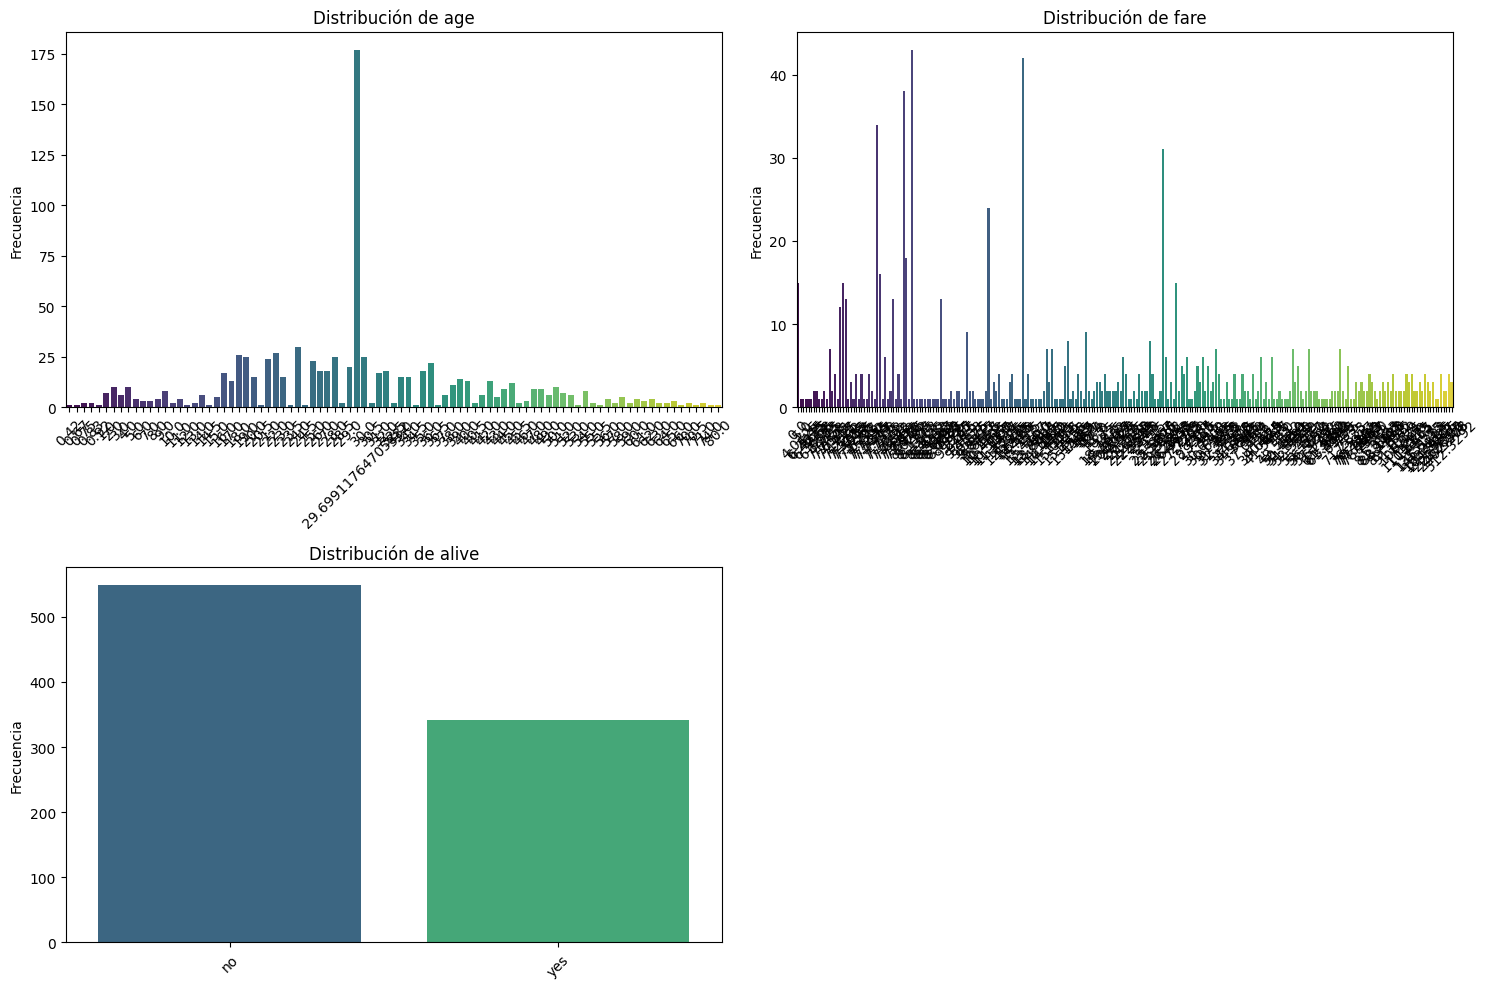

In [61]:
columnas_fin=["age","fare","alive"]
pinta_distribucion_categoricas(df_titanic, columnas_fin)

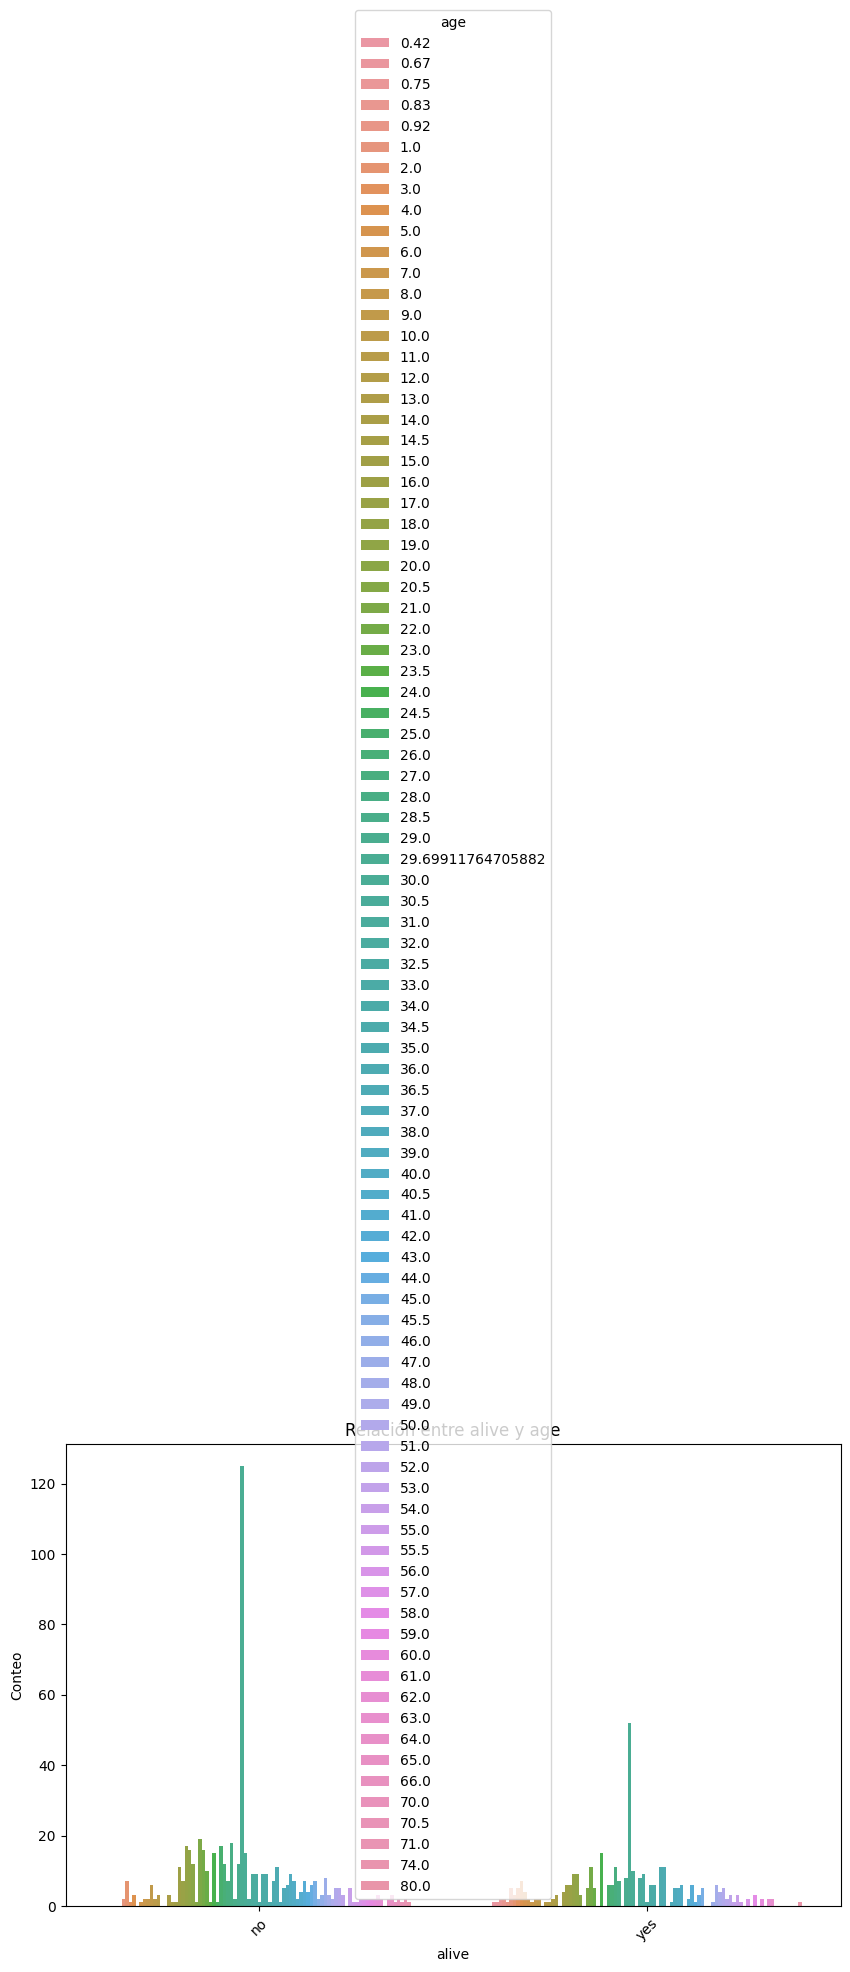

In [62]:
plot_categorical_relationship_fin(df_titanic,"alive","age",relative_freq=False, show_values=False, size_group = 5)

(3, 2)


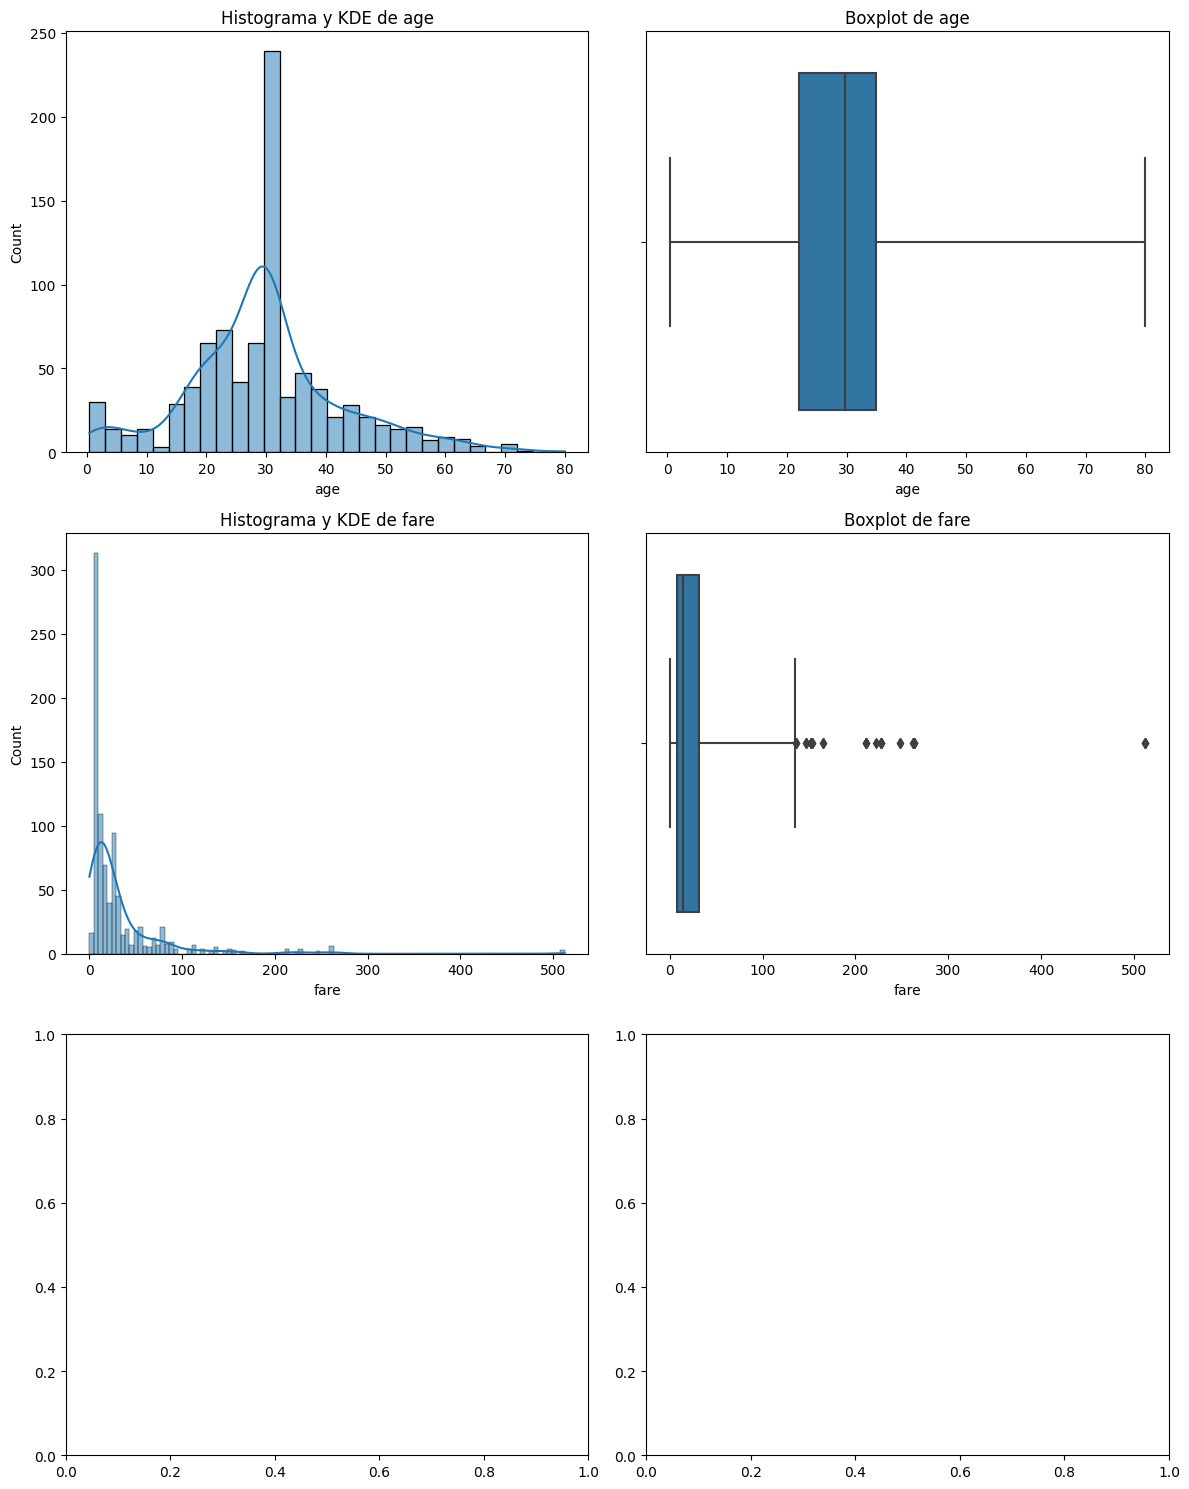

In [63]:
plot_combined_graphs(df_titanic, columnas_fin, whisker_width=4.5, bins = None)

In [64]:
correlacion = df_titanic[["age","fare"]].corr()


correlacion

age      fare
age   1.000000  0.091566
fare  0.091566  1.000000

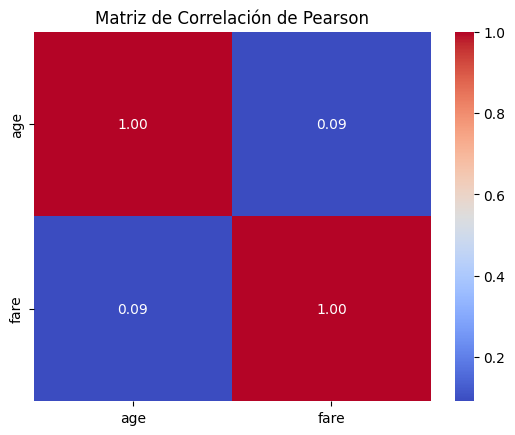

In [65]:
# Seleccionar las columnas de interés para la correlación
columnas_interes = ["age","fare"]
correlacion = df_titanic[columnas_interes].corr()# Calcular la matriz de correlación usando la funcion de pandas, corr() que permite 
#calcular la correlación entre las variables numéricas de un DataFrame

# Crear un mapa de calor
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")#  annot, agrega los valores de correlaciónen cada celda del mapa de calor
# cmap establce la paleta de colores q usara y fmt=".2f, que solo se mostraran 2 decimales
plt.title('Matriz de Correlación de Pearson')
plt.show() # muestra

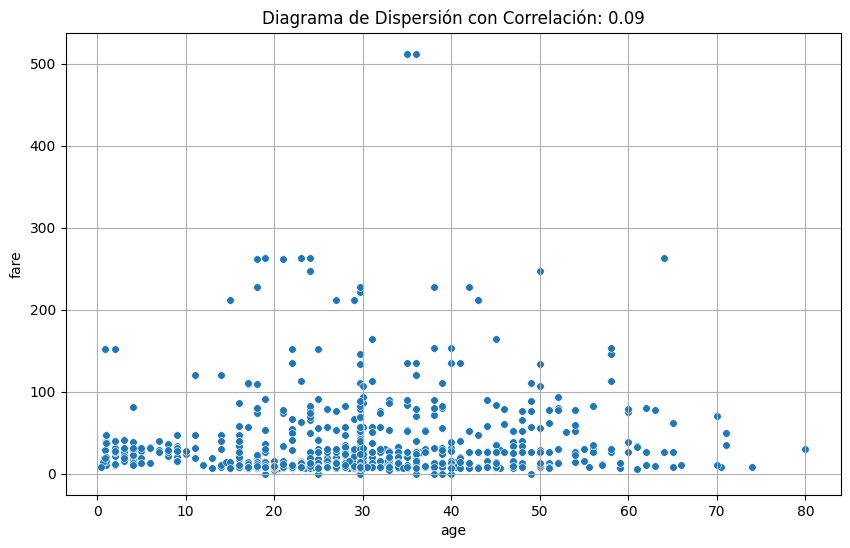

In [66]:
grafico_dispersion_con_correlacion(df_titanic,"age", "fare", mostrar_correlacion= True, tamano_puntos= 30)

In [67]:

df_titanic.groupby('age')['fare'].sum().reset_index()

age       fare
0    0.420000     8.5167
1    0.670000    14.5000
2    0.750000    38.5166
3    0.830000    47.7500
4    0.920000   151.5500
5    1.000000   210.0417
6    2.000000   375.3625
7    3.000000   154.6917
8    4.000000   295.4333
9    5.000000    90.8708
10   6.000000    76.7500
11   7.000000    95.0625
12   8.000000   113.2000
13   9.000000   223.5083
14  10.000000    52.0500
15  11.000000   216.9625
16  12.000000    11.2417
17  13.000000    26.7292
18  14.000000   255.7542
19  14.500000    14.4542
20  15.000000   248.2751
21  16.000000   437.6667
22  17.000000   369.0625
23  18.000000   989.6500
24  19.000000   696.7374
25  20.000000   129.3626
26  20.500000     7.2500
27  21.000000   757.5749
28  22.000000   688.6291
29  23.000000   569.9208
30  23.500000     7.2292
31  24.000000  1291.0707
32  24.500000     8.0500
33  25.000000   561.5626
34  26.000000   343.5625
35  27.000000   546.5041
36  28.000000   525.5040
37  28.500000    23.3292
38  29.000000   541.8165
39  29.699118  3922.0663
40  30.000000   638.5417
41  30.500000    15.8000
42  31.000000   629.1542
43  32.000000   437.8208
44  32.500000    43.0708
45  33.000000   387.3833
46  34.000000   249.5458
47  34.500000     6.4375
48  35.000000  1607.6250
49  36.000000  1319.2291
50  36.500000    26.0000
51  37.000000   178.8667
52  38.000000   690.2666
53  39.000000   513.2666
54  40.000000   482.4291
55  40.500000    22.2500
56  41.000000   235.1333
57  42.000000   482.6334
58  43.000000   298.9875
59  44.000000   267.8250
60  45.000000   441.8209
61  45.500000    35.7250
62  46.000000   166.3750
63  47.000000   248.4125
64  48.000000   341.0376
65  49.000000   359.5751
66  50.000000   640.2583
67  51.000000   201.2667
68  52.000000   308.4167
69  53.000000    51.4792
70  54.000000   355.8167
71  55.000000    46.5000
72  55.500000     8.0500
73  56.000000   175.9041
74  57.000000    22.8500
75  58.000000   469.5083
76  59.000000    20.7500
77  60.000000   220.0000
78  61.000000    72.0583
79  62.000000   143.6000
80  63.000000    87.5458
81  64.000000   289.0000
82  65.000000    96.2792
83  66.000000    10.5000
84  70.000000    81.5000
85  70.500000     7.7500
86  71.000000    84.1584
87  74.000000     7.7750
88  80.000000    30.0000

In [68]:
df_titanic.groupby('age')['alive'].unique()

age
0.420000         [yes]
0.670000         [yes]
0.750000         [yes]
0.830000         [yes]
0.920000         [yes]
1.000000     [no, yes]
2.000000     [no, yes]
3.000000     [yes, no]
4.000000     [yes, no]
5.000000         [yes]
6.000000     [yes, no]
7.000000     [no, yes]
8.000000     [no, yes]
9.000000     [no, yes]
10.000000         [no]
11.000000    [no, yes]
12.000000        [yes]
13.000000        [yes]
14.000000    [yes, no]
14.500000         [no]
15.000000    [yes, no]
16.000000    [no, yes]
17.000000    [yes, no]
18.000000    [no, yes]
19.000000    [no, yes]
20.000000    [no, yes]
20.500000         [no]
21.000000    [no, yes]
22.000000    [no, yes]
23.000000    [yes, no]
23.500000         [no]
24.000000    [no, yes]
24.500000         [no]
25.000000    [no, yes]
26.000000    [yes, no]
27.000000    [yes, no]
28.000000    [yes, no]
28.500000         [no]
29.000000    [yes, no]
29.699118    [no, yes]
30.000000    [yes, no]
30.500000         [no]
31.000000    [no, yes]
32.0000

In [69]:
df_titanic.groupby('alive')['fare'].sum().reset_index()

alive        fare
0    no  12142.7199
1   yes  16551.2294

las variebles edad y precio del billete presentan un indice correlacional cercano al 0, por lo que no estan correlacionadas, y anterirmente se ha contestado a la poca o escasa significacion entasdistica entre alive y edad y alive con precio del billete.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [71]:
df_viajes= pd.read_csv("./data/dataset_viajes_jun23.csv")
df_viajes.head(5)

aircompany      origen      destino  distancia        avion  con_escala  \
0      Airnar       París      Ginebra        411   Boeing 737       False   
1        FlyQ        Bali         Roma      12738   Boeing 737        True   
2    TabarAir     Ginebra  Los Angeles       9103  Airbus A380       False   
3  MoldaviAir       París   Cincinnati       6370   Boeing 737       False   
4    TabarAir  Cincinnati         Roma       7480   Boeing 747       False   

      consumo_kg  duracion   ingresos        id_vuelo    mes  
0    1028.691900        51   14232.65  Air_PaGi_10737  Jun23  
1   33479.132544      1167  468527.19  Fly_BaRo_10737  Jun23  
2  109439.907200       626  584789.19  Tab_GiLo_11380  Jun23  
3   17027.010000       503  233342.51  Mol_PaCi_10737  Jun23  
4   86115.744000       518  438535.07  Tab_CiRo_10747  Jun23

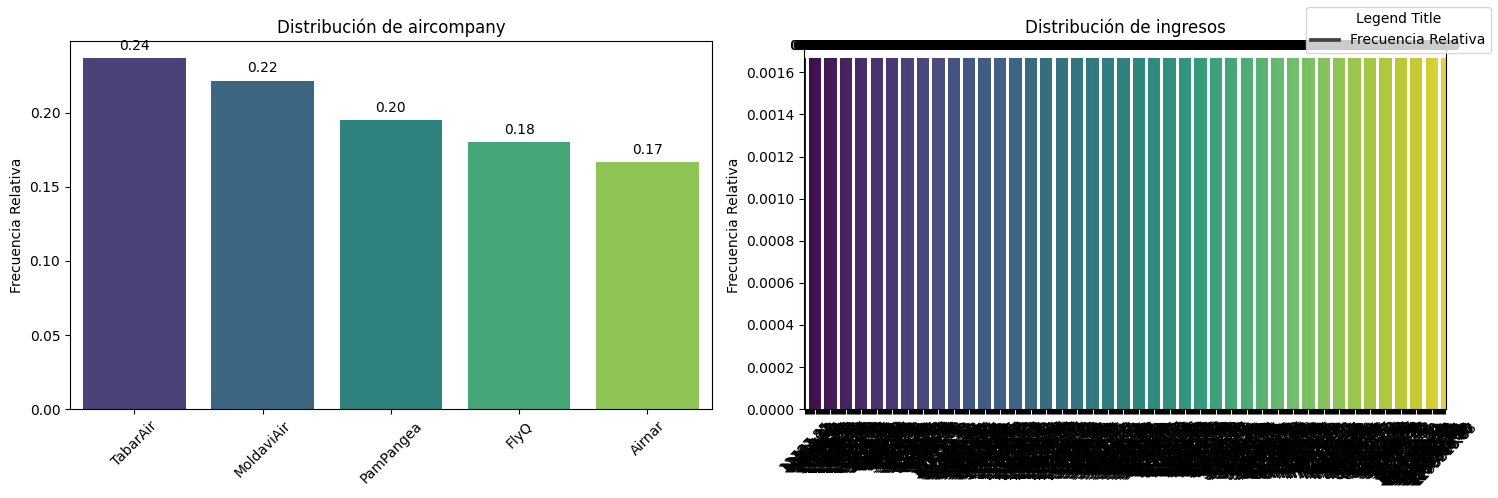

In [73]:
pinta_distribucion_categoricas(df_viajes,["aircompany","ingresos"], relativa= True, mostrar_valores= True)

In [76]:
#plot_categorical_relationship_fin(df_viajes, "aircompany","ingresos", relative_freq = True, show_values = True)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


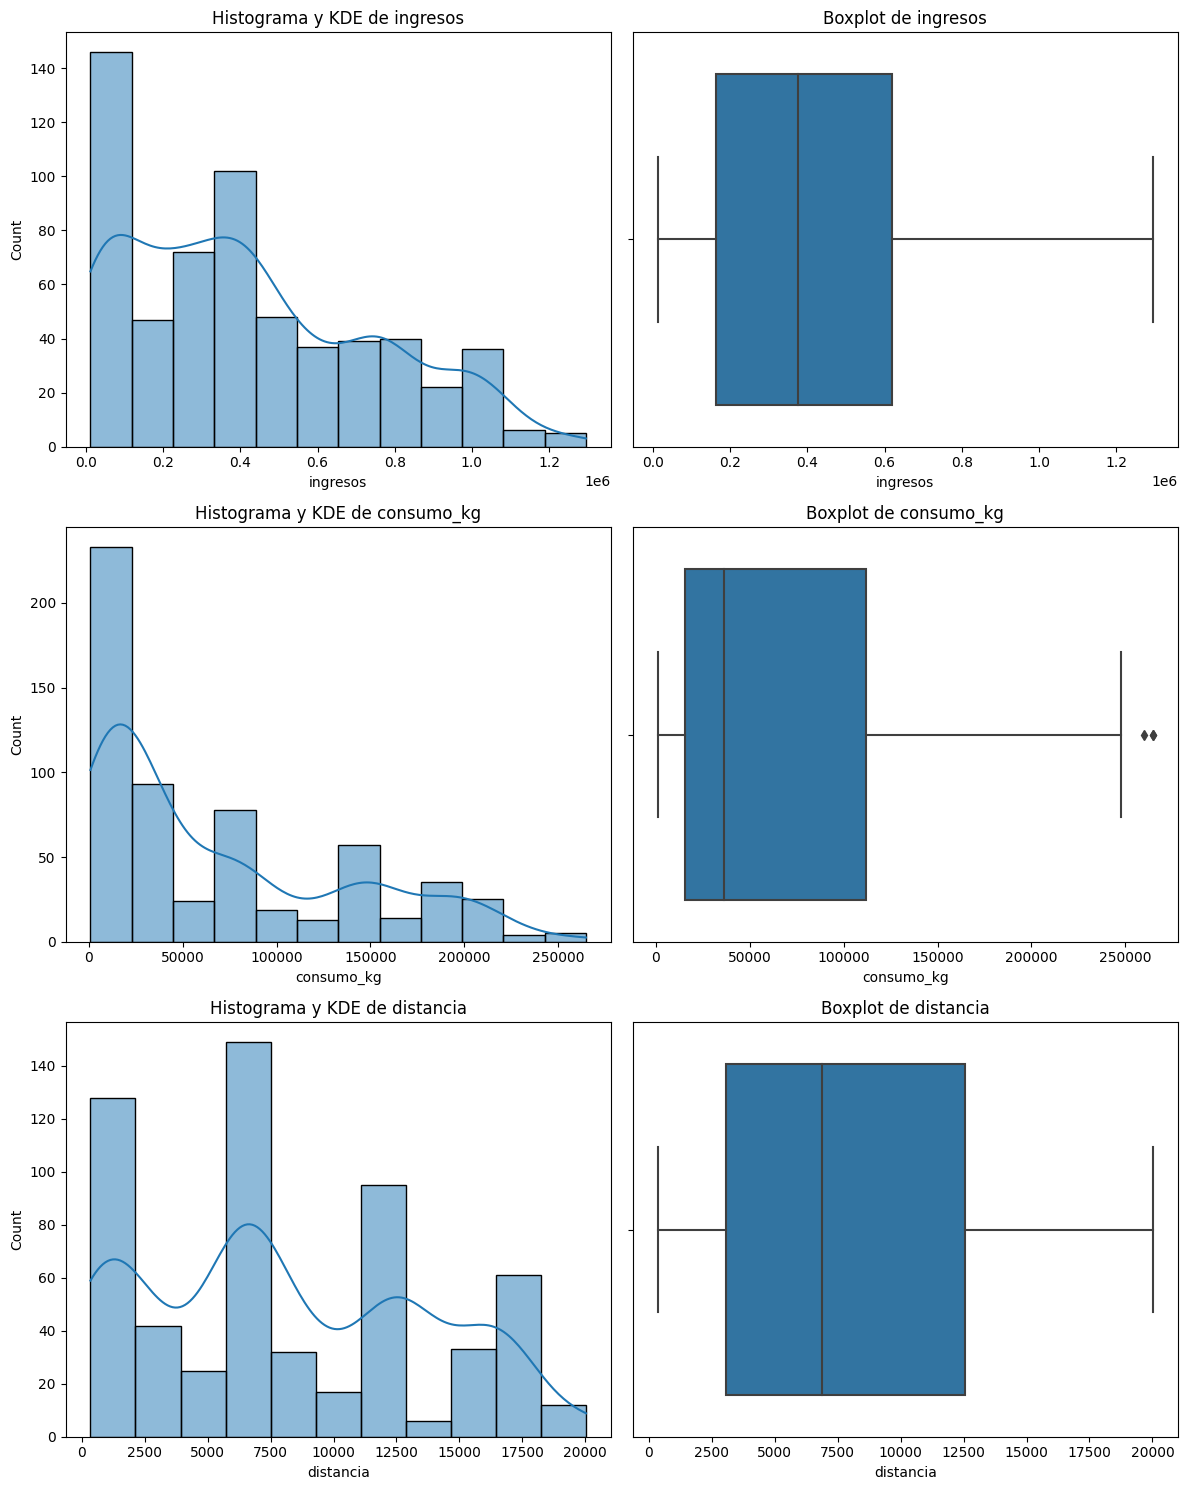

In [77]:
plot_combined_graphs(df_viajes,["ingresos","consumo_kg","distancia"])

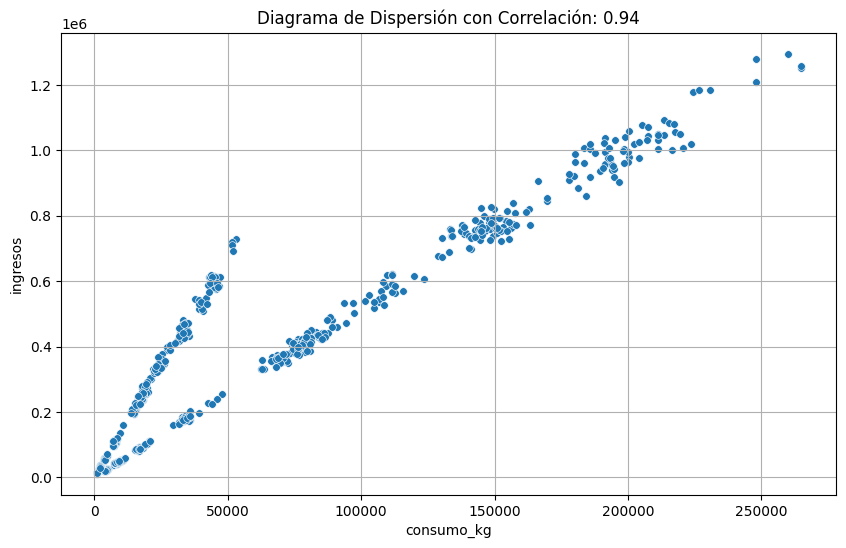

In [78]:
grafico_dispersion_con_correlacion(df_viajes,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

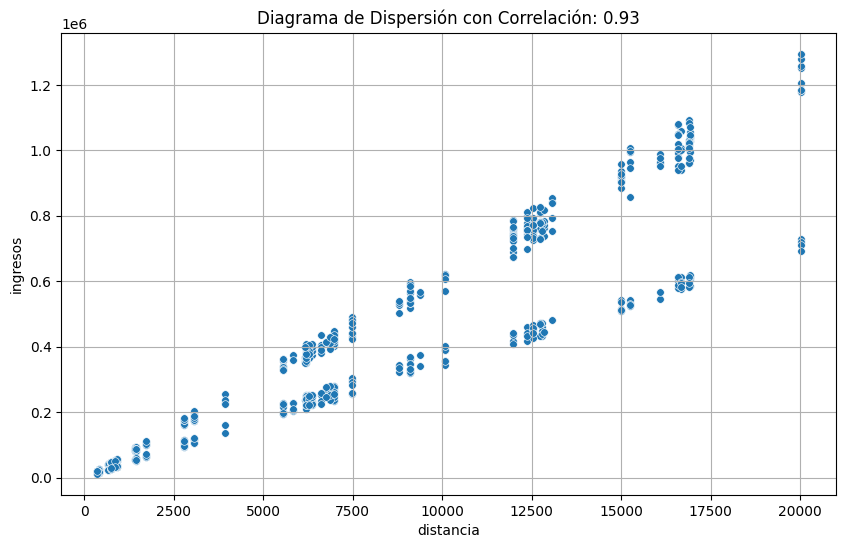

In [79]:
grafico_dispersion_con_correlacion(df_viajes,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

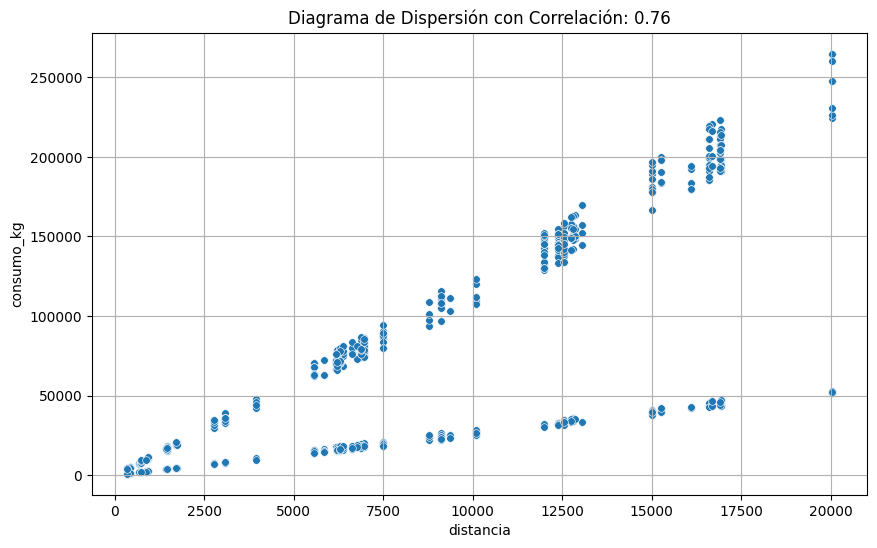

In [80]:
grafico_dispersion_con_correlacion(df_viajes,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

In [86]:
corr_matrix = df_viajes.corr(numeric_only= True) # Si no lo pones y tienes variables tipo texto, fallará7
corr_matrix

distancia  con_escala  consumo_kg  duracion  ingresos
distancia    1.000000    0.669866    0.762341  0.985963  0.928833
con_escala   0.669866    1.000000    0.322295  0.761097  0.515817
consumo_kg   0.762341    0.322295    1.000000  0.668707  0.944875
duracion     0.985963    0.761097    0.668707  1.000000  0.867515
ingresos     0.928833    0.515817    0.944875  0.867515  1.000000

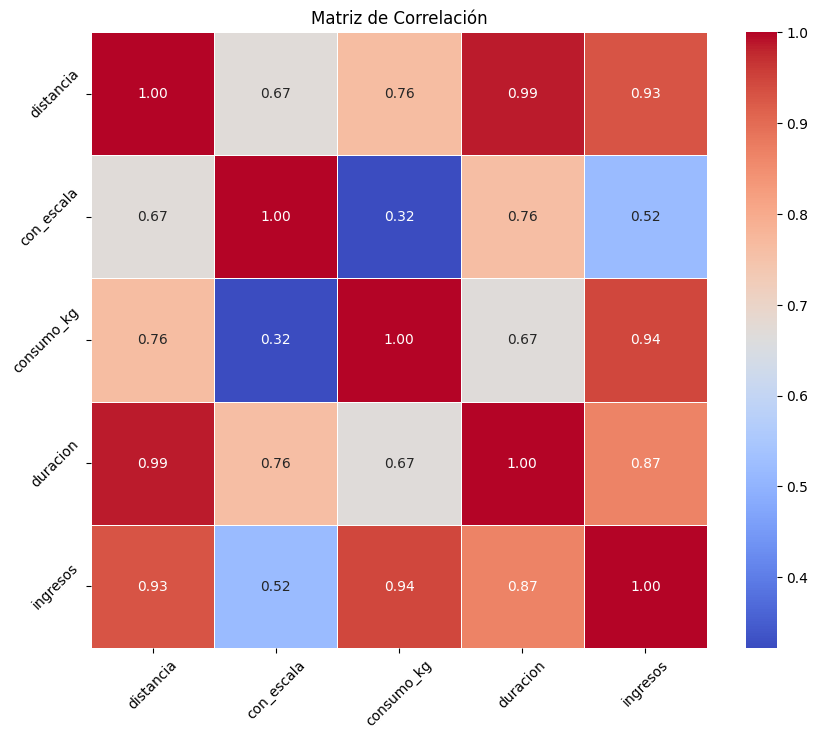

In [87]:
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

In [88]:
df_solo_numeros = df_viajes.select_dtypes(include = ["float","int"])
df_solo_numeros.columns

Index(['distancia', 'consumo_kg', 'duracion', 'ingresos'], dtype='object')

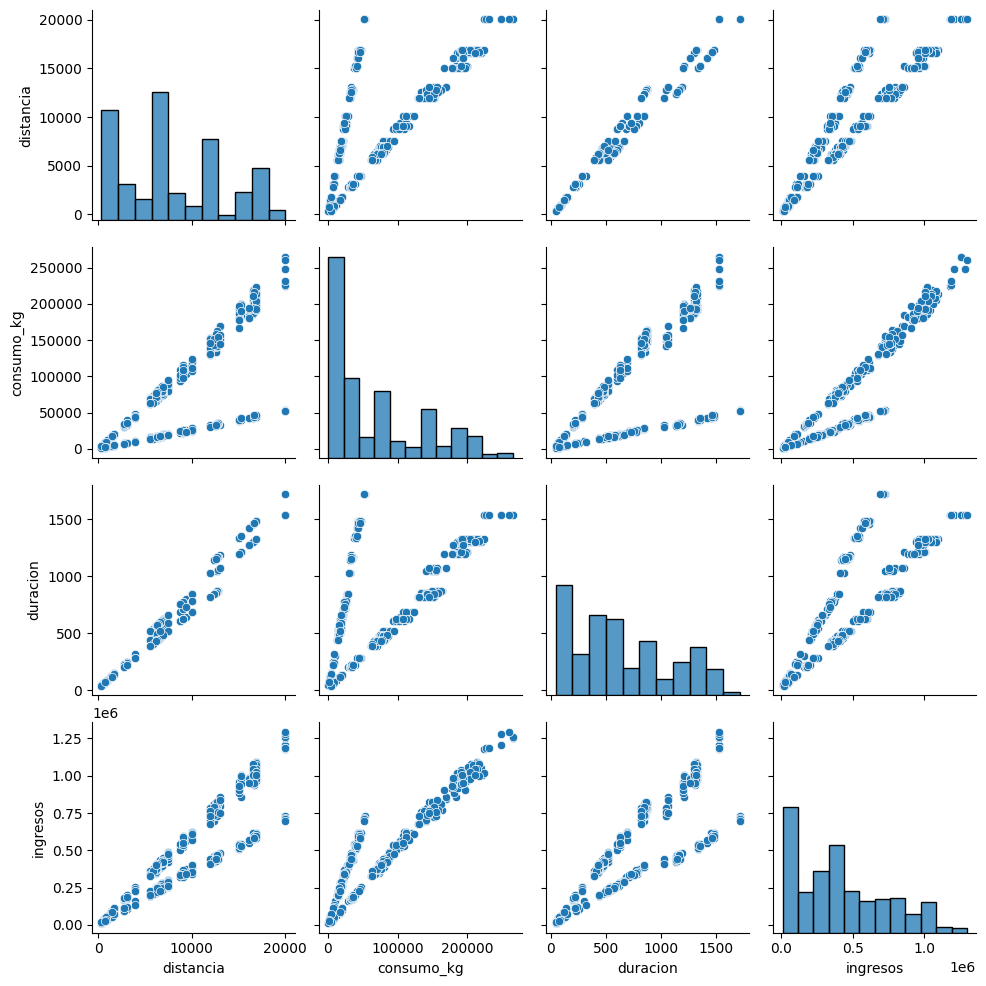

In [89]:
sns.pairplot(df_solo_numeros)
plt.show()

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.